<a href="https://colab.research.google.com/github/EinGartenzwerg/TSRNN/blob/master/AfB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow-gpu

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 3.9MB 39.5MB/s 
     |████████████████████████████████| 450kB 49.0MB/s 
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)

companies = dict({
  "1": "Cargotec",
  "2": "Elisa",
  "3": "Fortum",
  "4": "Huhtamaki",
  "5": "Konecranes",
  "6": "Kemira",
  "7": "Kesko",
  "8": "Kone",
  "9": "Kojamo",
  "10": "Metsa Board",
  "11": "Metso",
  "12": "Nordea",
  "13": "Neste",
  "14": "Nokia",
  "15": "Orion",
  "16": "Outotec",
  "17": "Outokumpu",
  "18": "Sampo",
  "19": "Stora Enso",
  "20": "Telia",
  "21": "Tieto",
  "22": "Nokian Renkaat",
  "23": "UPM",
  "24": "Valmet",
  "25": "Wartsila"
})

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
data = pd.read_csv('FinalData.csv', sep=';', parse_dates=['Date'])
data = data.sort_values(['Company'])
# data['Date'] = pd.to_datetime(data['Date']).astype(int) / (10**15)
data['Open'] = data['Open'].str.replace(',', '.')
data['PriceChange4'] = data['PriceChange4'].str.replace(',', '.')
data['VolumeChange4'] = data['PriceChange4'].str.replace(',', '.')
data['Open'] = pd.to_numeric(data['Open'], downcast="integer")
data['PriceChange4'] = pd.to_numeric(data['PriceChange4'], downcast="integer")
data['VolumeChange4'] = pd.to_numeric(data['PriceChange4'], downcast="integer")
data.head()

Company       Date  ...  PriceChangeNextWeek GoesUpNextWeek
0          1 2015-05-25  ...              -0,0118              0
162        1 2018-02-07  ...               0,0213              1
163        1 2018-09-07  ...              -0,0273              0
164        1 2018-07-16  ...               0,0475              1
165        1 2018-07-23  ...               0,0110              1

[5 rows x 16 columns]

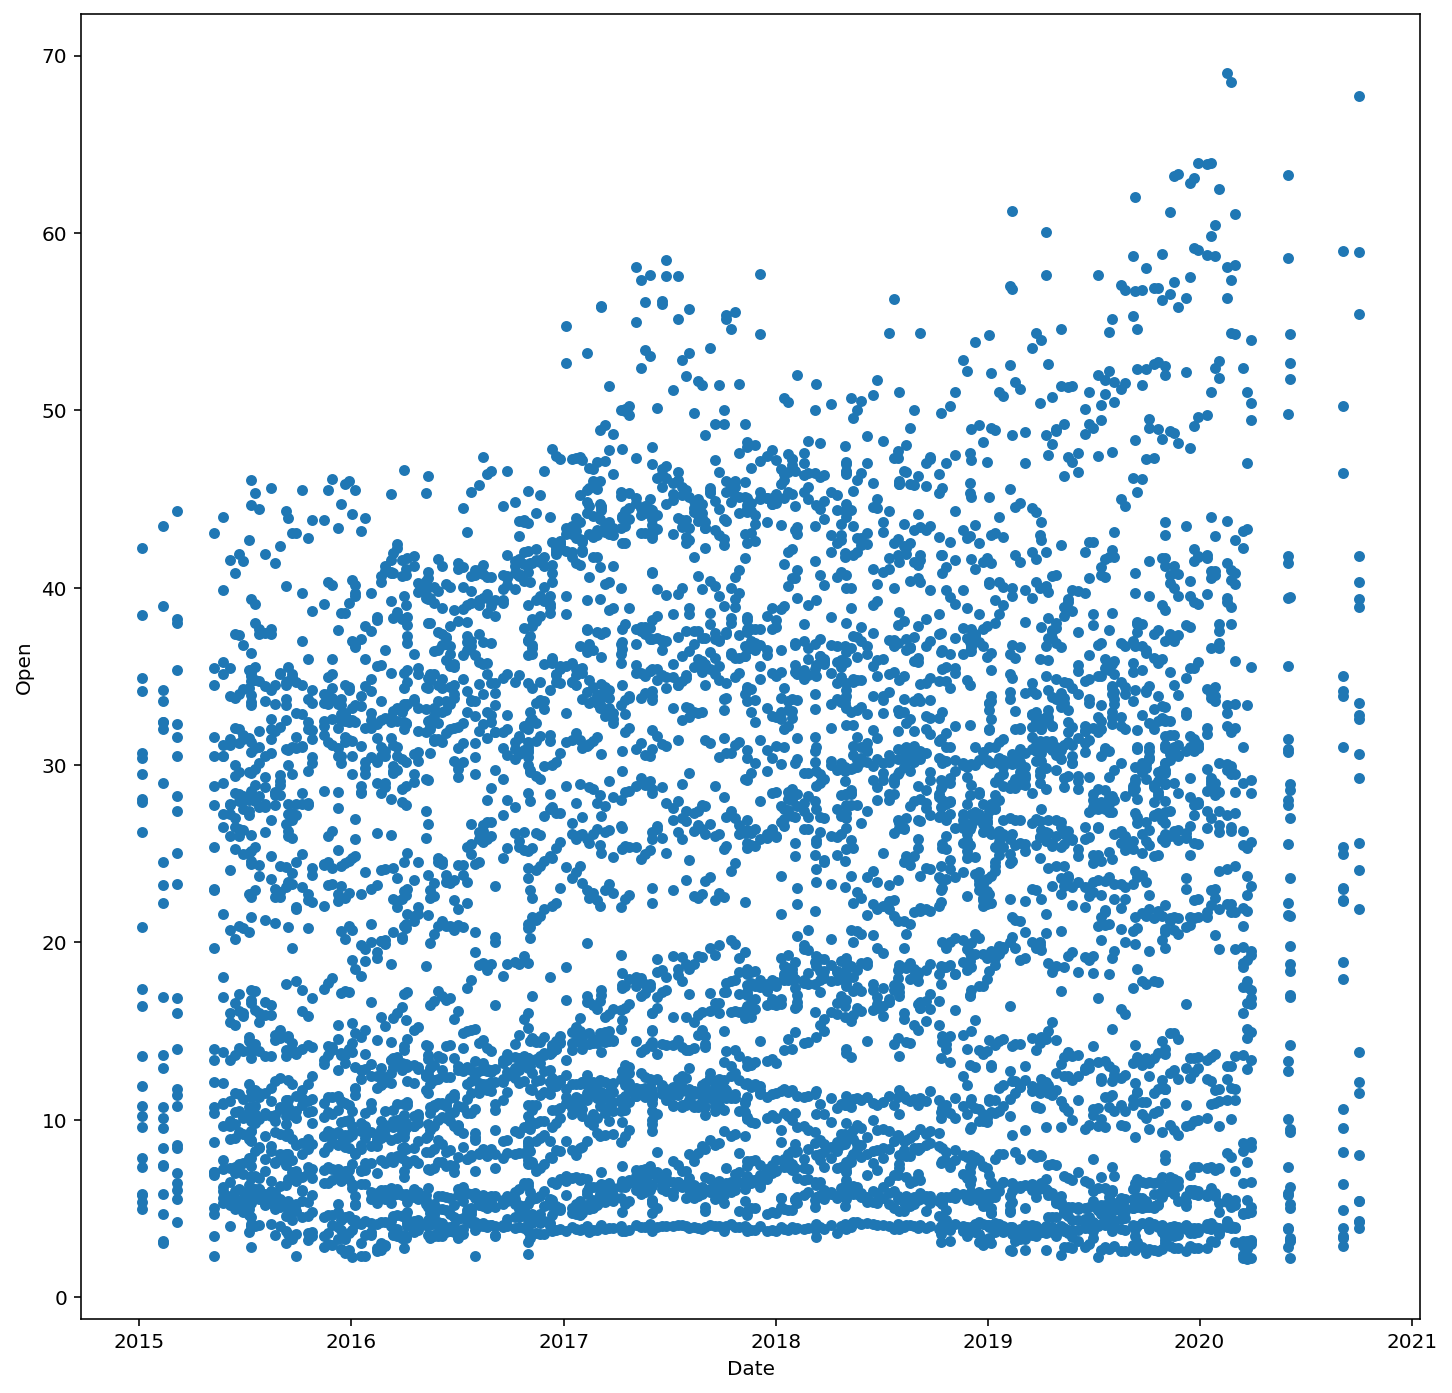

In [6]:
data.plot(x='Date', y='Open', kind='scatter');
plt.show()

In [0]:
data=data.rename_axis(None)
# sort the dataframe
data = data.sort_values(['Company'])
# set the index to be this and don't drop
data.set_index(keys=['Company'], drop=False,inplace=True)
# get a list of names
names=data['Company'].unique().tolist()
# now we can perform a lookup on a 'view' of the dataframe
joe = data.loc[data.Company==1]
# now you can query all 'joes'

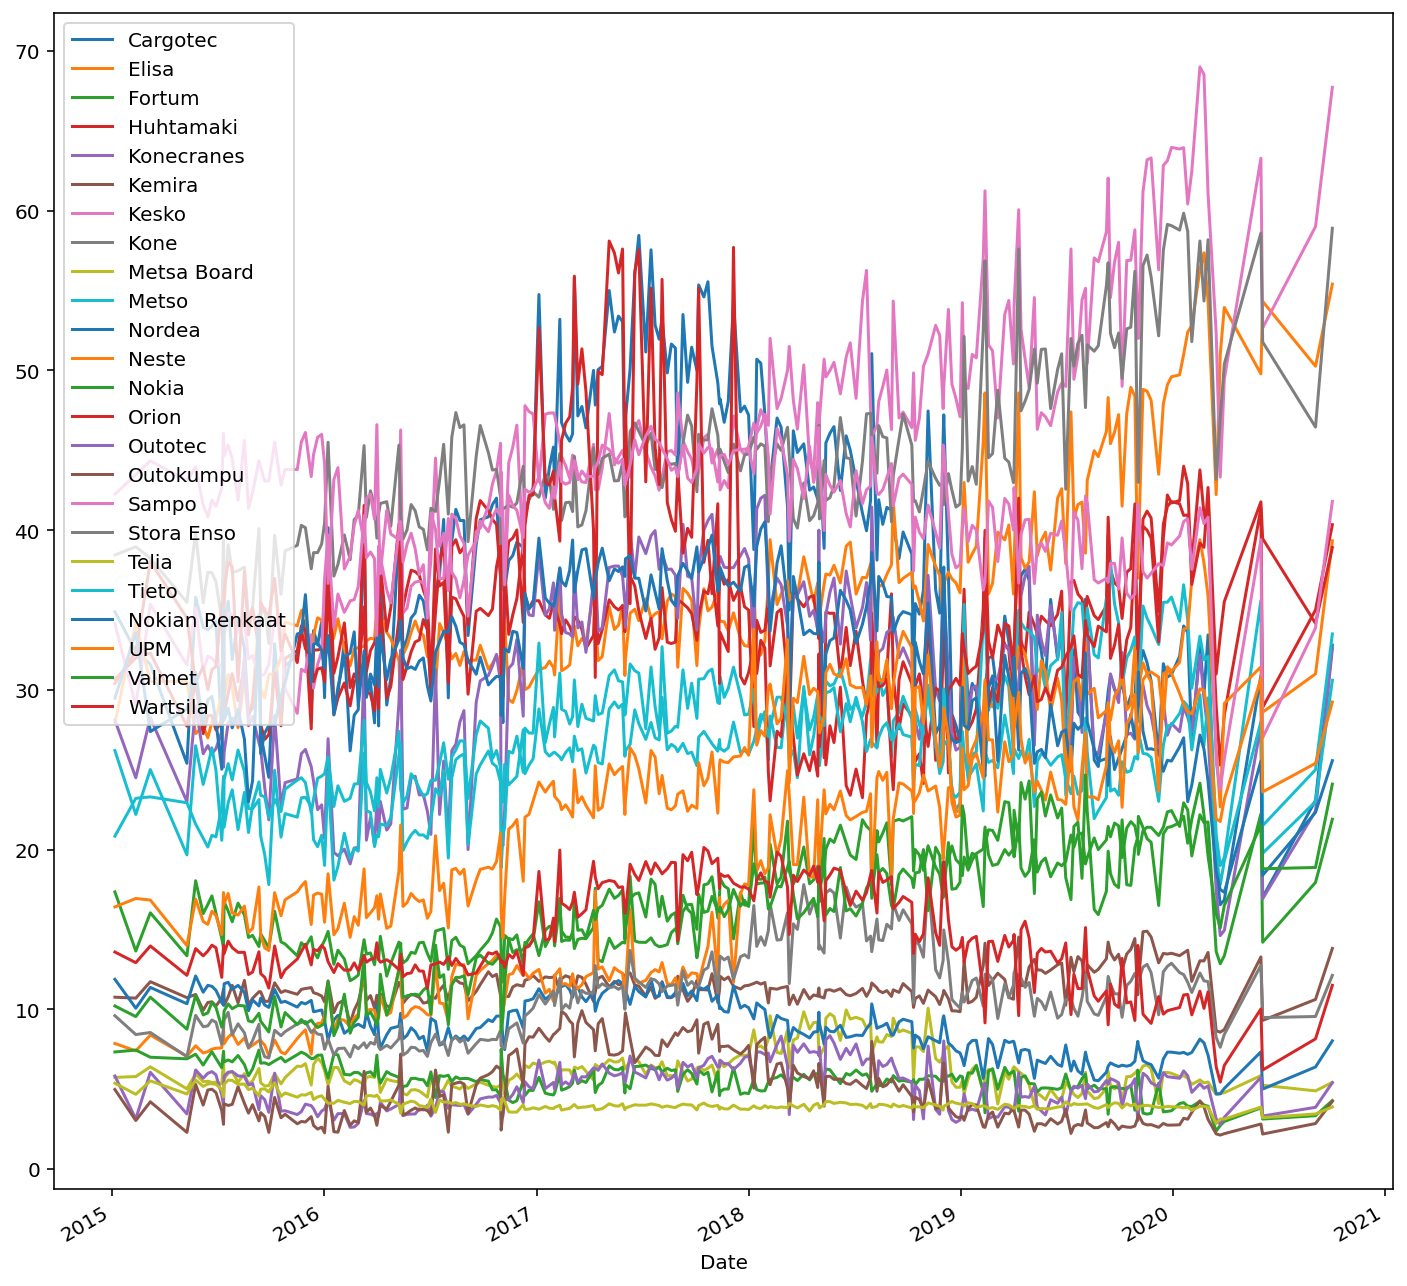

In [8]:
ax = plt.gca()
labels = list()


for company in data.Company.unique():
  data.loc[data.Company==company].plot(x='Date', y='Open', kind='line', ax=ax)
  labels.append(str(companies[str(company)]))


ax.legend(labels=labels, prop={'size': 10}, loc='upper left')

plt.show()

In [0]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 10ms/sample - loss: 1276.4660 - val_loss: 332.3959
Epoch 2/30
179/179 [==============================] - 0s 511us/sample - loss: 240.8164 - val_loss: 563.7693
Epoch 3/30
179/179 [==============================] - 0s 473us/sample - loss: 247.6704 - val_loss: 59.6727
Epoch 4/30
179/179 [==============================] - 0s 455us/sample - loss: 122.1196 - val_loss: 58.3469
Epoch 5/30
179/179 [==============================] - 0s 560us/sample - loss: 79.8622 - val_loss: 114.7377
Epoch 6/30
179/179 [==============================] - 0s 444us/sample - loss: 89.1435 - val_loss: 68.6322
Epoch 7/30
179/179 [==============================] - 0s 508us/sample - loss: 69.8225 - val_loss: 51.4046
Epoch 8/30
179/179 [==============================] - 0s 488us/sample - loss: 46.0606 - val_loss: 47.7044
Epoch 9/30
179/179 [==============================] - 0s 459us/sample - loss: 30.

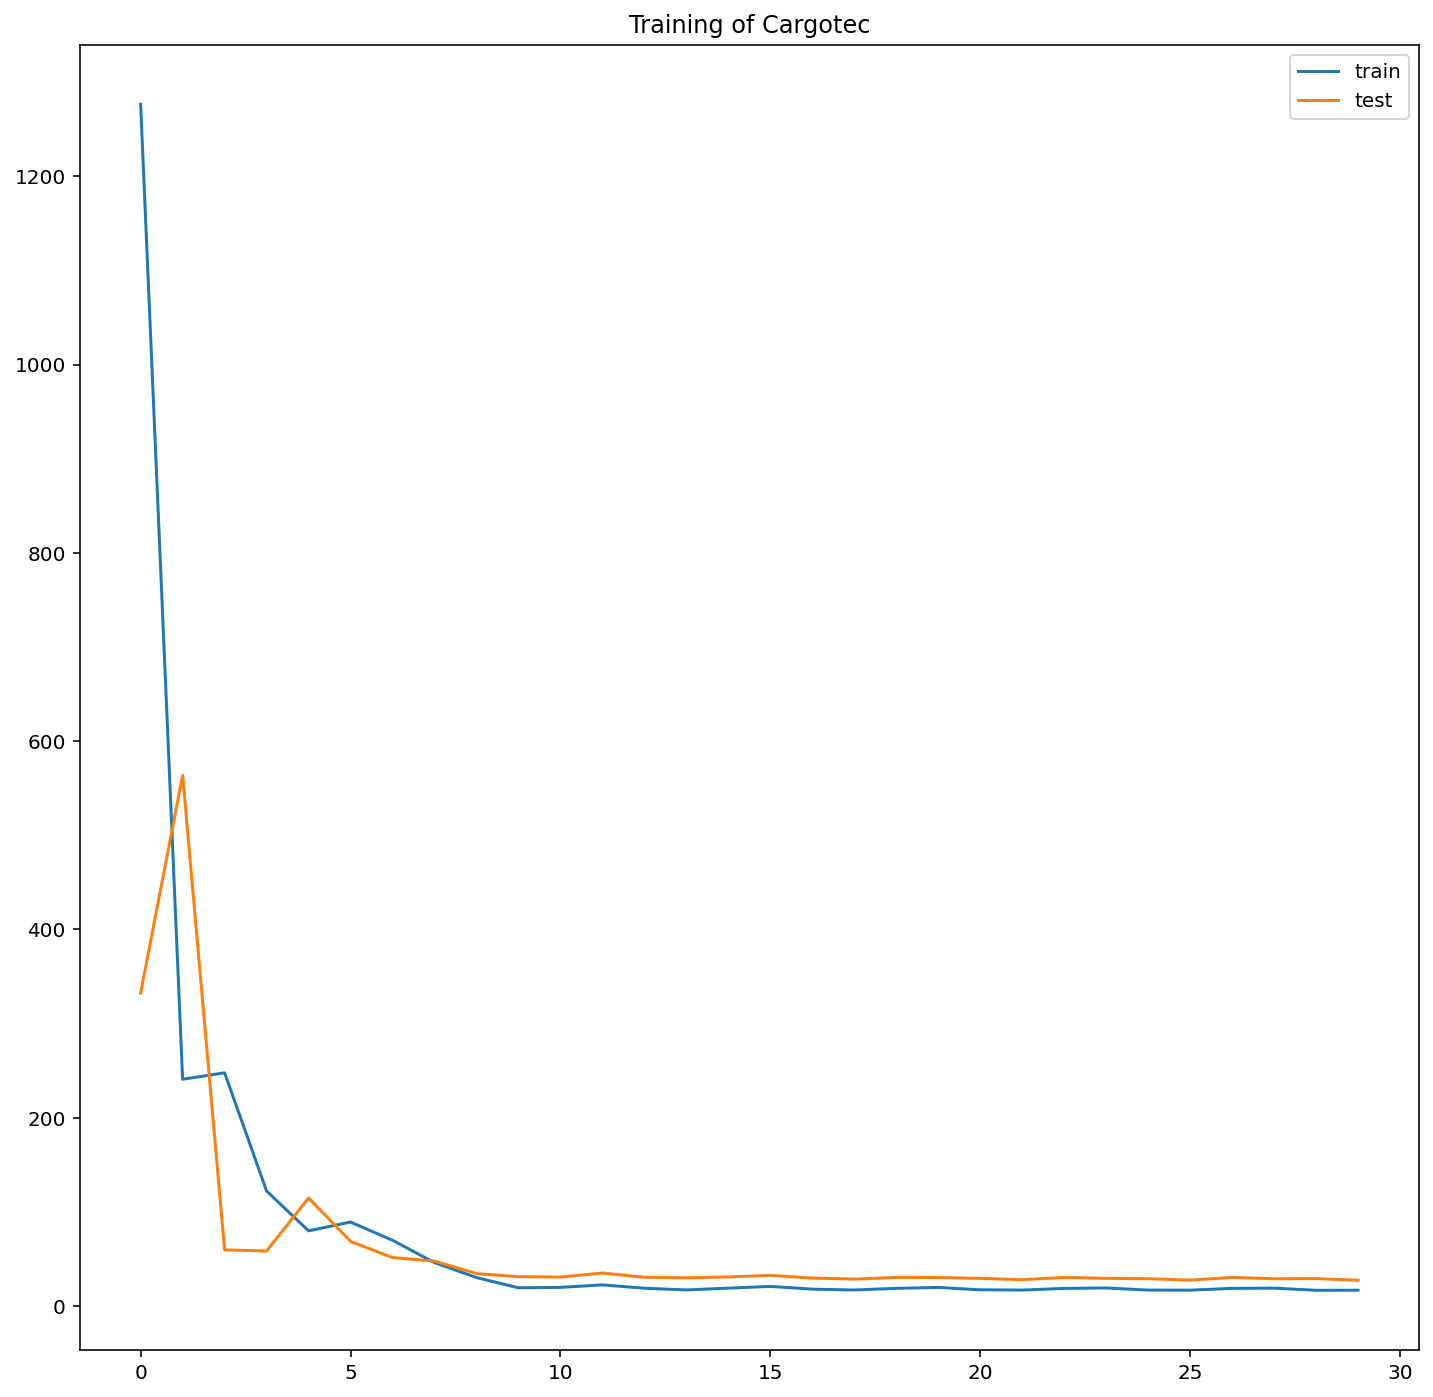

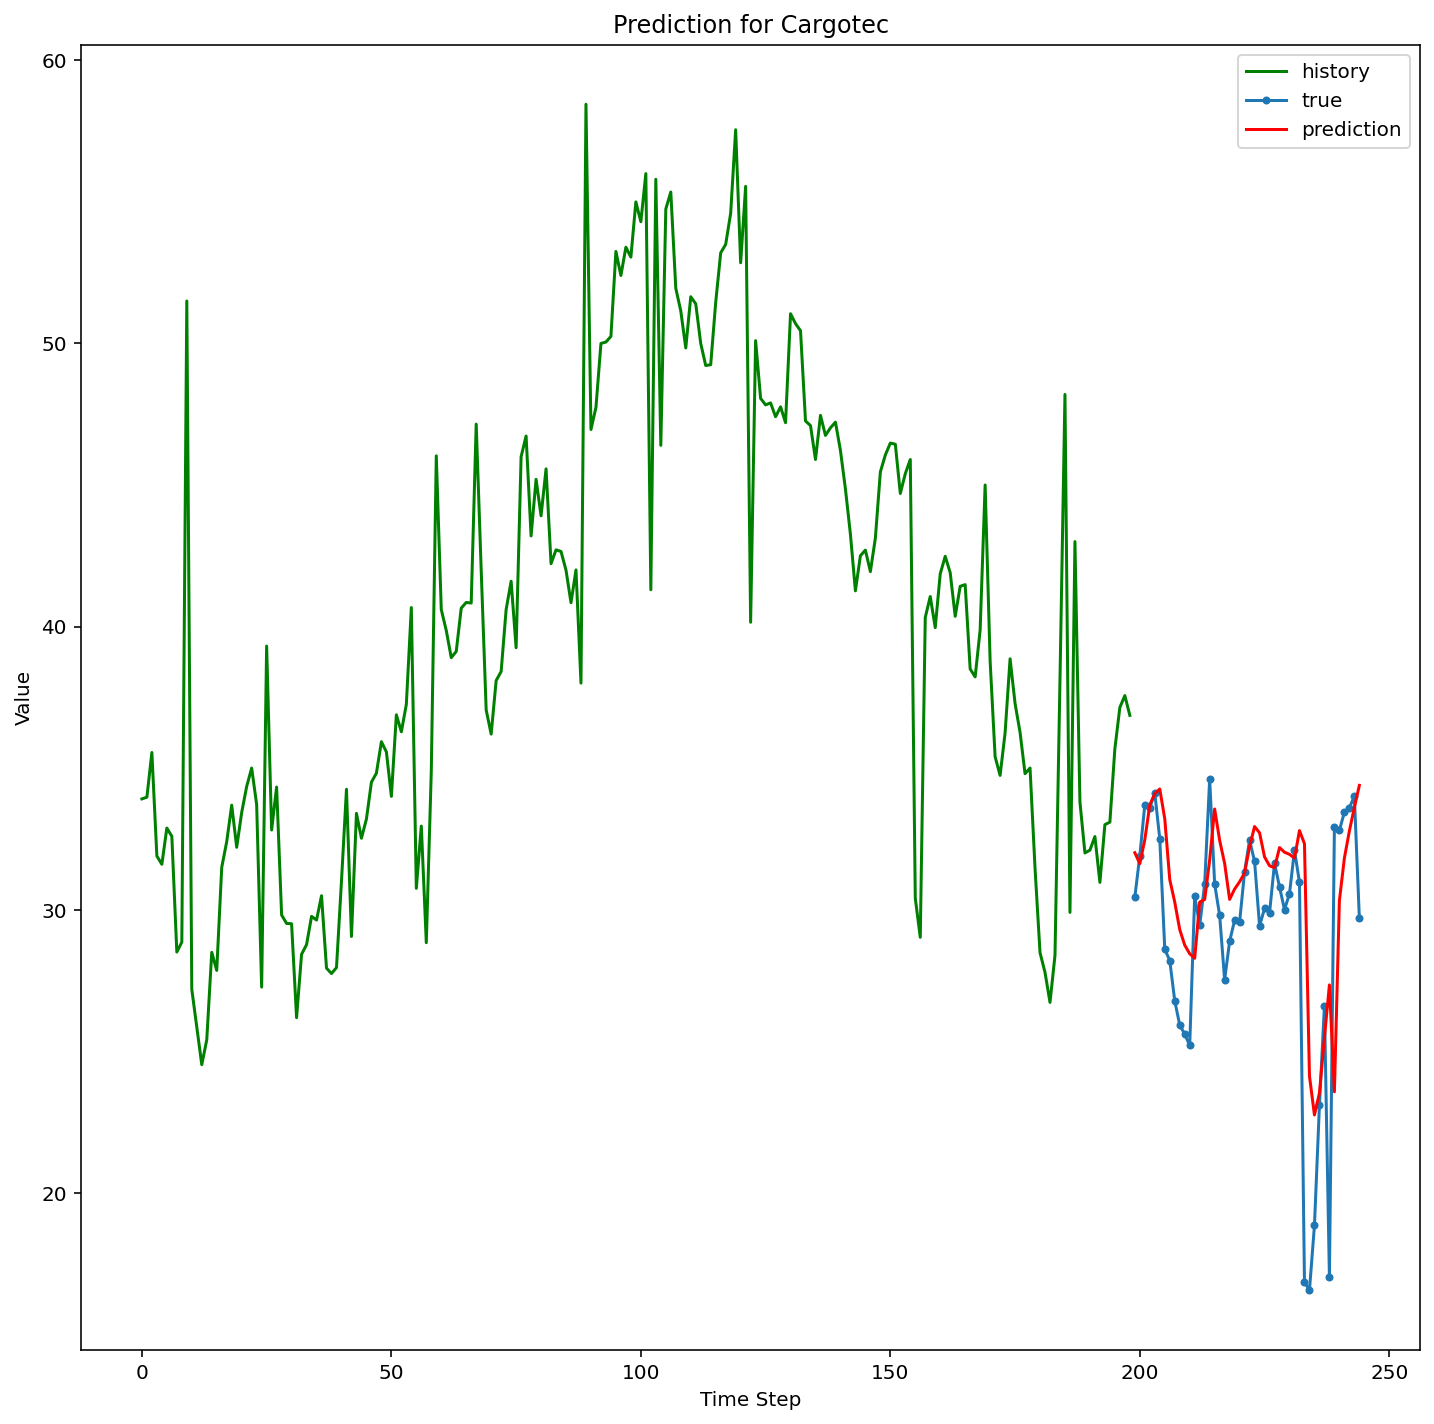

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 10ms/sample - loss: 624.0745 - val_loss: 206.9507
Epoch 2/30
179/179 [==============================] - 0s 534us/sample - loss: 31.2806 - val_loss: 6.0928
Epoch 3/30
179/179 [==============================] - 0s 442us/sample - loss: 36.4144 - val_loss: 61.9509
Epoch 4/30
179/179 [==============================] - 0s 469us/sample - loss: 7.2672 - val_loss: 5.5981
Epoch 5/30
179/179 [==============================] - 0s 466us/sample - loss: 15.8016 - val_loss: 19.4928
Epoch 6/30
179/179 [==============================] - 0s 447us/sample - loss: 8.9337 - val_loss: 13.5561
Epoch 7/30
179/179 [==============================] - 0s 504us/sample - loss: 9.7514 - val_loss: 13.2539
Epoch 8/30
179/179 [==============================] - 0s 505us/sample - loss: 9.4250 - val_loss: 12.9674
Epoch 9/30
179/179 [==============================] - 0s 551us/sample - loss: 8.9868 - val_lo

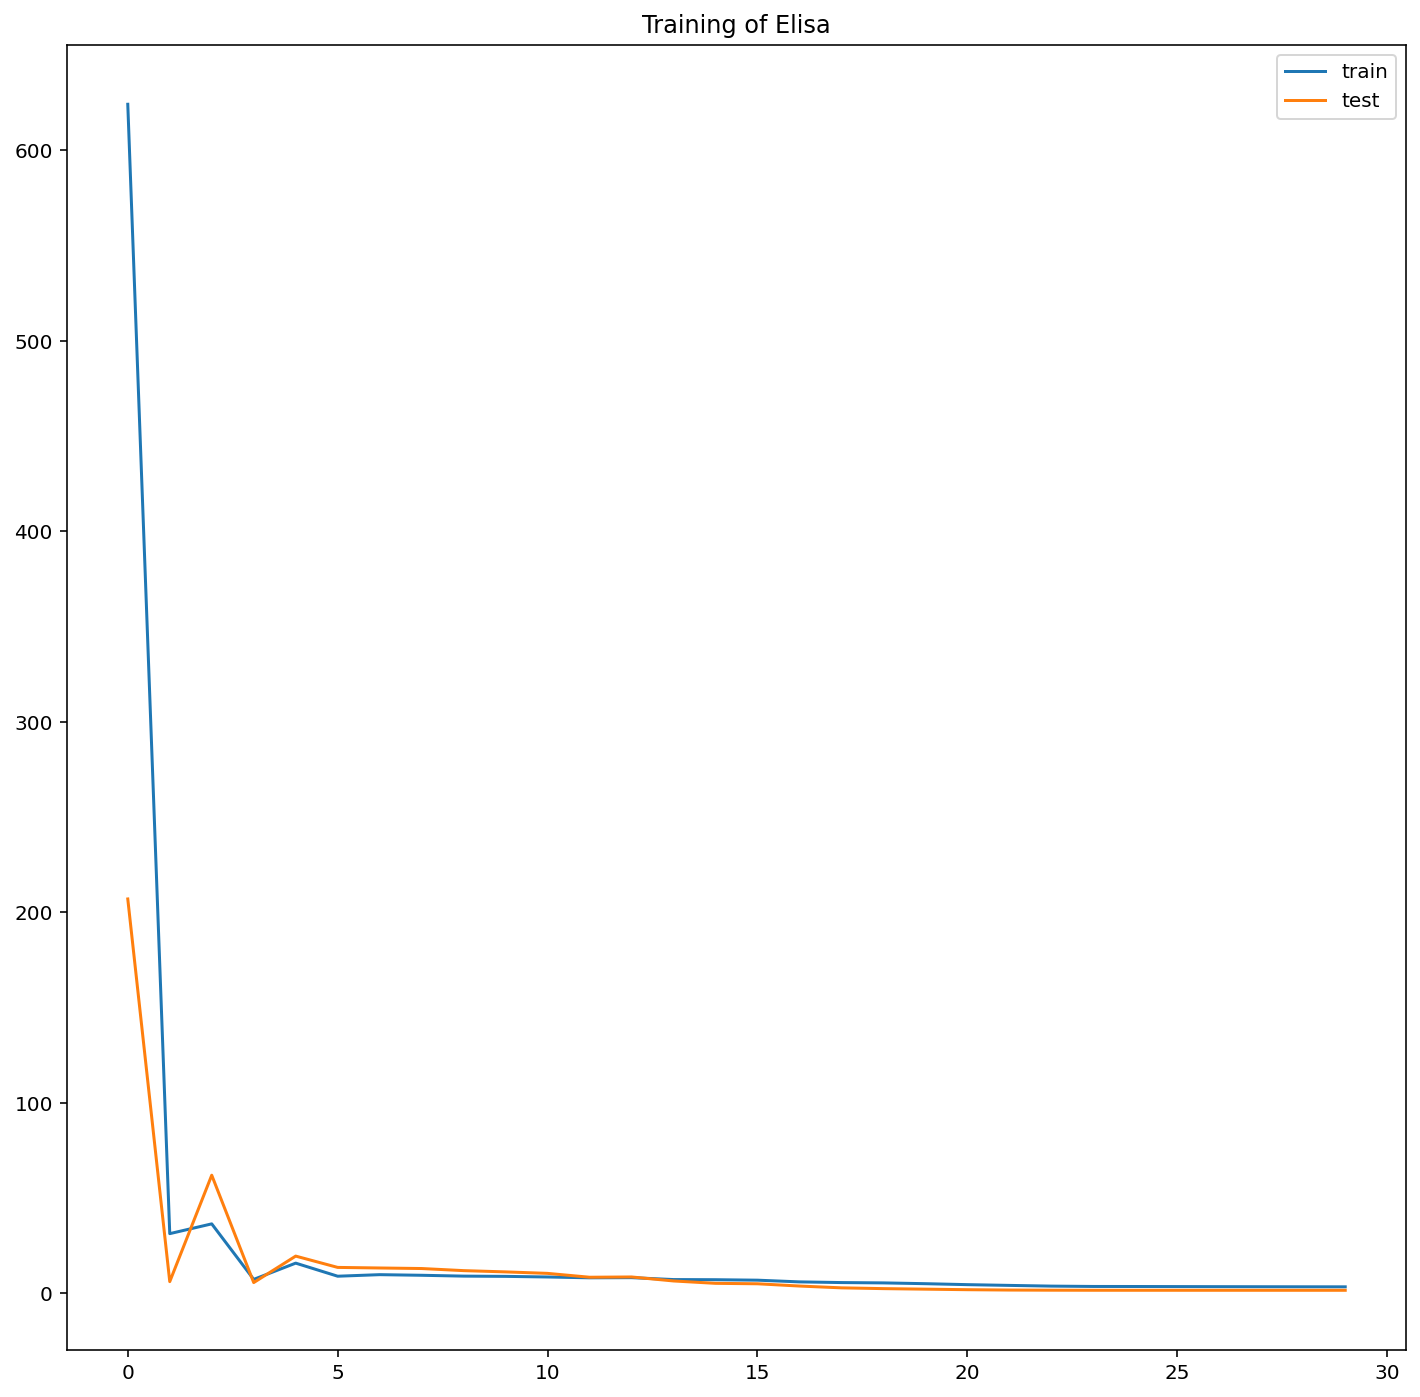

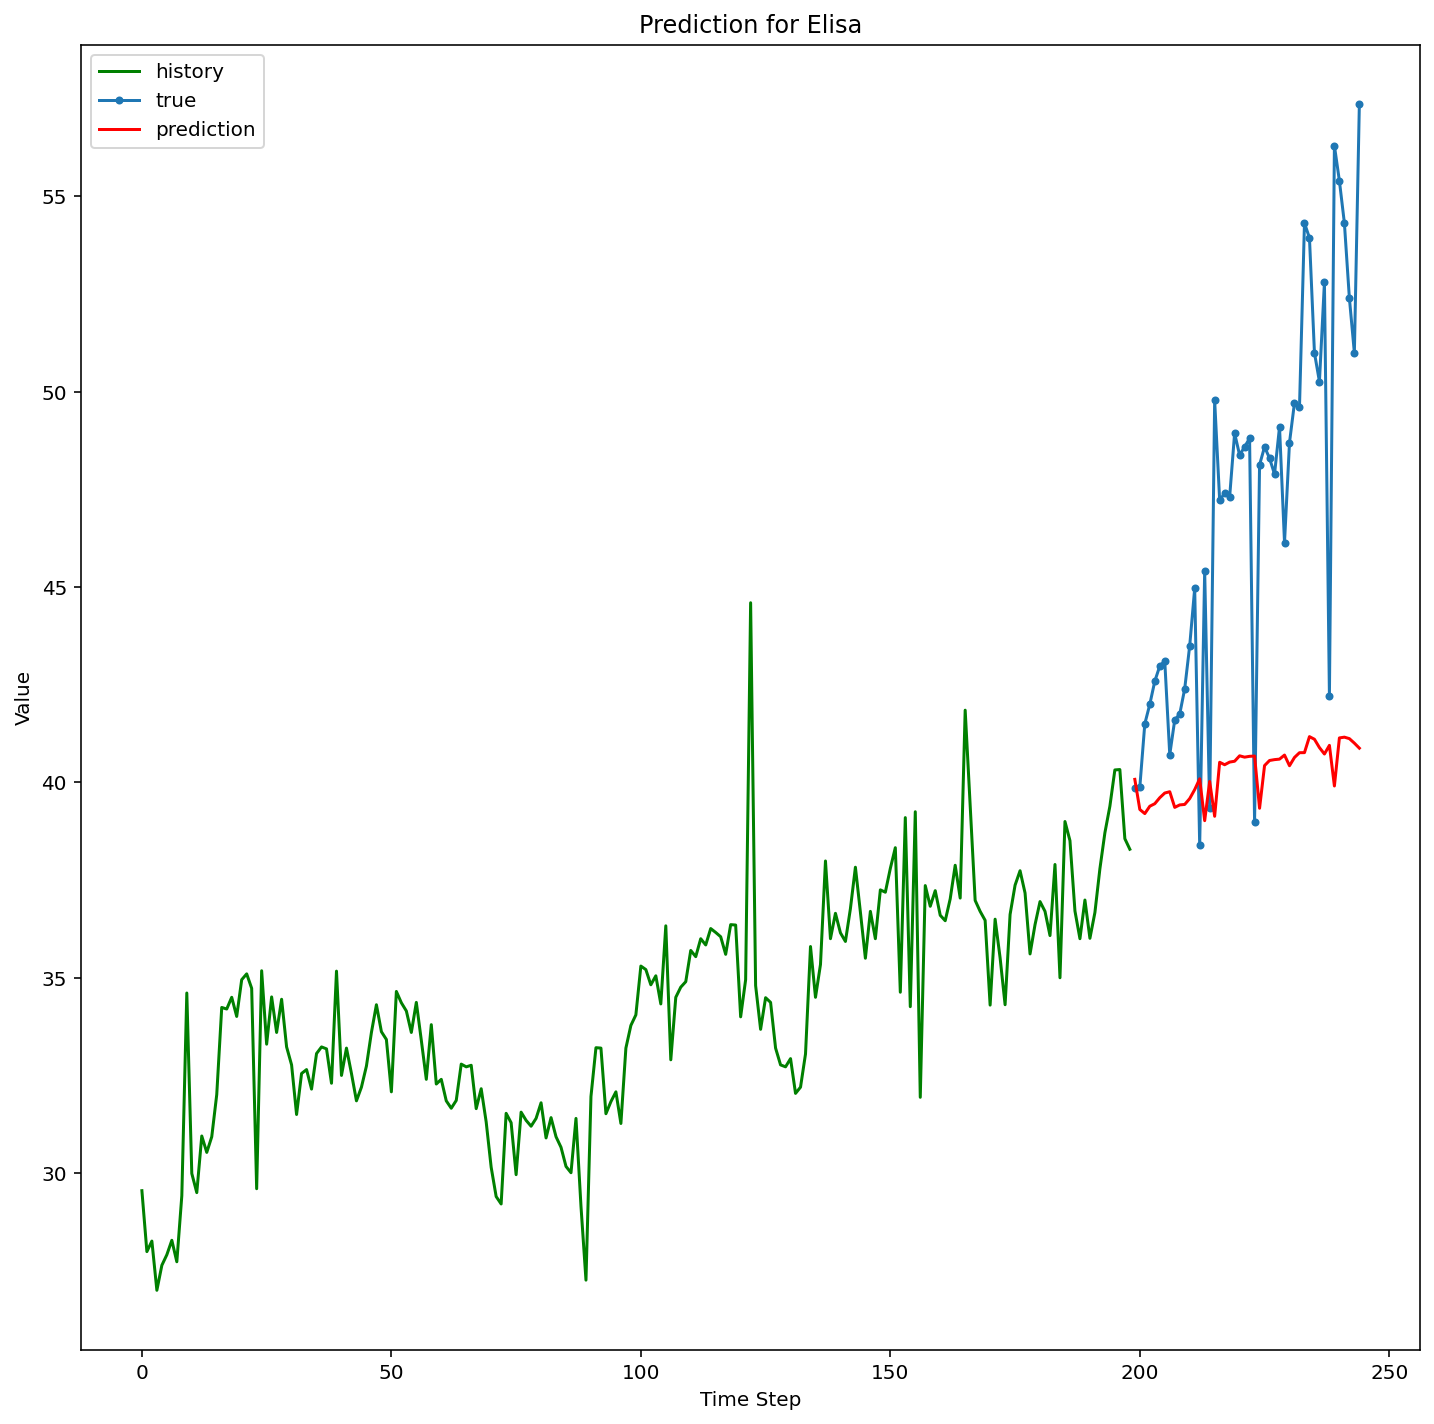

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 9ms/sample - loss: 87.1925 - val_loss: 1.1065
Epoch 2/30
179/179 [==============================] - 0s 497us/sample - loss: 36.2349 - val_loss: 30.2044
Epoch 3/30
179/179 [==============================] - 0s 464us/sample - loss: 9.2105 - val_loss: 14.5469
Epoch 4/30
179/179 [==============================] - 0s 458us/sample - loss: 6.8858 - val_loss: 6.6424
Epoch 5/30
179/179 [==============================] - 0s 476us/sample - loss: 8.1471 - val_loss: 11.7113
Epoch 6/30
179/179 [==============================] - 0s 471us/sample - loss: 4.8525 - val_loss: 5.5082
Epoch 7/30
179/179 [==============================] - 0s 506us/sample - loss: 5.2886 - val_loss: 5.1075
Epoch 8/30
179/179 [==============================] - 0s 500us/sample - loss: 3.4919 - val_loss: 2.7975
Epoch 9/30
179/179 [==============================] - 0s 485us/sample - loss: 2.7990 - val_loss: 1.64

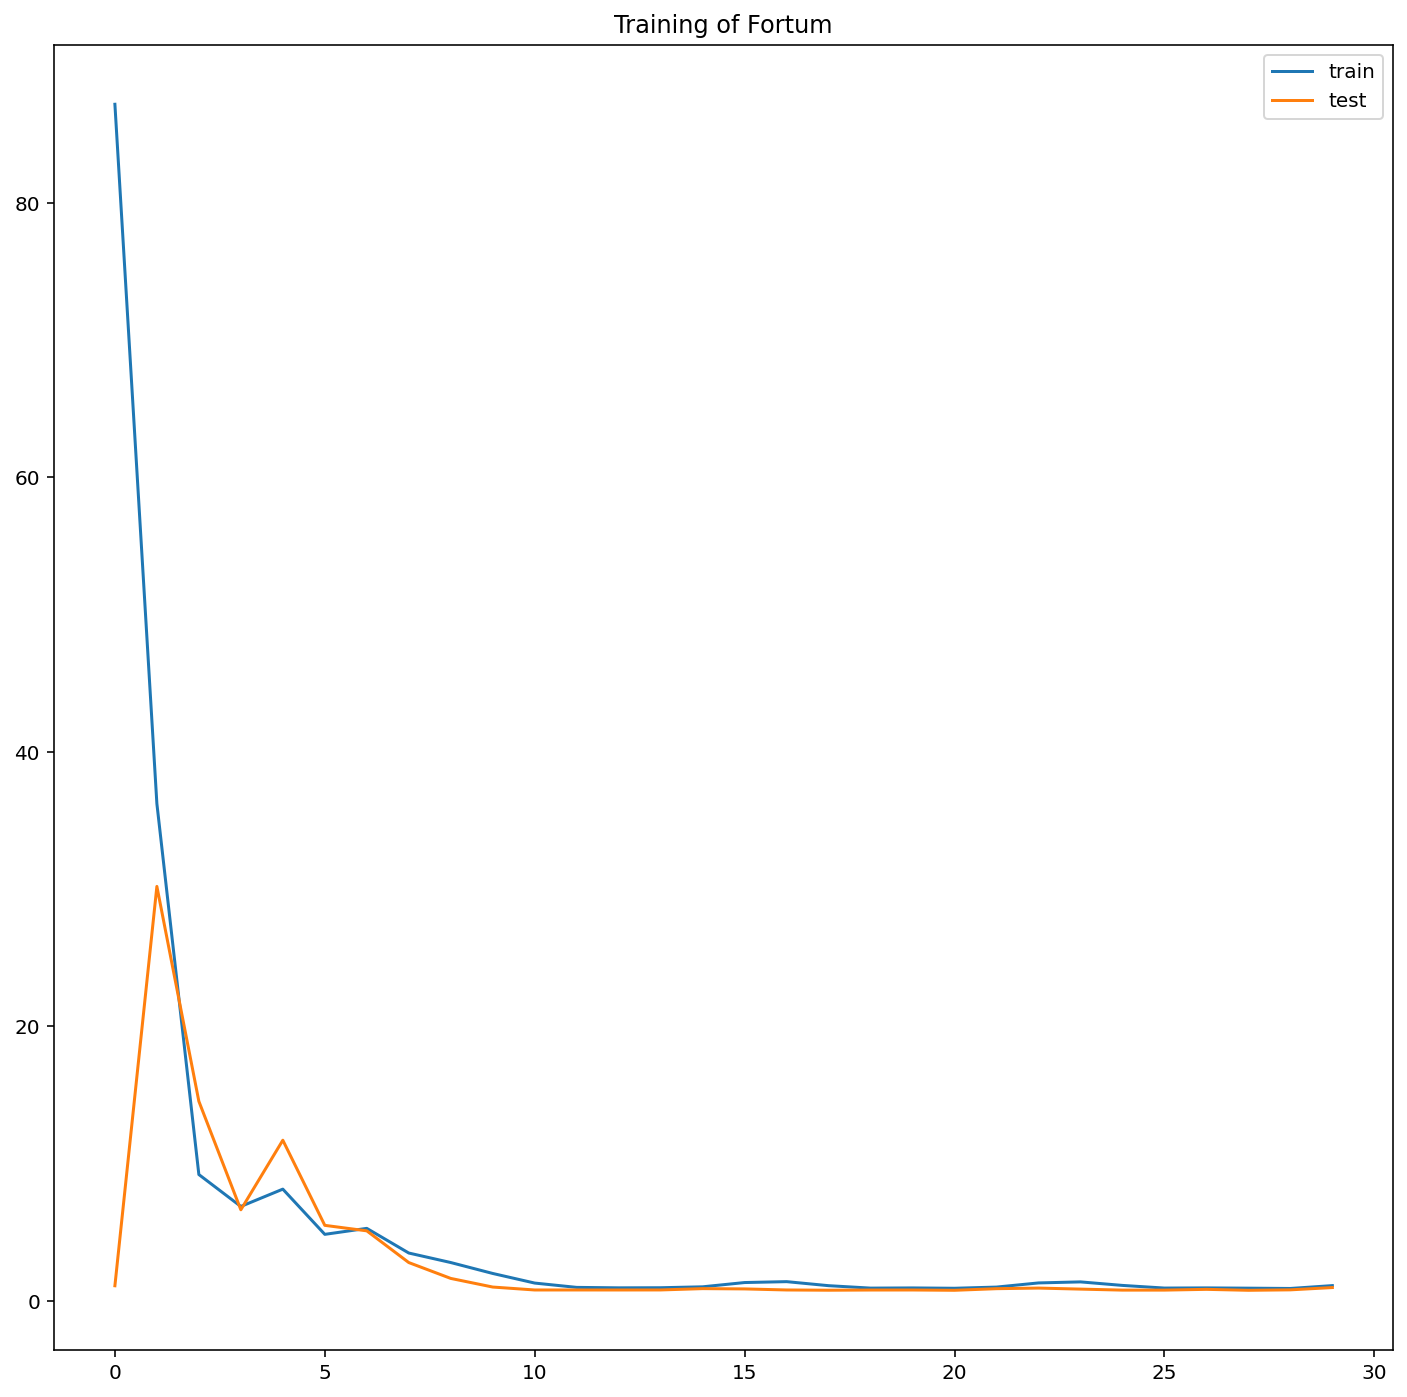

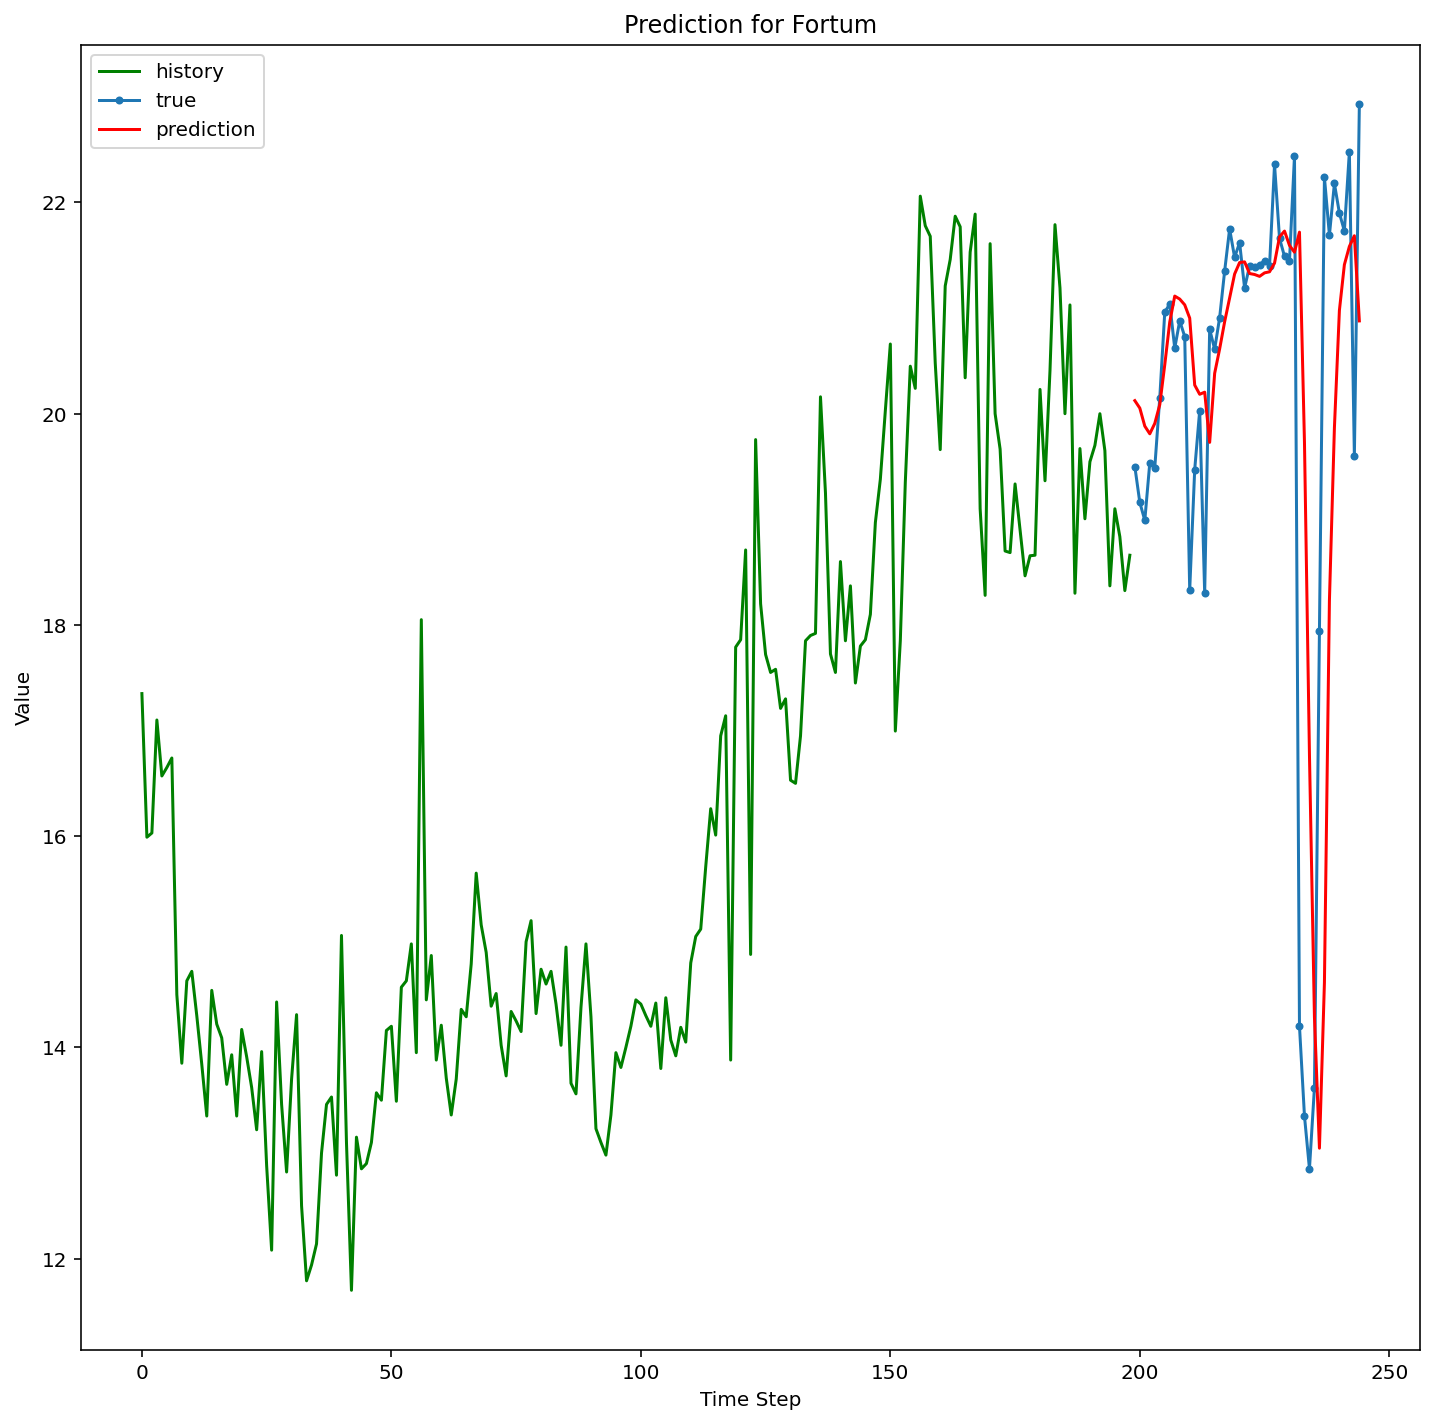

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 9ms/sample - loss: 692.1854 - val_loss: 41.9611
Epoch 2/30
179/179 [==============================] - 0s 468us/sample - loss: 70.9803 - val_loss: 64.6079
Epoch 3/30
179/179 [==============================] - 0s 486us/sample - loss: 51.0785 - val_loss: 15.5338
Epoch 4/30
179/179 [==============================] - 0s 469us/sample - loss: 30.2322 - val_loss: 40.0144
Epoch 5/30
179/179 [==============================] - 0s 455us/sample - loss: 17.0875 - val_loss: 13.4203
Epoch 6/30
179/179 [==============================] - 0s 497us/sample - loss: 19.7359 - val_loss: 15.0327
Epoch 7/30
179/179 [==============================] - 0s 501us/sample - loss: 15.1379 - val_loss: 16.6955
Epoch 8/30
179/179 [==============================] - 0s 450us/sample - loss: 15.3609 - val_loss: 12.8880
Epoch 9/30
179/179 [==============================] - 0s 459us/sample - loss: 13.5048 - v

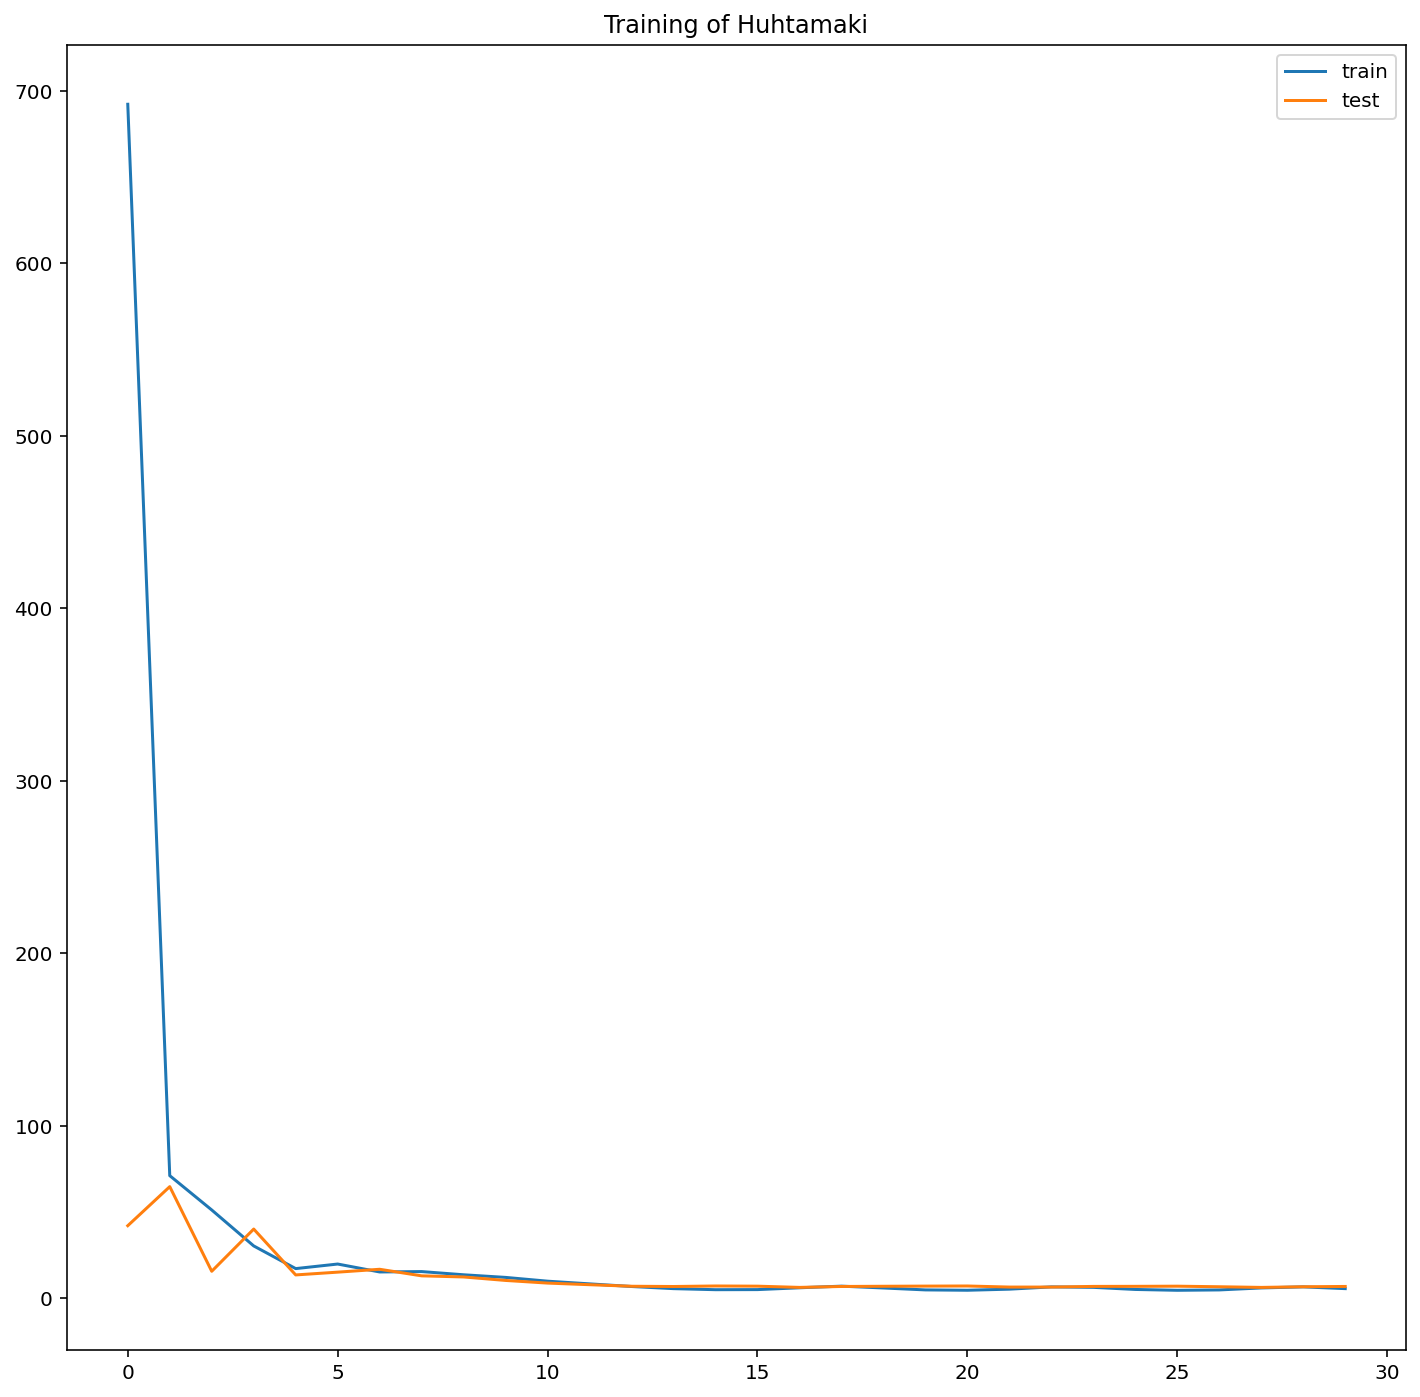

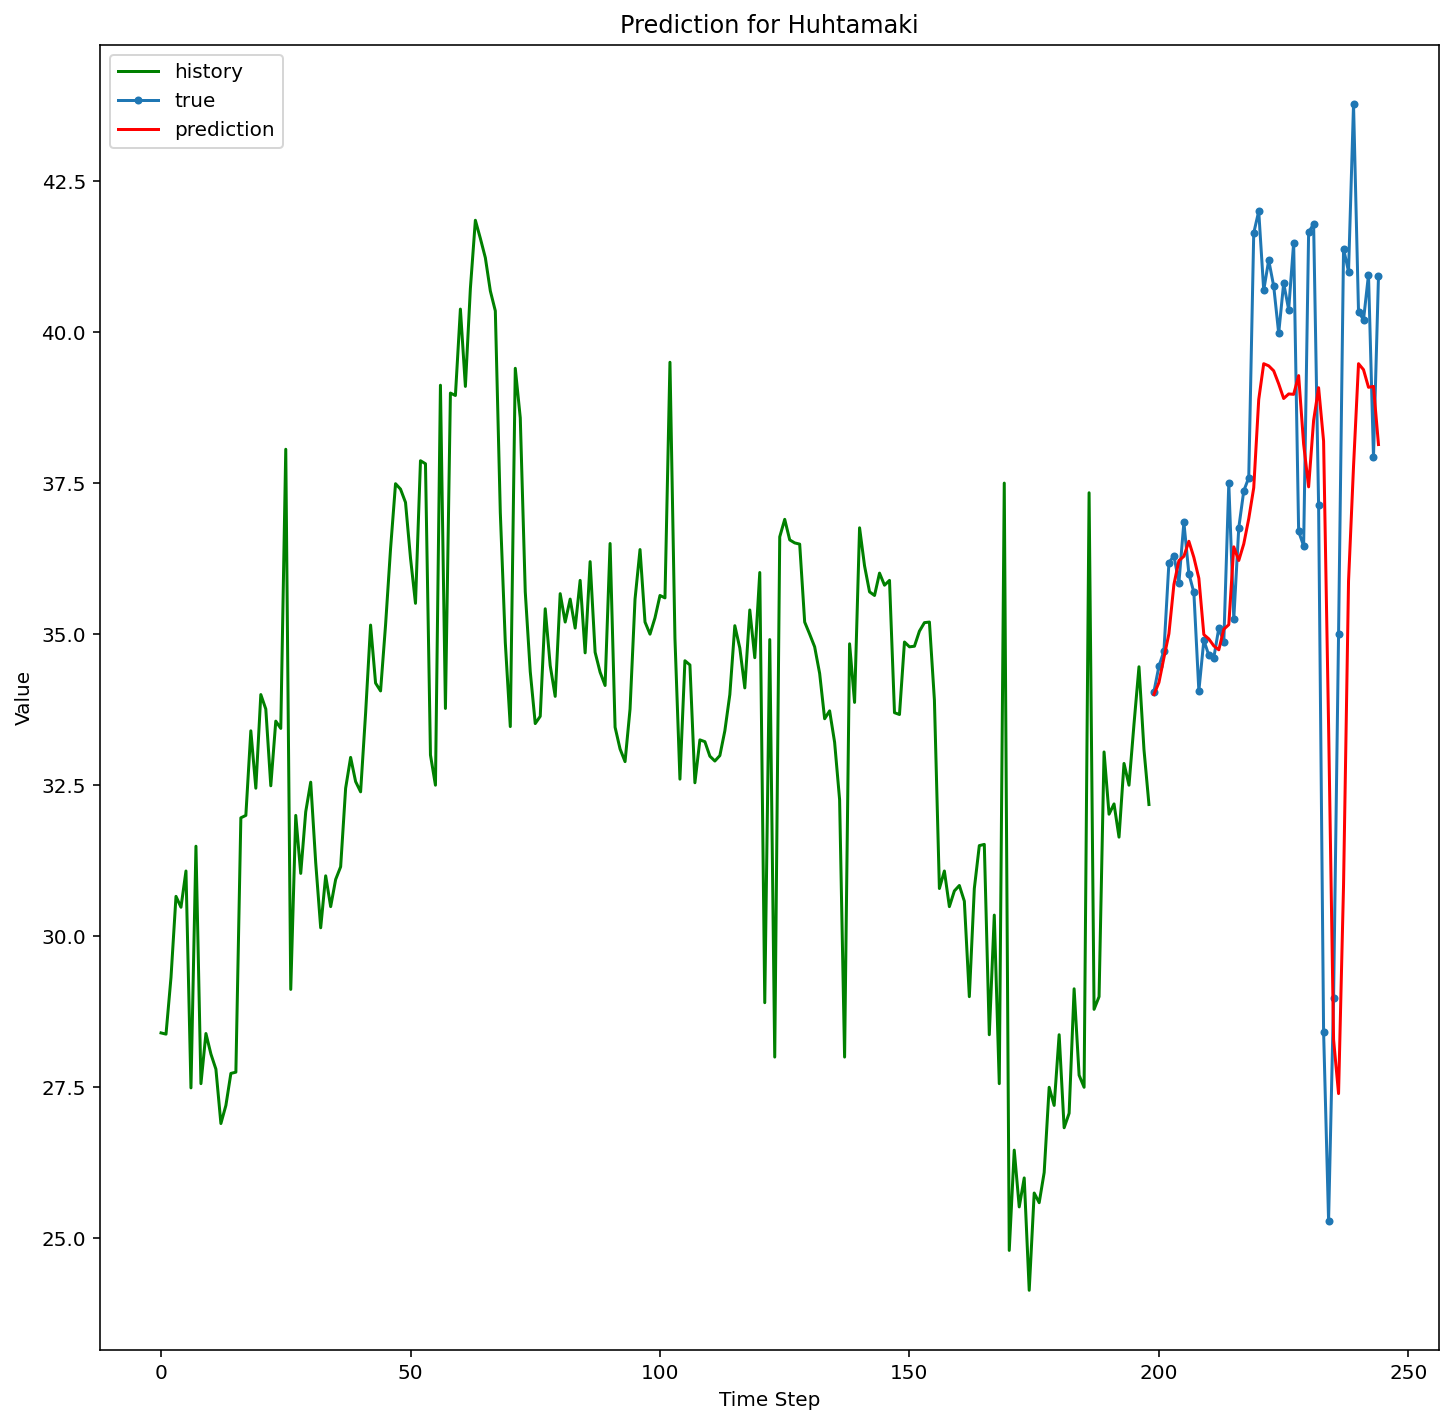

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 9ms/sample - loss: 573.4102 - val_loss: 77.0981
Epoch 2/30
179/179 [==============================] - 0s 521us/sample - loss: 36.9618 - val_loss: 117.5488
Epoch 3/30
179/179 [==============================] - 0s 537us/sample - loss: 128.9240 - val_loss: 19.6323
Epoch 4/30
179/179 [==============================] - 0s 459us/sample - loss: 45.5661 - val_loss: 11.7552
Epoch 5/30
179/179 [==============================] - 0s 441us/sample - loss: 40.6128 - val_loss: 9.2084
Epoch 6/30
179/179 [==============================] - 0s 456us/sample - loss: 35.6013 - val_loss: 5.6527
Epoch 7/30
179/179 [==============================] - 0s 474us/sample - loss: 22.7621 - val_loss: 6.8683
Epoch 8/30
179/179 [==============================] - 0s 460us/sample - loss: 17.9169 - val_loss: 5.2690
Epoch 9/30
179/179 [==============================] - 0s 453us/sample - loss: 12.4386 - val

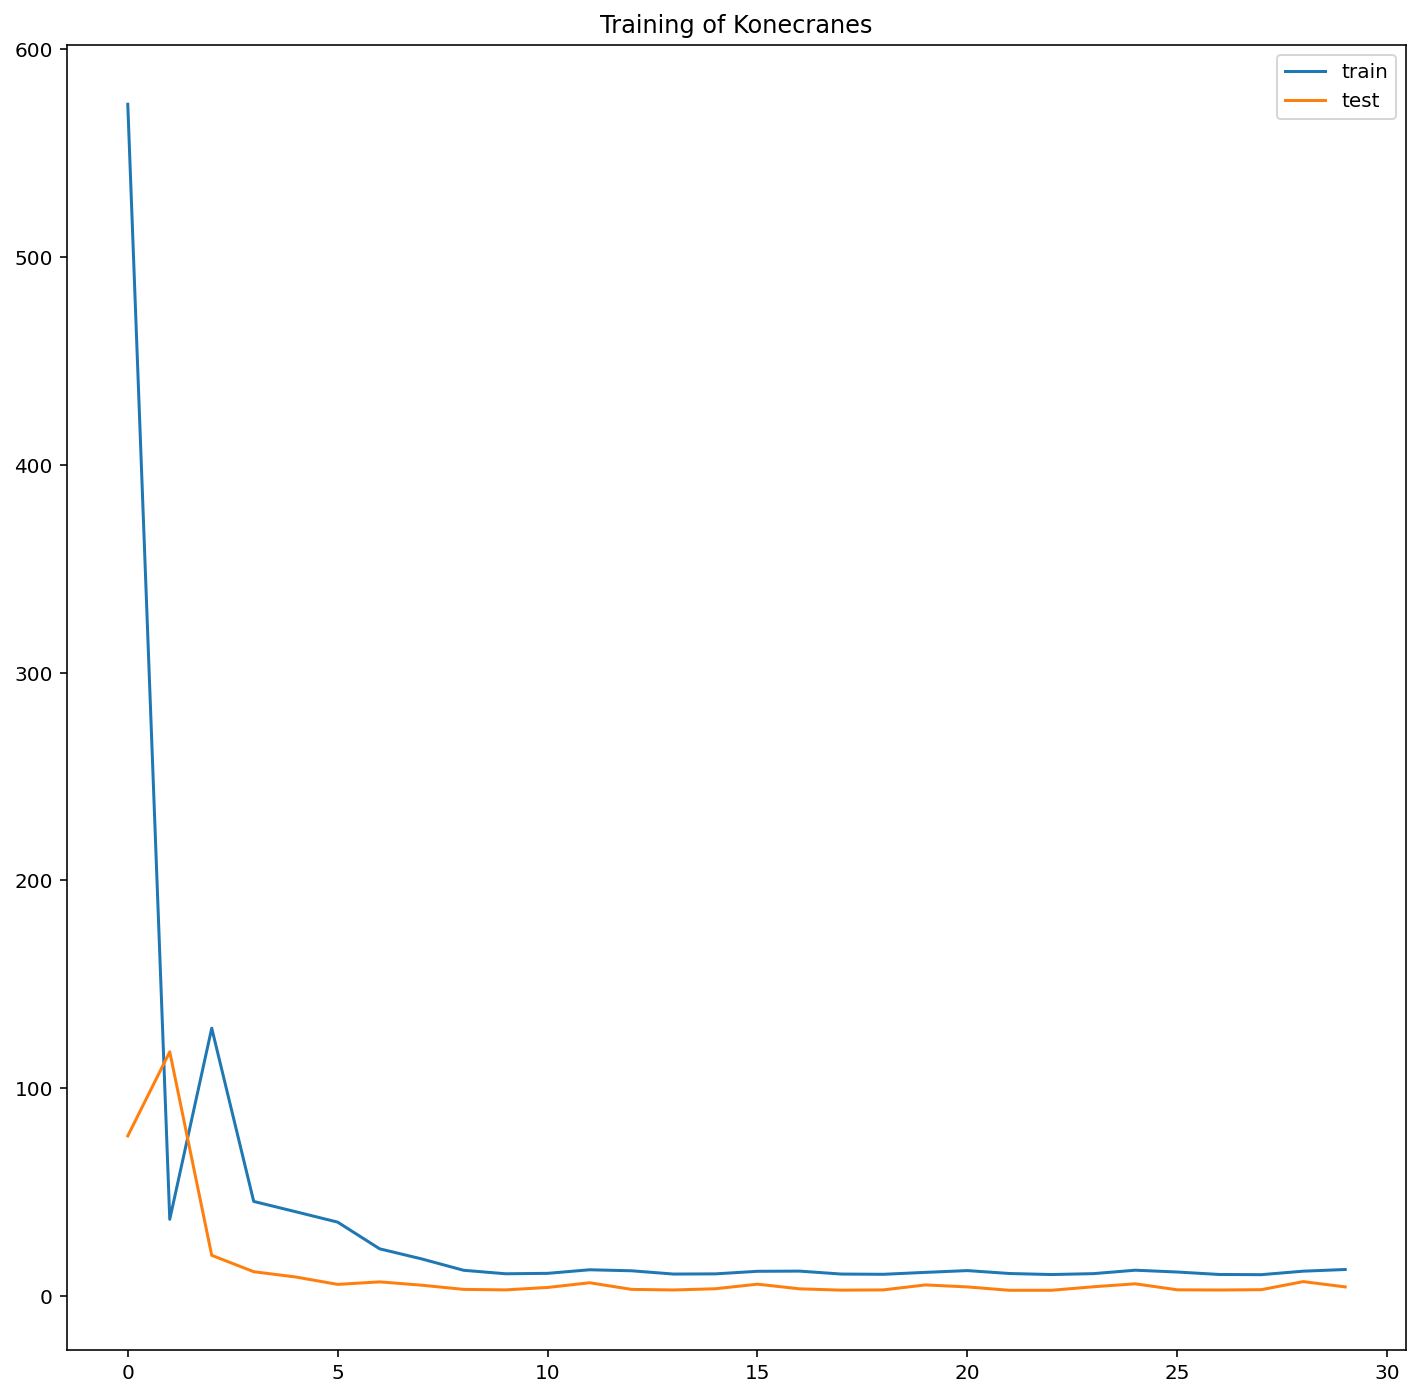

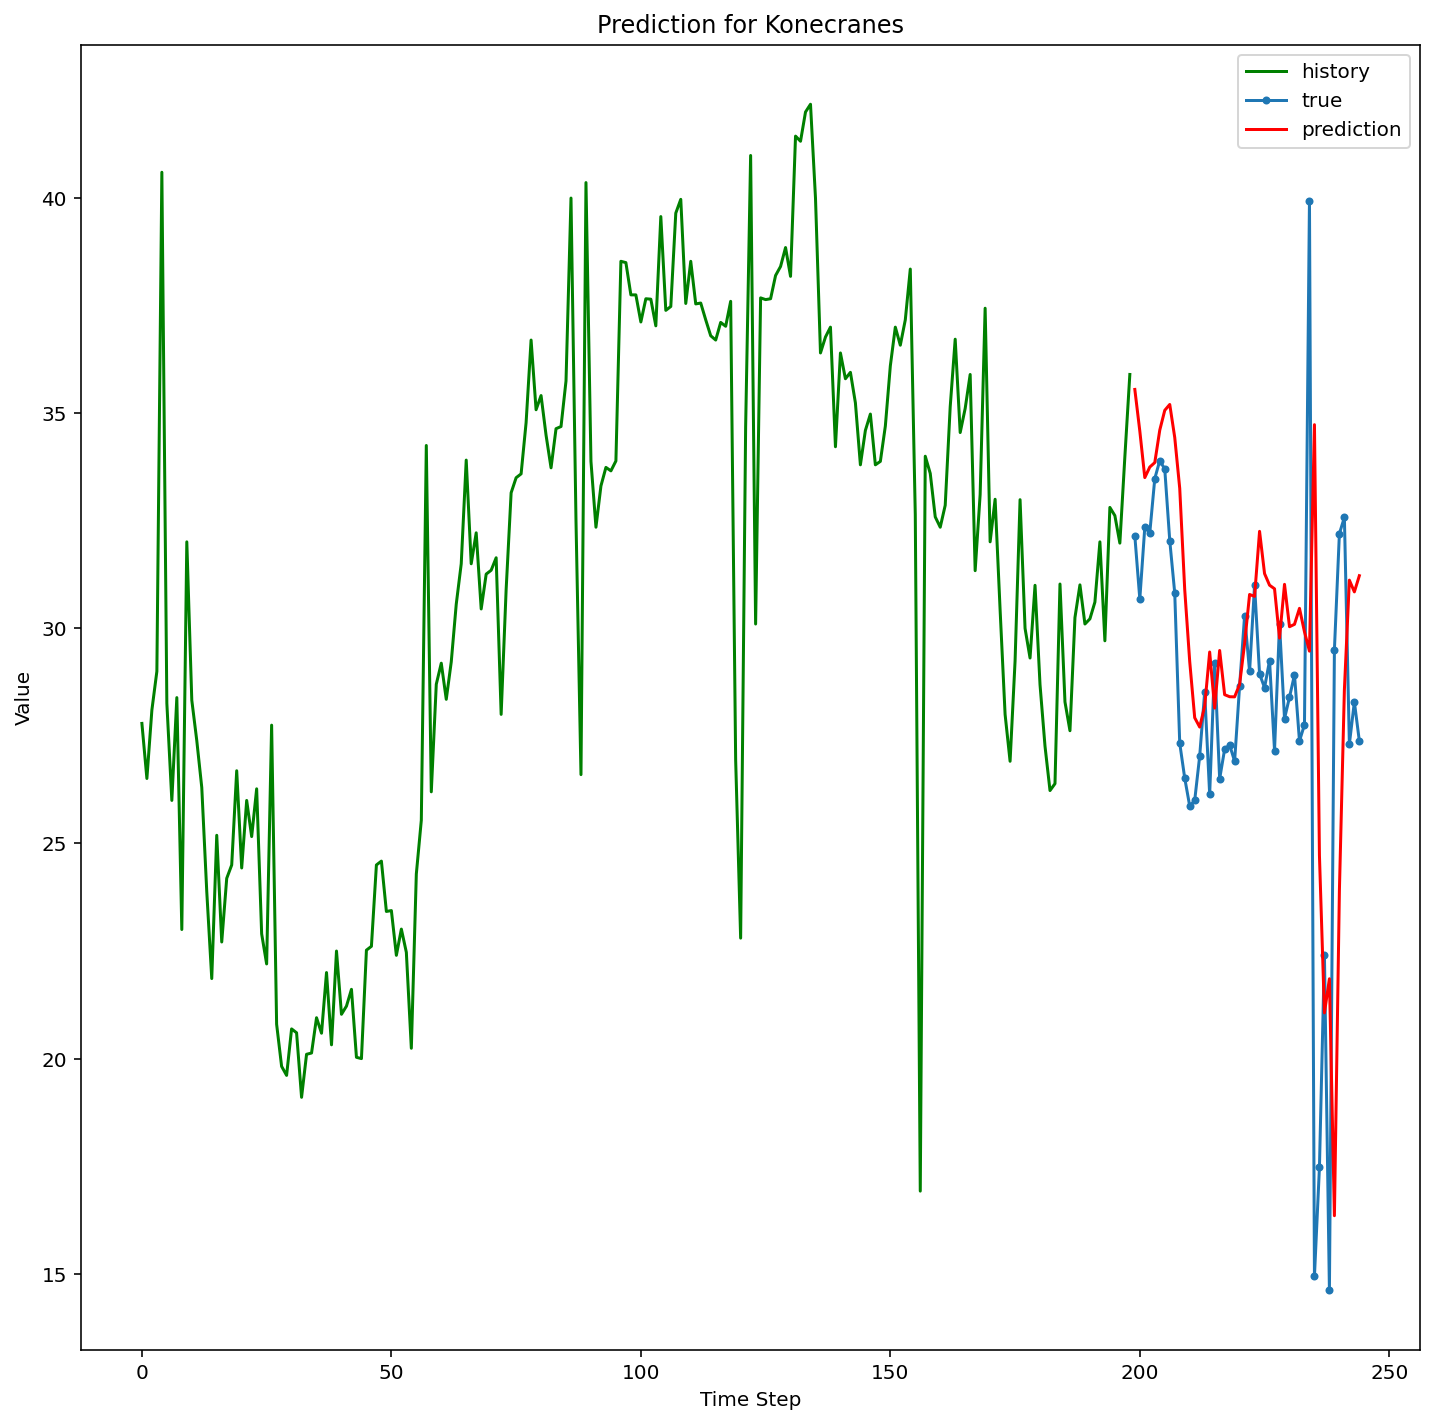

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 10ms/sample - loss: 28.0544 - val_loss: 6.9443
Epoch 2/30
179/179 [==============================] - 0s 477us/sample - loss: 3.6811 - val_loss: 2.8969
Epoch 3/30
179/179 [==============================] - 0s 476us/sample - loss: 0.8871 - val_loss: 1.3336
Epoch 4/30
179/179 [==============================] - 0s 440us/sample - loss: 0.7808 - val_loss: 0.6893
Epoch 5/30
179/179 [==============================] - 0s 516us/sample - loss: 0.3397 - val_loss: 0.5915
Epoch 6/30
179/179 [==============================] - 0s 488us/sample - loss: 0.4570 - val_loss: 0.4870
Epoch 7/30
179/179 [==============================] - 0s 453us/sample - loss: 0.3317 - val_loss: 0.4971
Epoch 8/30
179/179 [==============================] - 0s 457us/sample - loss: 0.4055 - val_loss: 0.4897
Epoch 9/30
179/179 [==============================] - 0s 470us/sample - loss: 0.3708 - val_loss: 0.4799


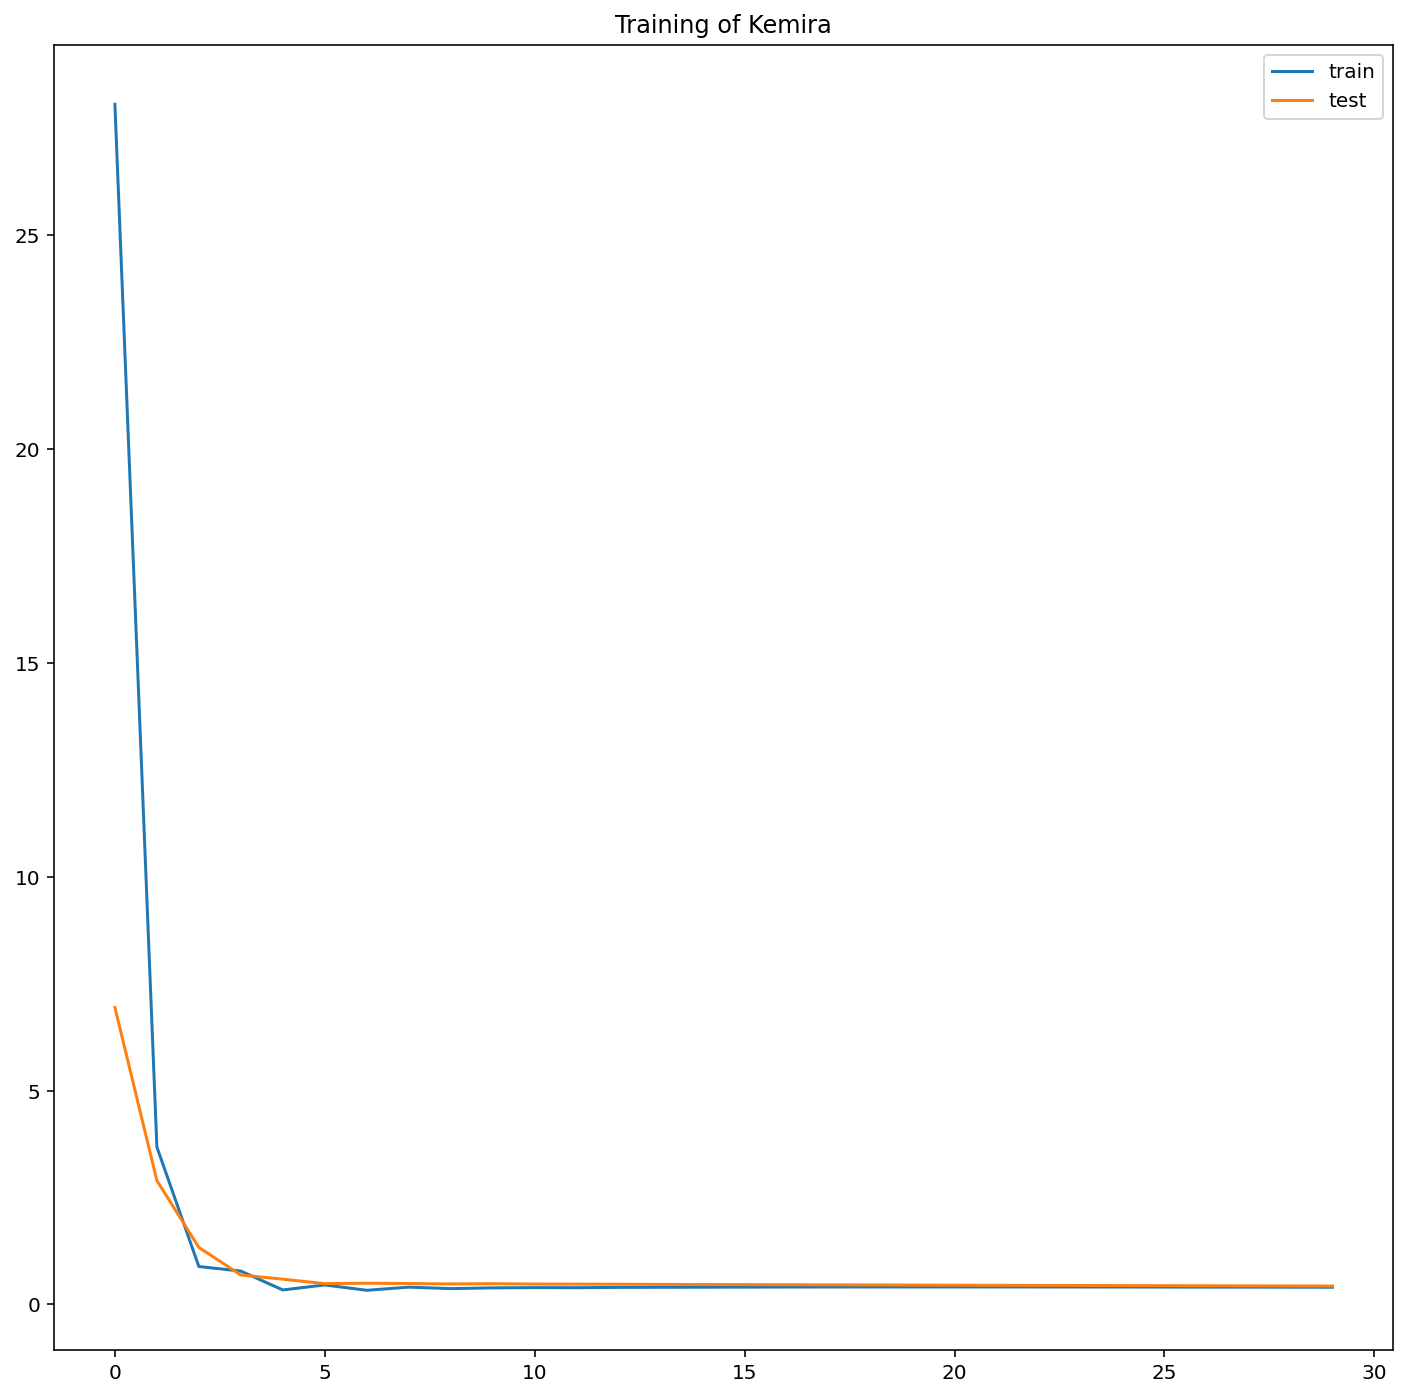

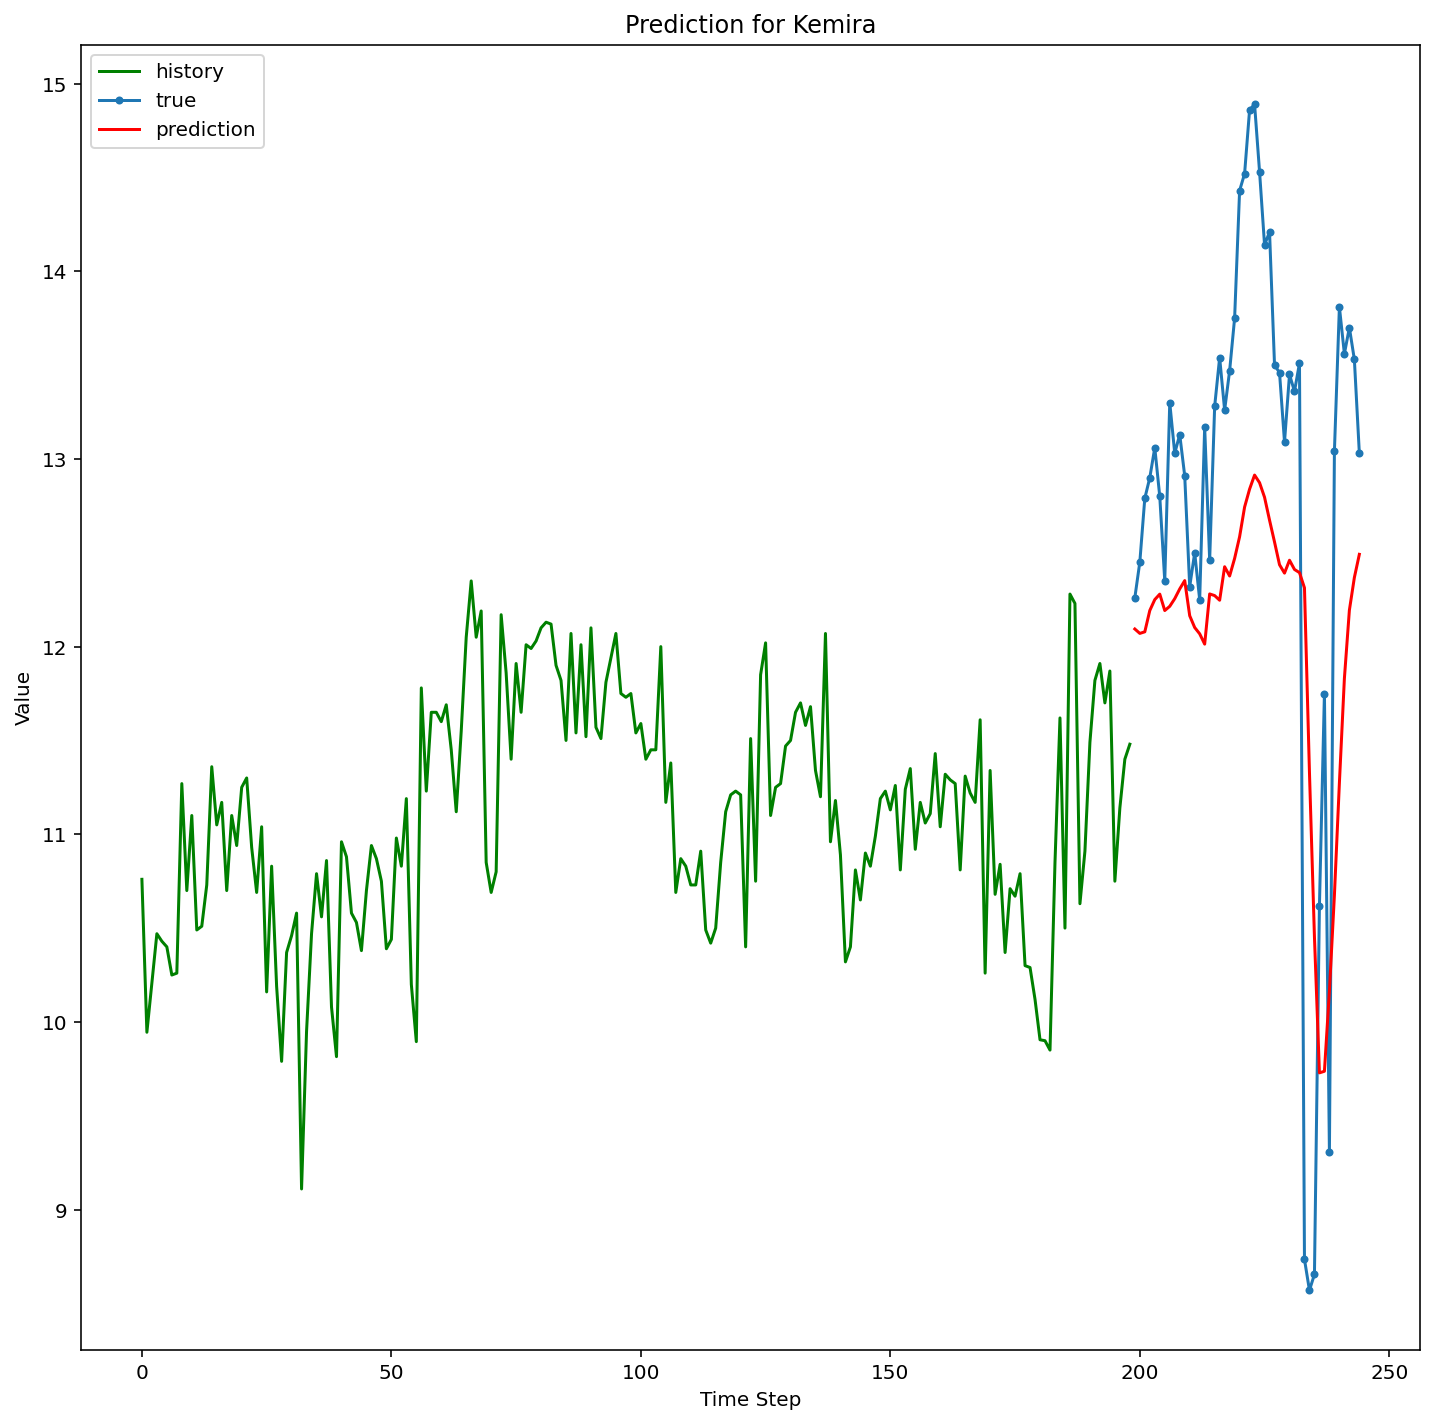

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 9ms/sample - loss: 998.7379 - val_loss: 605.1806
Epoch 2/30
179/179 [==============================] - 0s 489us/sample - loss: 16.9977 - val_loss: 7.8873
Epoch 3/30
179/179 [==============================] - 0s 447us/sample - loss: 192.6138 - val_loss: 229.0940
Epoch 4/30
179/179 [==============================] - 0s 439us/sample - loss: 48.5849 - val_loss: 70.2897
Epoch 5/30
179/179 [==============================] - 0s 568us/sample - loss: 51.4446 - val_loss: 49.7606
Epoch 6/30
179/179 [==============================] - 0s 474us/sample - loss: 54.6062 - val_loss: 68.2844
Epoch 7/30
179/179 [==============================] - 0s 536us/sample - loss: 35.9599 - val_loss: 41.9161
Epoch 8/30
179/179 [==============================] - 0s 477us/sample - loss: 38.2464 - val_loss: 37.7828
Epoch 9/30
179/179 [==============================] - 0s 506us/sample - loss: 25.3280 -

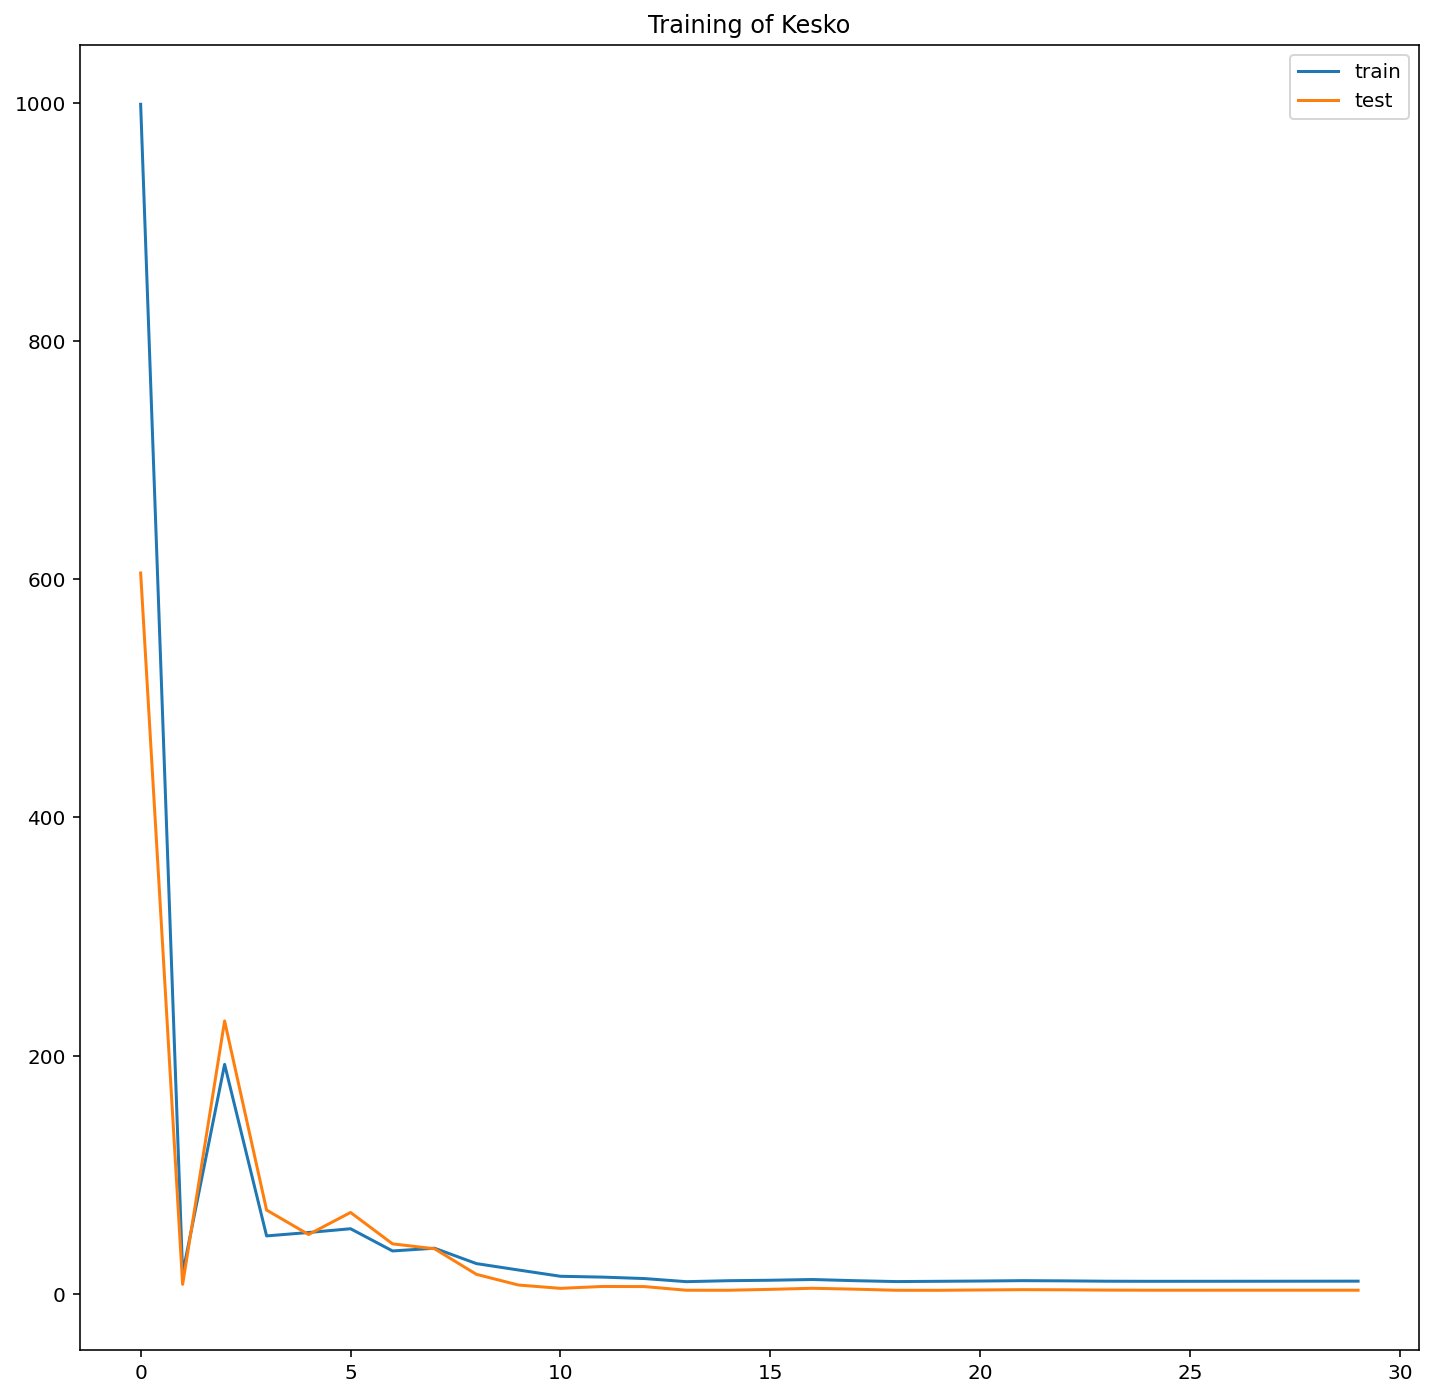

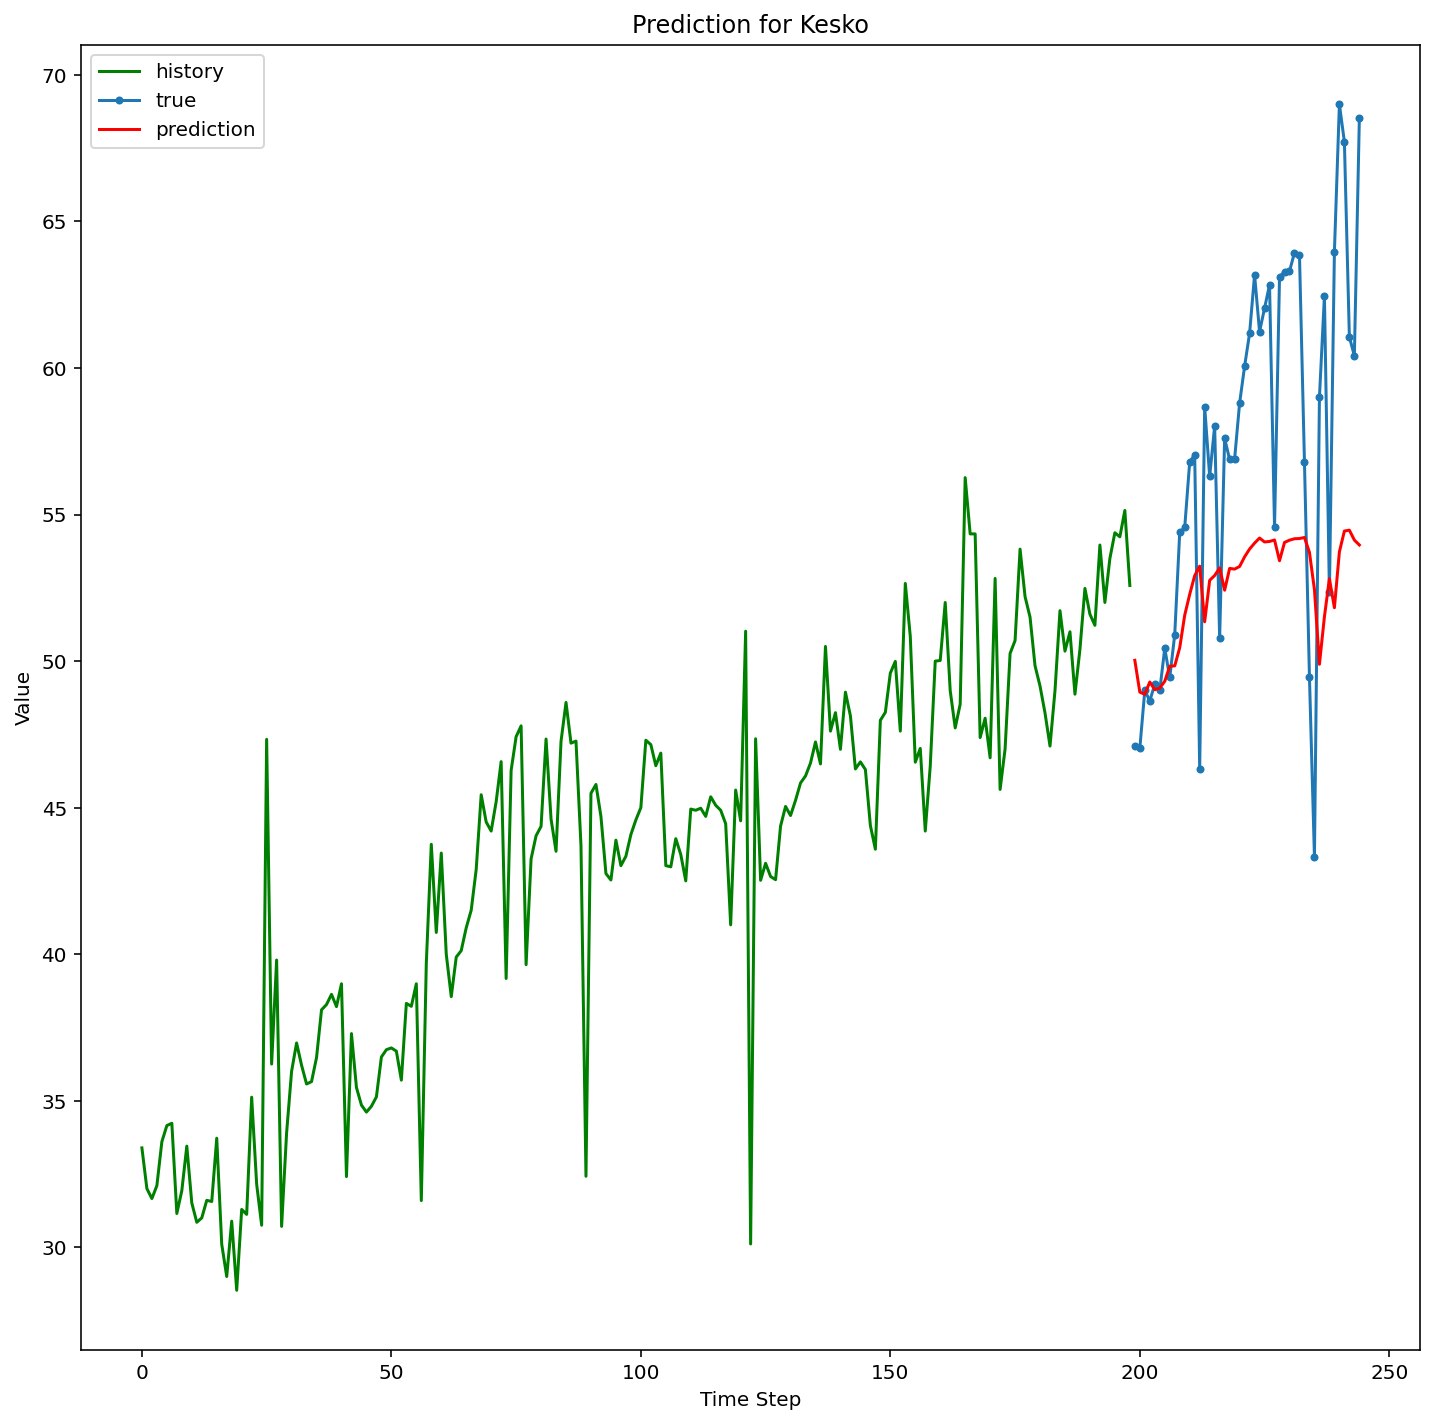

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 11ms/sample - loss: 1146.9973 - val_loss: 540.4595
Epoch 2/30
179/179 [==============================] - 0s 551us/sample - loss: 93.4980 - val_loss: 94.6782
Epoch 3/30
179/179 [==============================] - 0s 508us/sample - loss: 86.9969 - val_loss: 81.3111
Epoch 4/30
179/179 [==============================] - 0s 543us/sample - loss: 23.9252 - val_loss: 13.4416
Epoch 5/30
179/179 [==============================] - 0s 533us/sample - loss: 13.9624 - val_loss: 12.5256
Epoch 6/30
179/179 [==============================] - 0s 529us/sample - loss: 16.6026 - val_loss: 20.6469
Epoch 7/30
179/179 [==============================] - 0s 475us/sample - loss: 10.0136 - val_loss: 12.5952
Epoch 8/30
179/179 [==============================] - 0s 477us/sample - loss: 13.8414 - val_loss: 15.5852
Epoch 9/30
179/179 [==============================] - 0s 576us/sample - loss: 11.6585 

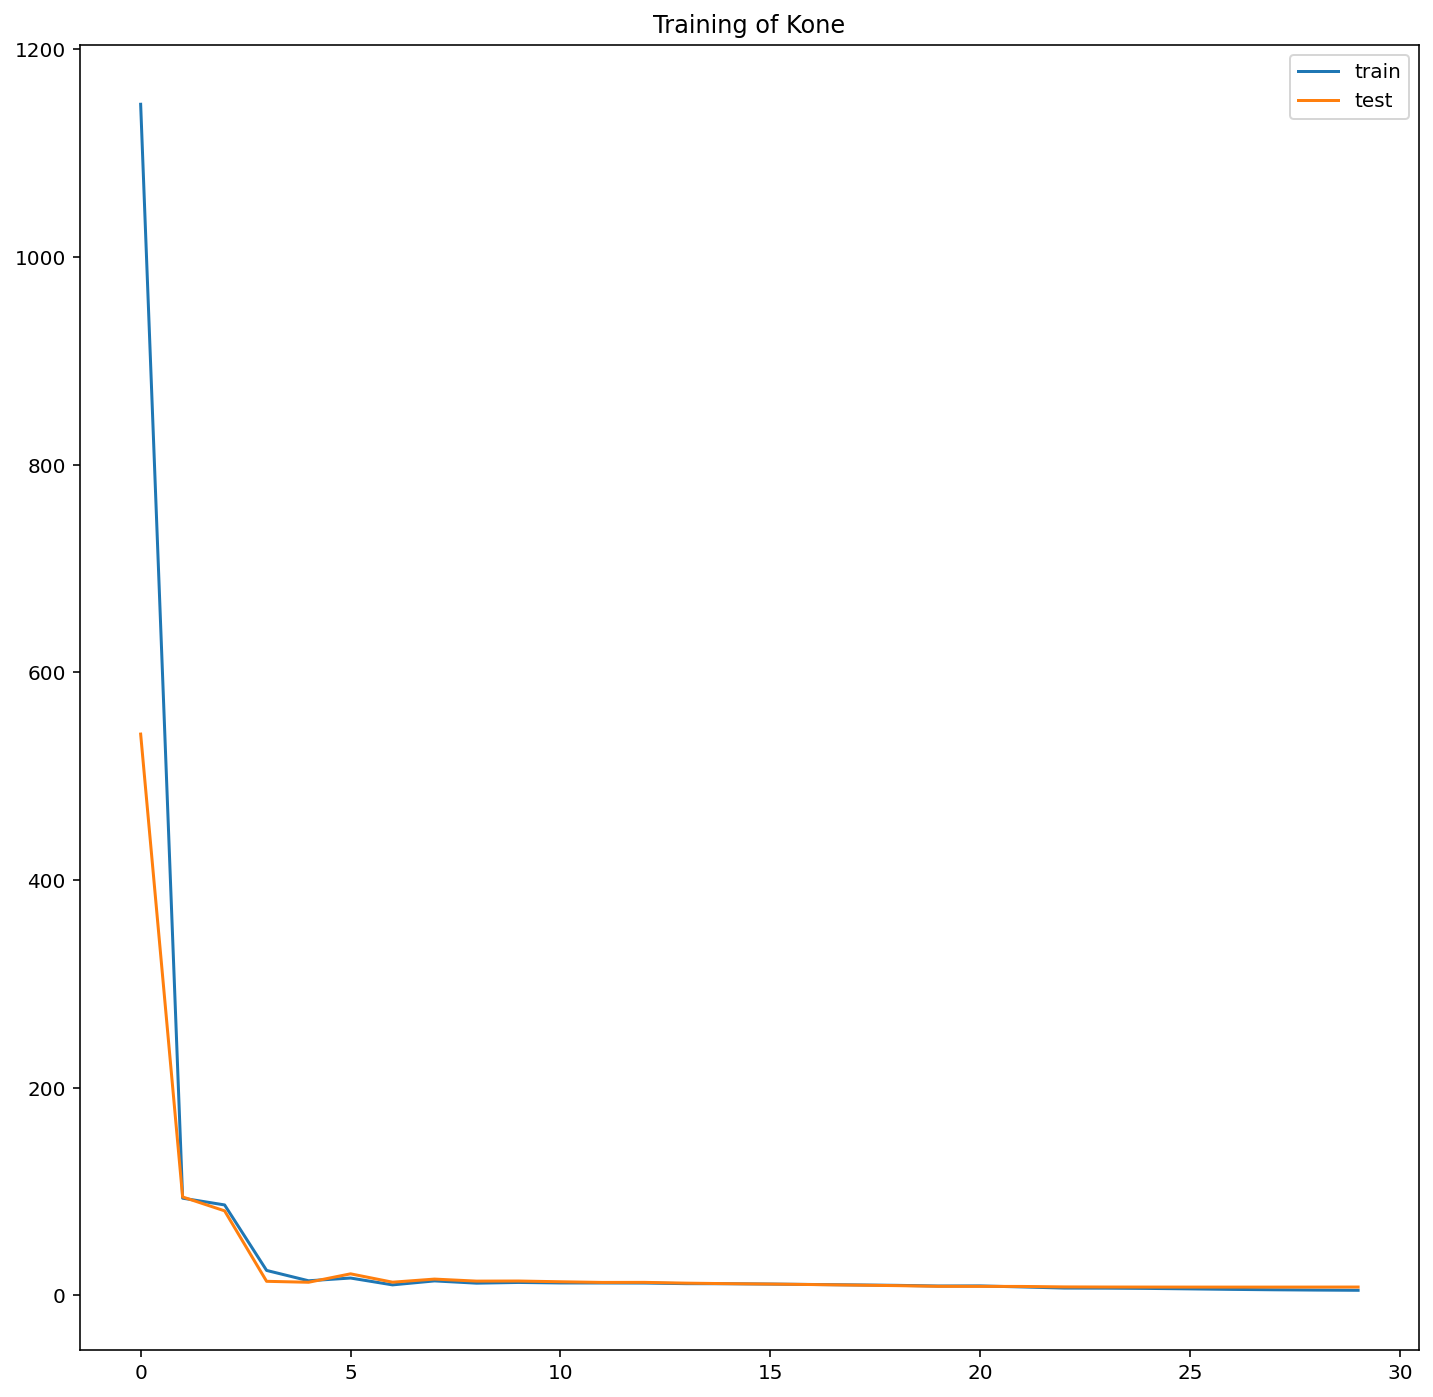

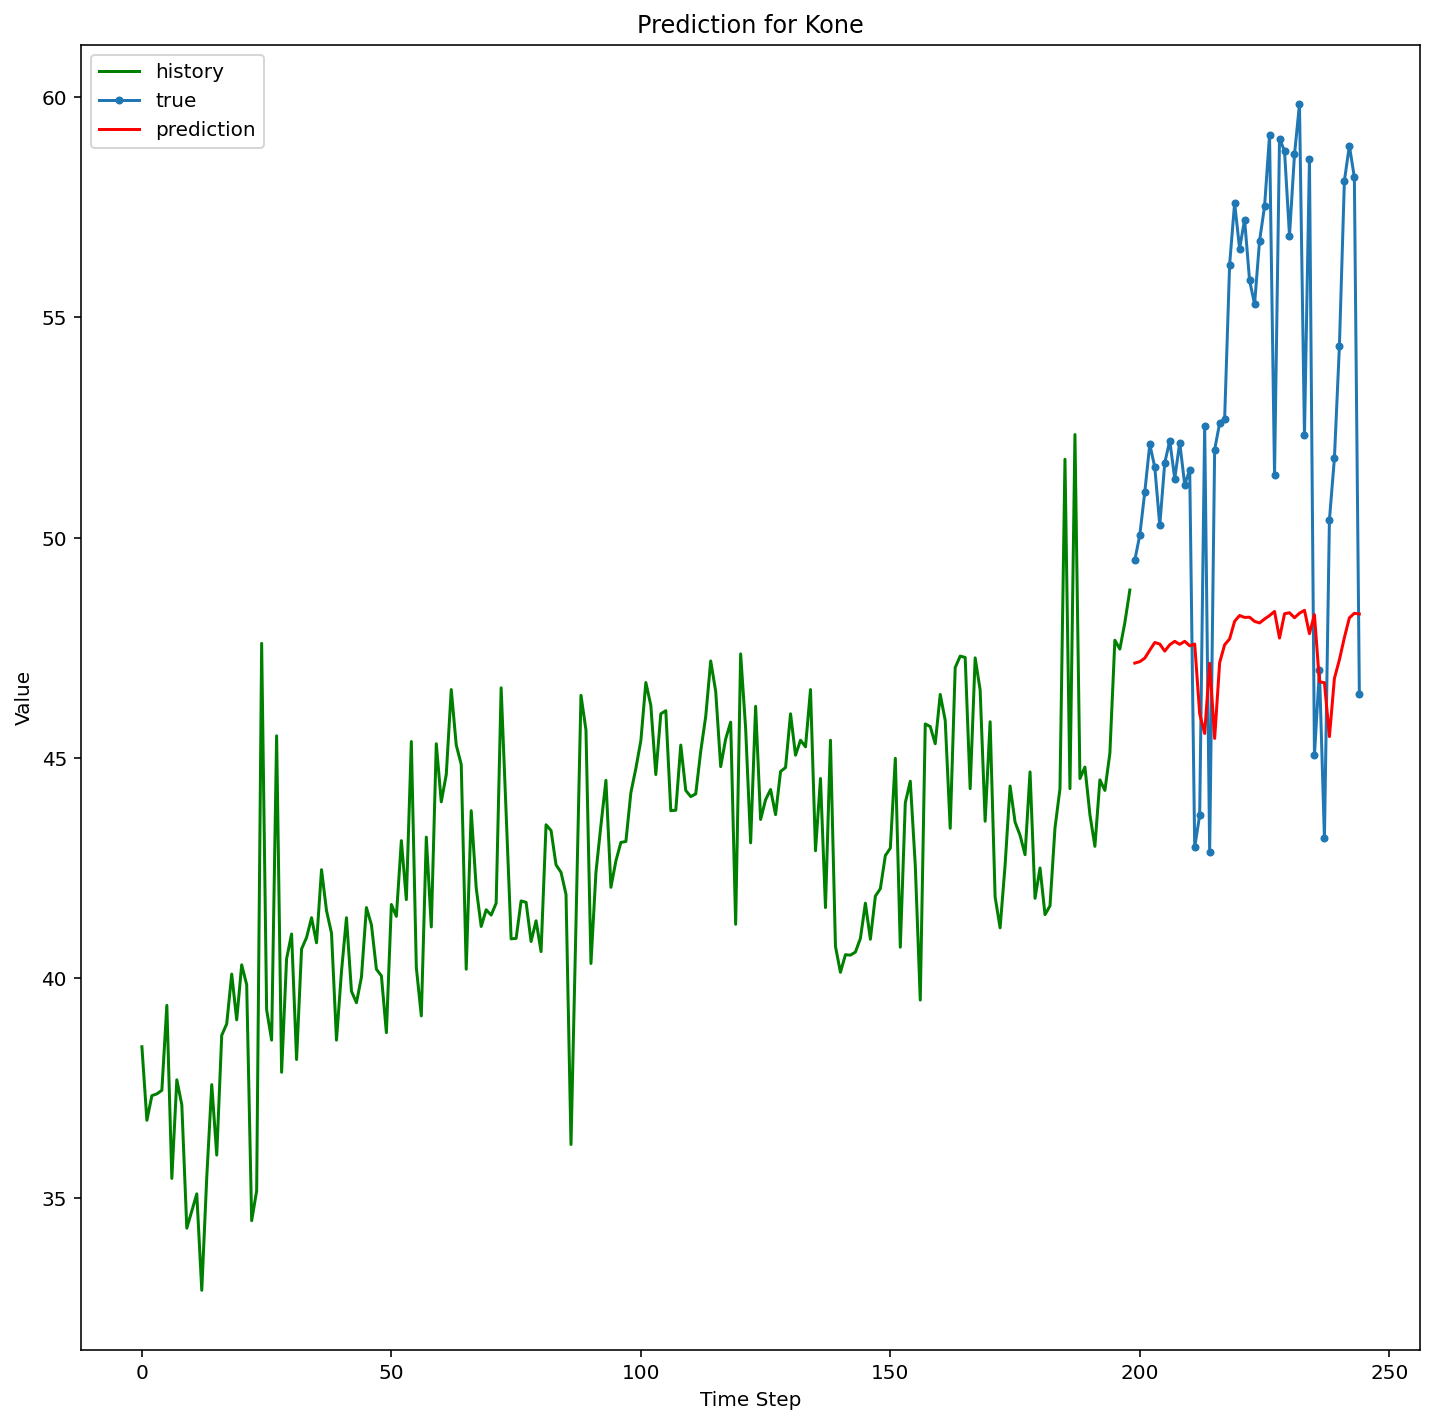

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 10ms/sample - loss: 9.5163 - val_loss: 5.5328
Epoch 2/30
179/179 [==============================] - 0s 493us/sample - loss: 3.5440 - val_loss: 1.5029
Epoch 3/30
179/179 [==============================] - 0s 477us/sample - loss: 0.5826 - val_loss: 2.2018
Epoch 4/30
179/179 [==============================] - 0s 482us/sample - loss: 1.4934 - val_loss: 1.1713
Epoch 5/30
179/179 [==============================] - 0s 517us/sample - loss: 0.6750 - val_loss: 1.5351
Epoch 6/30
179/179 [==============================] - 0s 540us/sample - loss: 0.9428 - val_loss: 1.3000
Epoch 7/30
179/179 [==============================] - 0s 526us/sample - loss: 0.6948 - val_loss: 1.3837
Epoch 8/30
179/179 [==============================] - 0s 515us/sample - loss: 0.6799 - val_loss: 1.3821
Epoch 9/30
179/179 [==============================] - 0s 481us/sample - loss: 0.6153 - val_loss: 1.3752
E

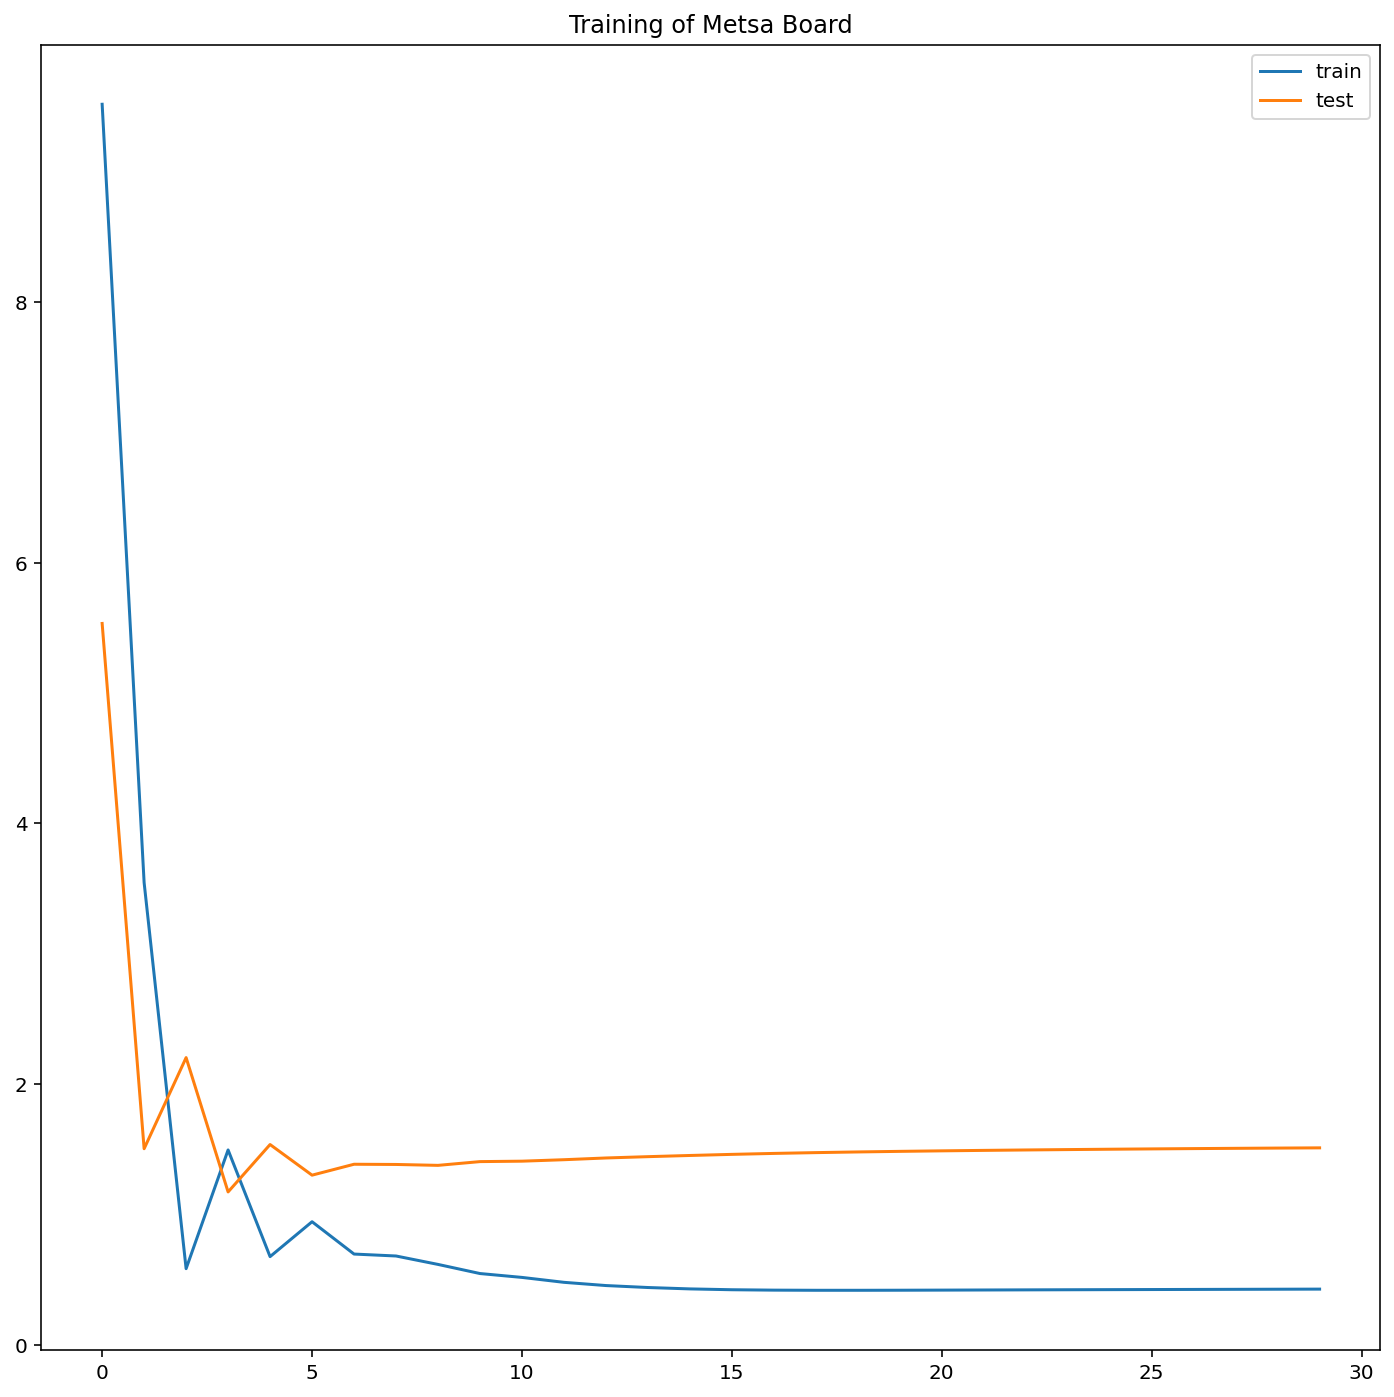

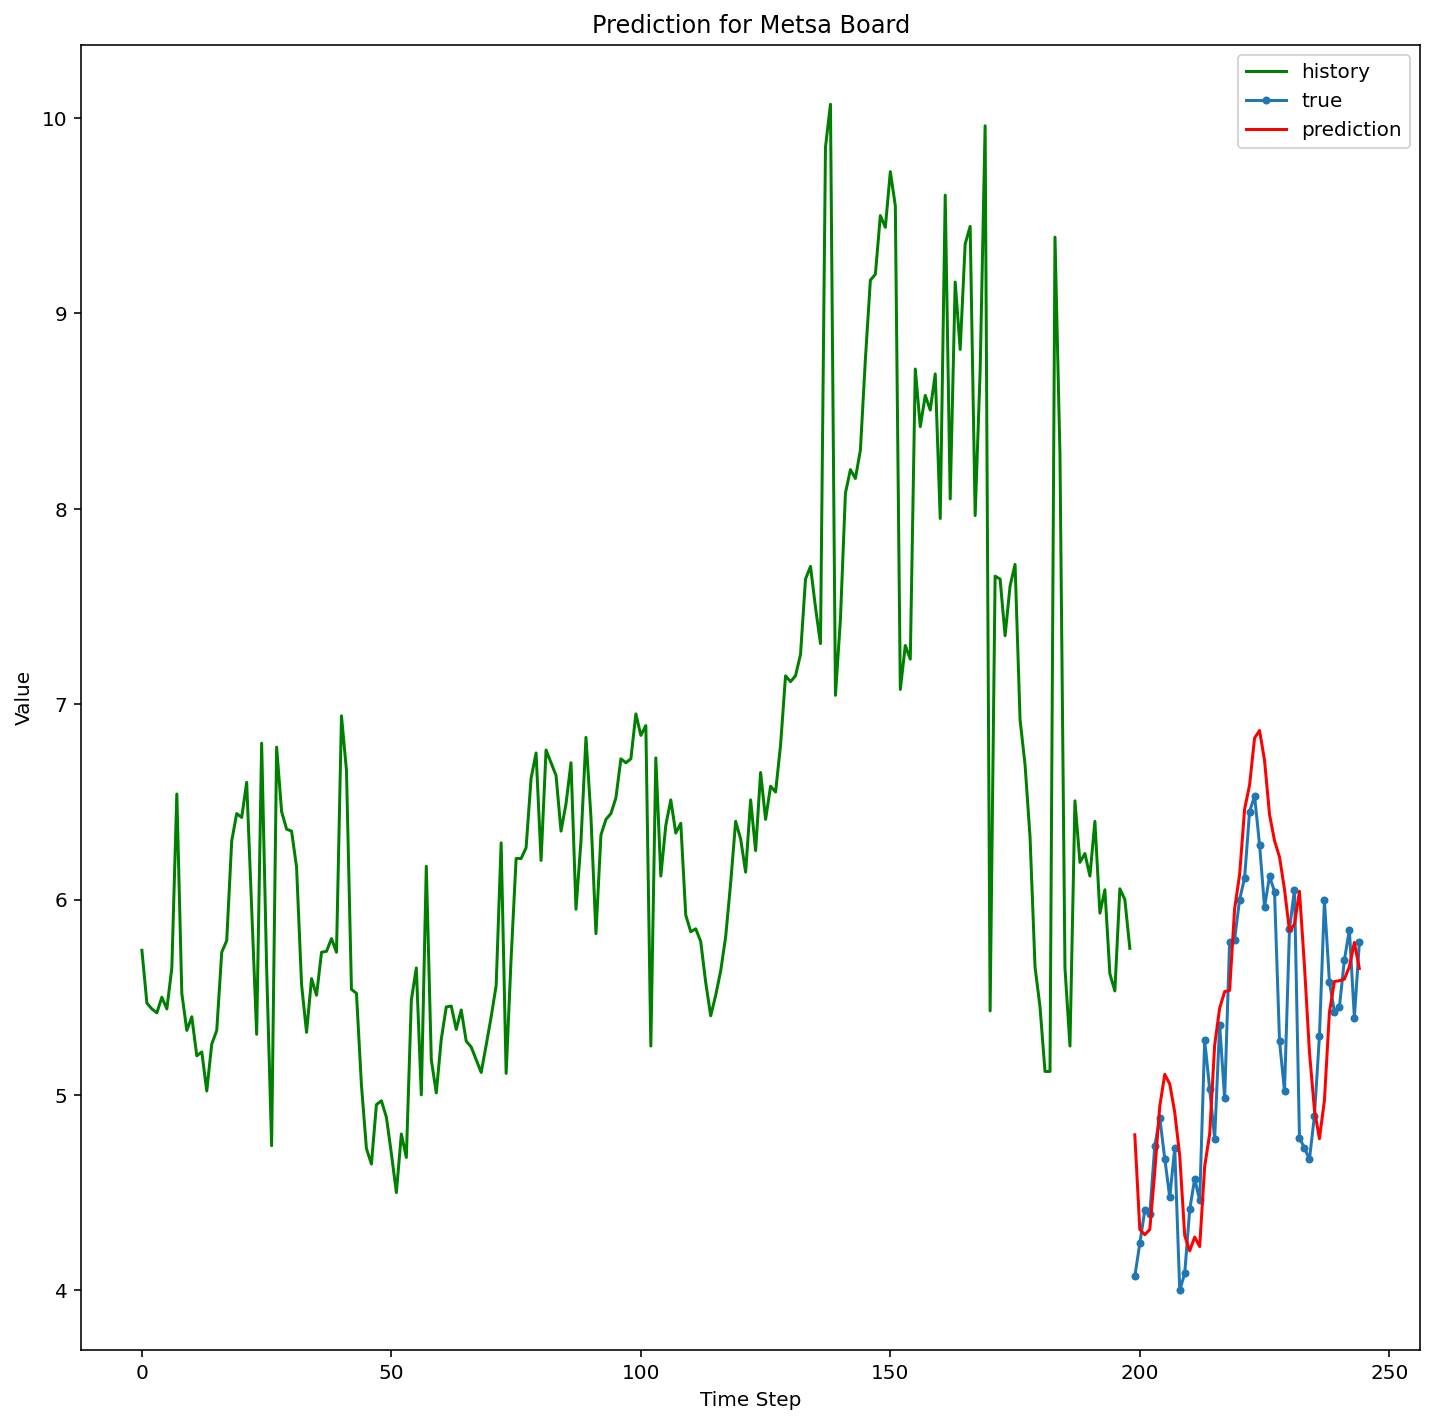

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 9ms/sample - loss: 447.3023 - val_loss: 175.0103
Epoch 2/30
179/179 [==============================] - 0s 487us/sample - loss: 18.7988 - val_loss: 32.3128
Epoch 3/30
179/179 [==============================] - 0s 459us/sample - loss: 67.4792 - val_loss: 66.8522
Epoch 4/30
179/179 [==============================] - 0s 484us/sample - loss: 13.9590 - val_loss: 14.2693
Epoch 5/30
179/179 [==============================] - 0s 510us/sample - loss: 28.2128 - val_loss: 21.5208
Epoch 6/30
179/179 [==============================] - 0s 439us/sample - loss: 16.4034 - val_loss: 15.1845
Epoch 7/30
179/179 [==============================] - 0s 470us/sample - loss: 15.1168 - val_loss: 13.7888
Epoch 8/30
179/179 [==============================] - 0s 457us/sample - loss: 13.5611 - val_loss: 11.9110
Epoch 9/30
179/179 [==============================] - 0s 544us/sample - loss: 11.3345 - 

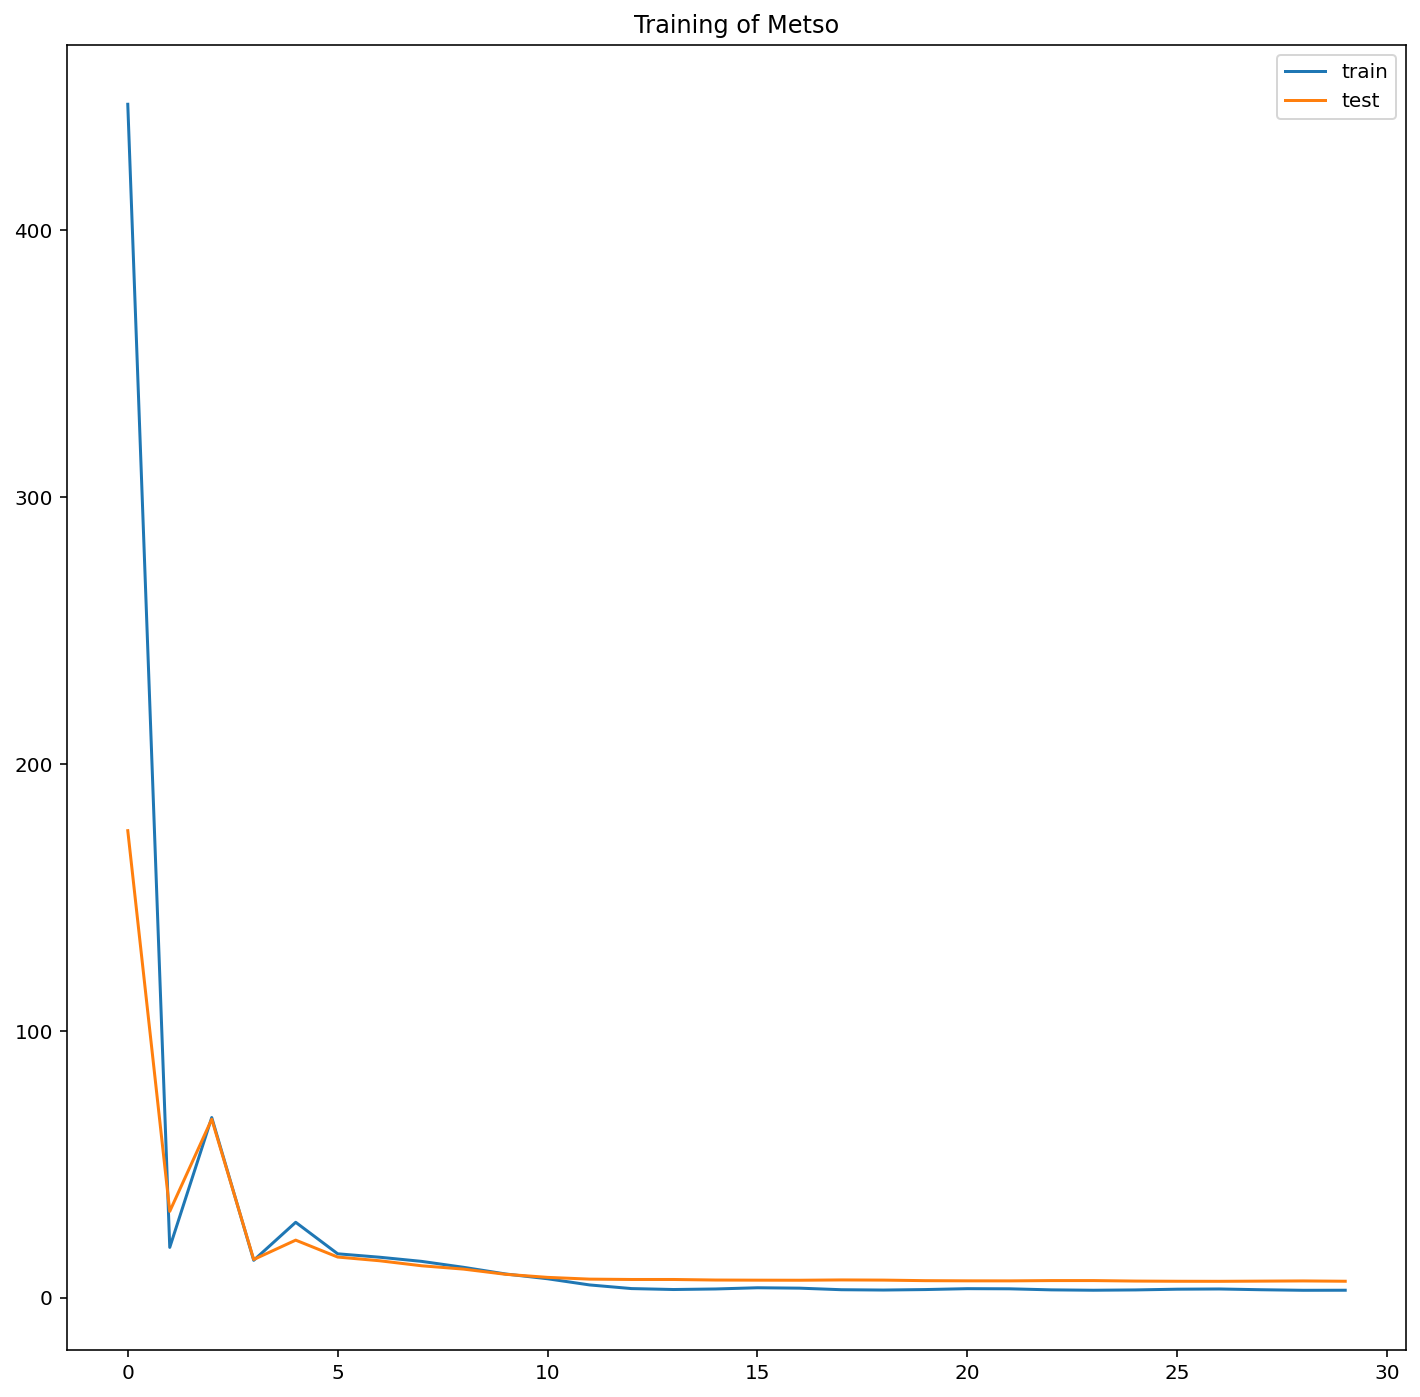

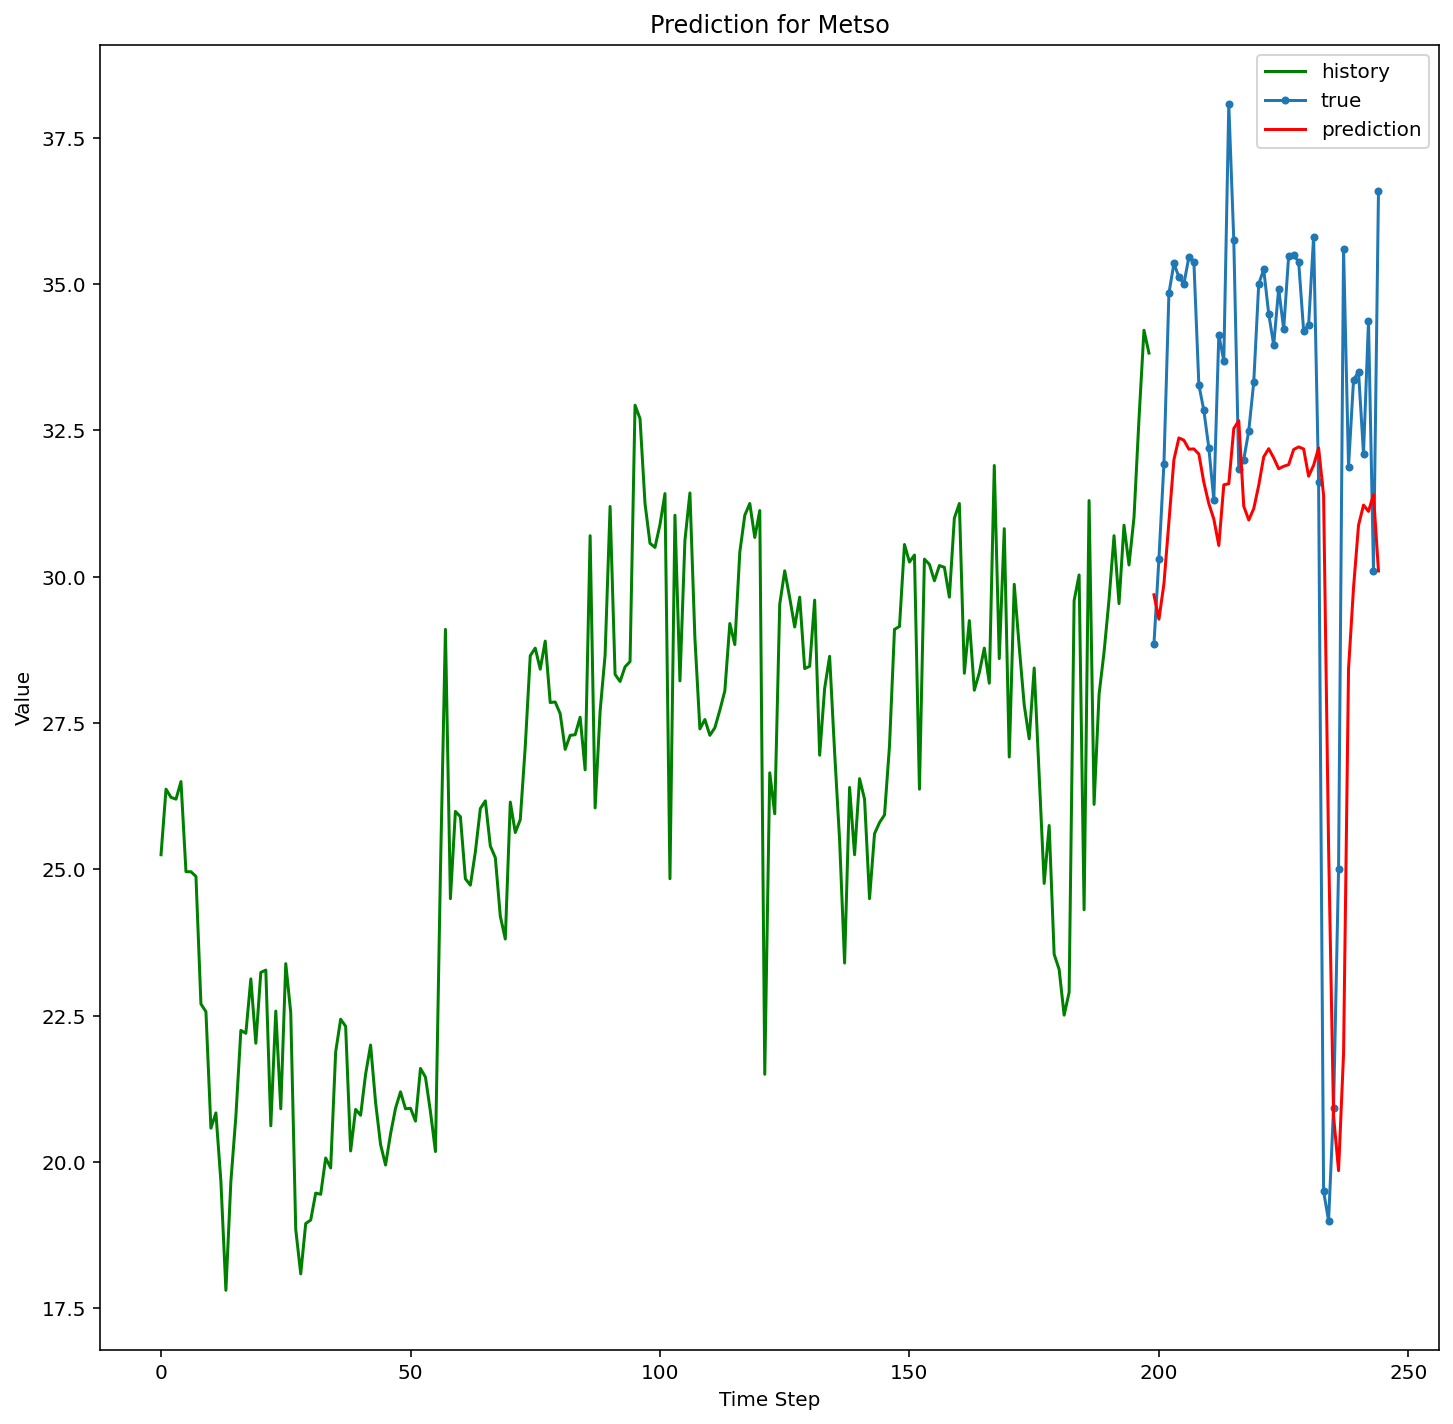

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 10ms/sample - loss: 28.8821 - val_loss: 15.7453
Epoch 2/30
179/179 [==============================] - 0s 496us/sample - loss: 2.9875 - val_loss: 0.1332
Epoch 3/30
179/179 [==============================] - 0s 491us/sample - loss: 2.4181 - val_loss: 4.3078
Epoch 4/30
179/179 [==============================] - 0s 521us/sample - loss: 1.1493 - val_loss: 0.8315
Epoch 5/30
179/179 [==============================] - 0s 523us/sample - loss: 1.3104 - val_loss: 2.0024
Epoch 6/30
179/179 [==============================] - 0s 520us/sample - loss: 1.0196 - val_loss: 1.1100
Epoch 7/30
179/179 [==============================] - 0s 460us/sample - loss: 1.0512 - val_loss: 1.2872
Epoch 8/30
179/179 [==============================] - 0s 487us/sample - loss: 0.9499 - val_loss: 0.9262
Epoch 9/30
179/179 [==============================] - 0s 454us/sample - loss: 0.9011 - val_loss: 0.8075

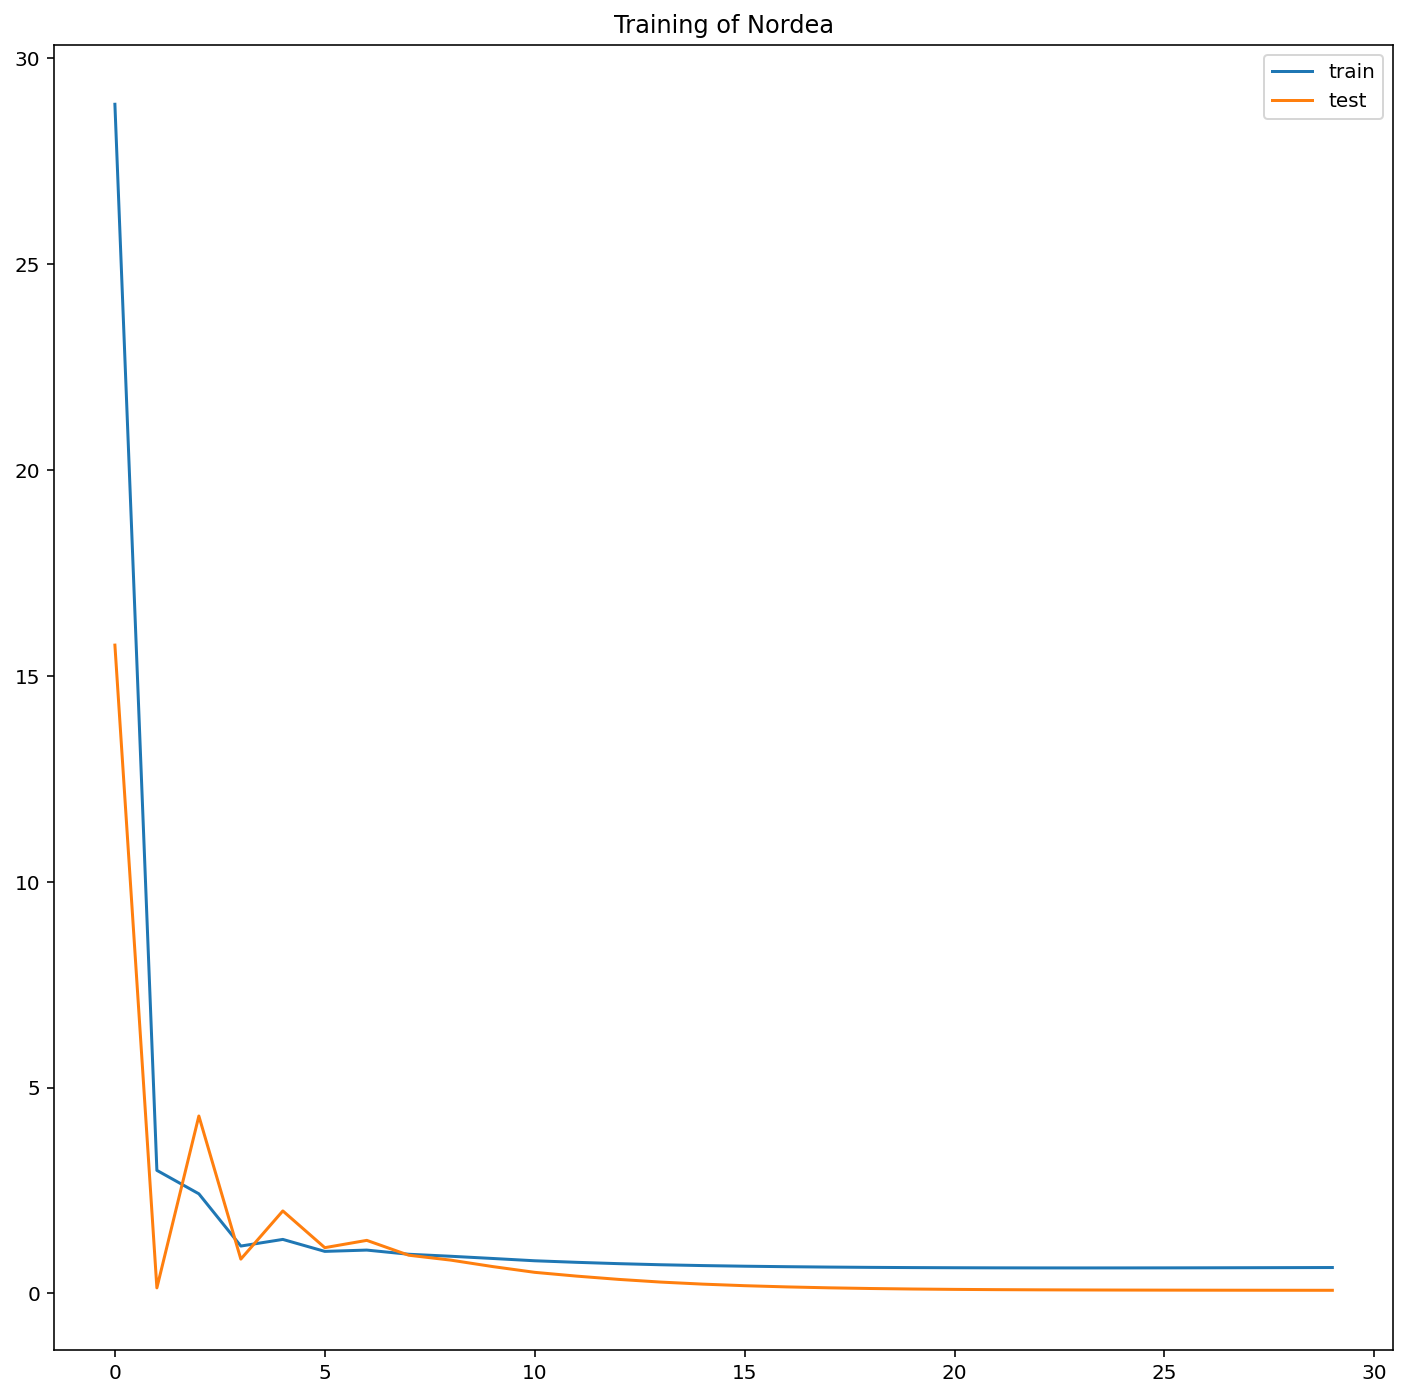

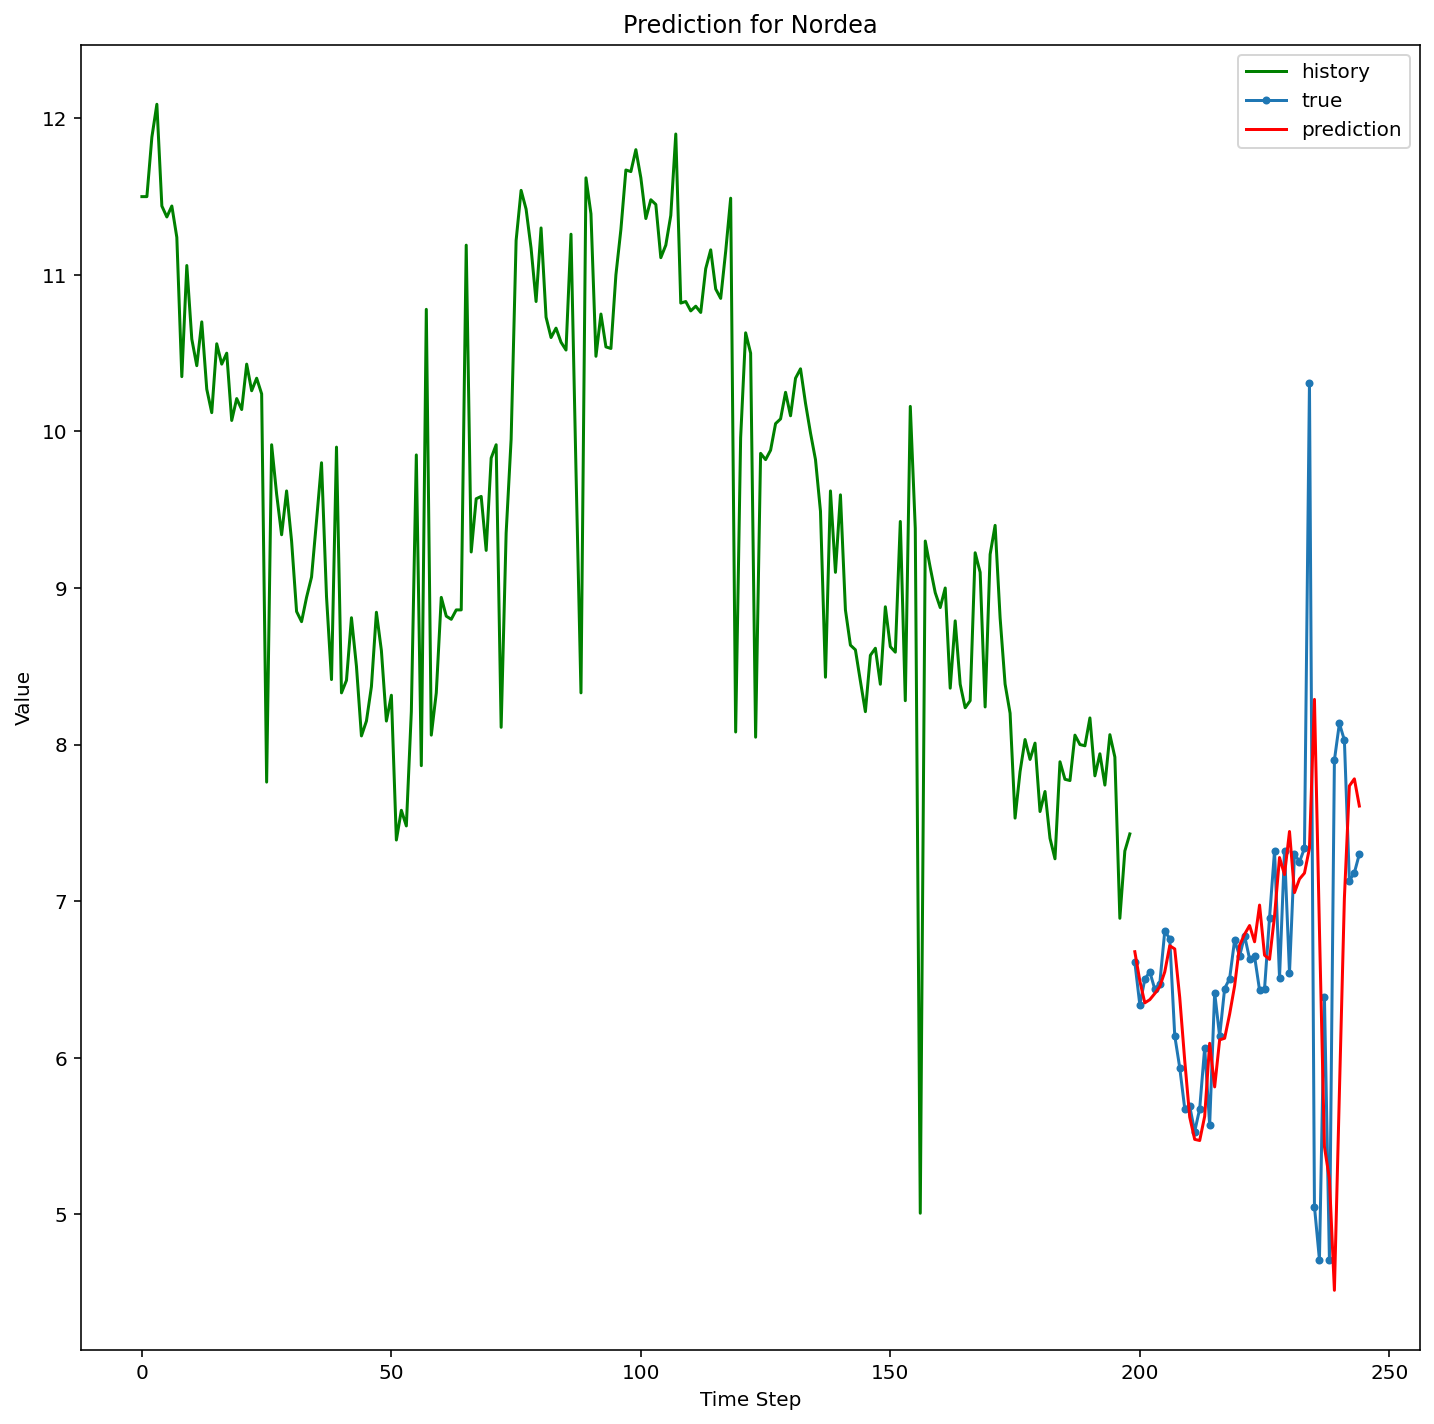

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 9ms/sample - loss: 58.0986 - val_loss: 78.0514
Epoch 2/30
179/179 [==============================] - 0s 523us/sample - loss: 67.1531 - val_loss: 170.6400
Epoch 3/30
179/179 [==============================] - 0s 498us/sample - loss: 18.6651 - val_loss: 122.3631
Epoch 4/30
179/179 [==============================] - 0s 490us/sample - loss: 8.9550 - val_loss: 55.6098
Epoch 5/30
179/179 [==============================] - 0s 521us/sample - loss: 7.2509 - val_loss: 40.7655
Epoch 6/30
179/179 [==============================] - 0s 462us/sample - loss: 3.4668 - val_loss: 22.6775
Epoch 7/30
179/179 [==============================] - 0s 475us/sample - loss: 3.5203 - val_loss: 21.2816
Epoch 8/30
179/179 [==============================] - 0s 524us/sample - loss: 3.3279 - val_loss: 22.4496
Epoch 9/30
179/179 [==============================] - 0s 564us/sample - loss: 3.4022 - val_lo

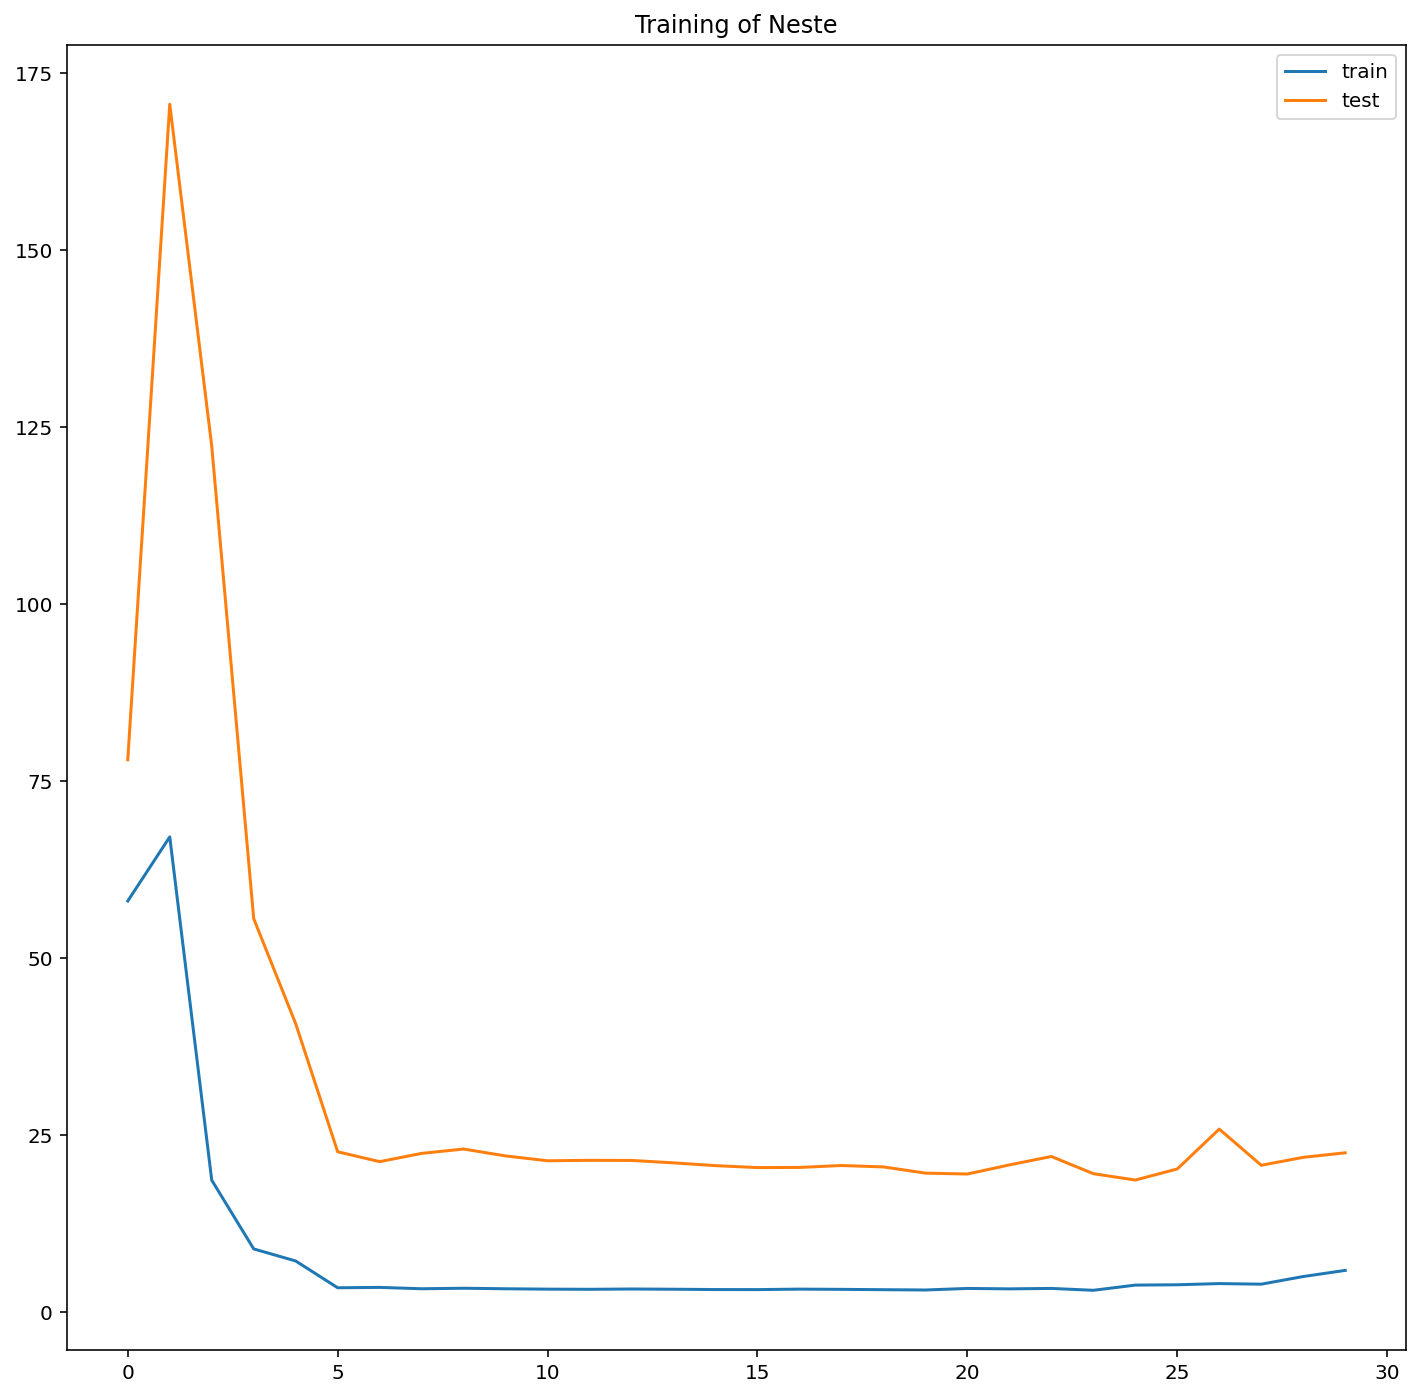

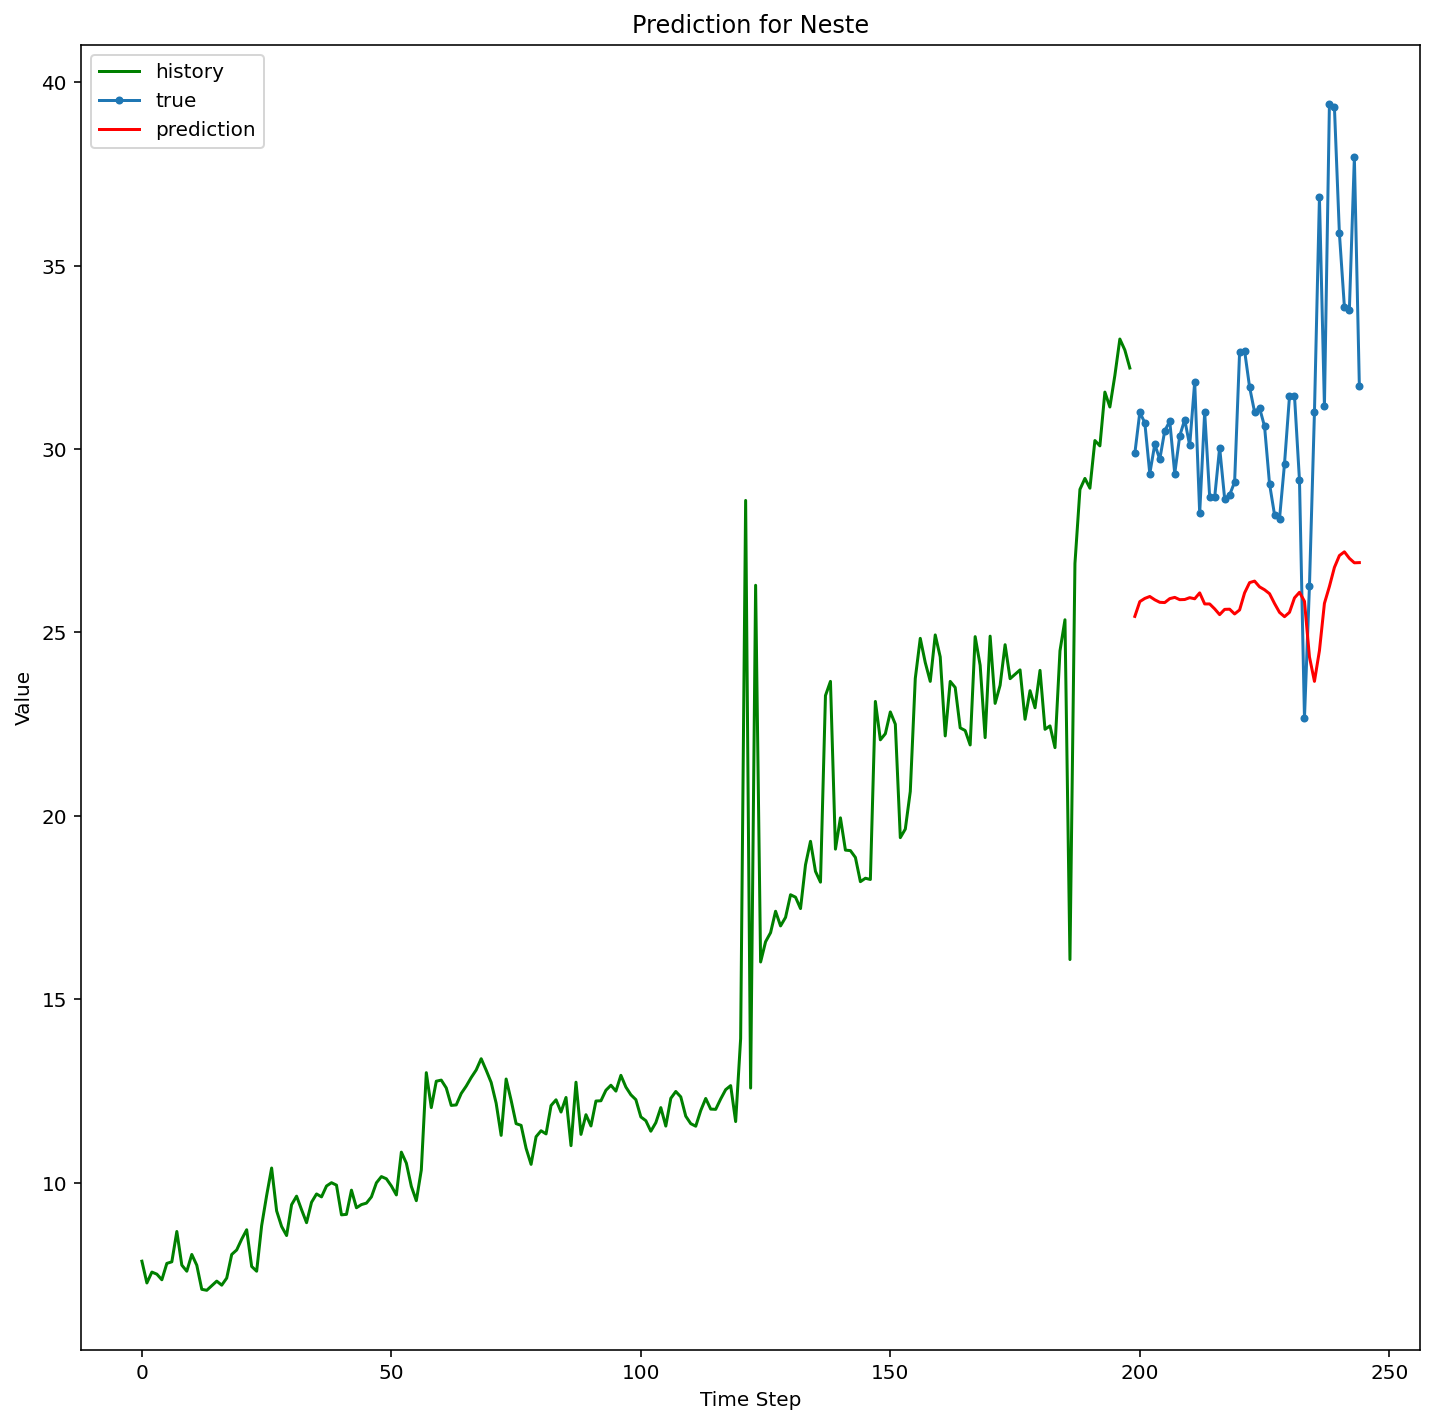

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 10ms/sample - loss: 10.0150 - val_loss: 0.7233
Epoch 2/30
179/179 [==============================] - 0s 480us/sample - loss: 0.6347 - val_loss: 0.8062
Epoch 3/30
179/179 [==============================] - 0s 464us/sample - loss: 0.7049 - val_loss: 0.2222
Epoch 4/30
179/179 [==============================] - 0s 502us/sample - loss: 0.2667 - val_loss: 0.2567
Epoch 5/30
179/179 [==============================] - 0s 526us/sample - loss: 0.3916 - val_loss: 0.1266
Epoch 6/30
179/179 [==============================] - 0s 505us/sample - loss: 0.2760 - val_loss: 0.1651
Epoch 7/30
179/179 [==============================] - 0s 458us/sample - loss: 0.3224 - val_loss: 0.1472
Epoch 8/30
179/179 [==============================] - 0s 584us/sample - loss: 0.2911 - val_loss: 0.1526
Epoch 9/30
179/179 [==============================] - 0s 501us/sample - loss: 0.2951 - val_loss: 0.1620


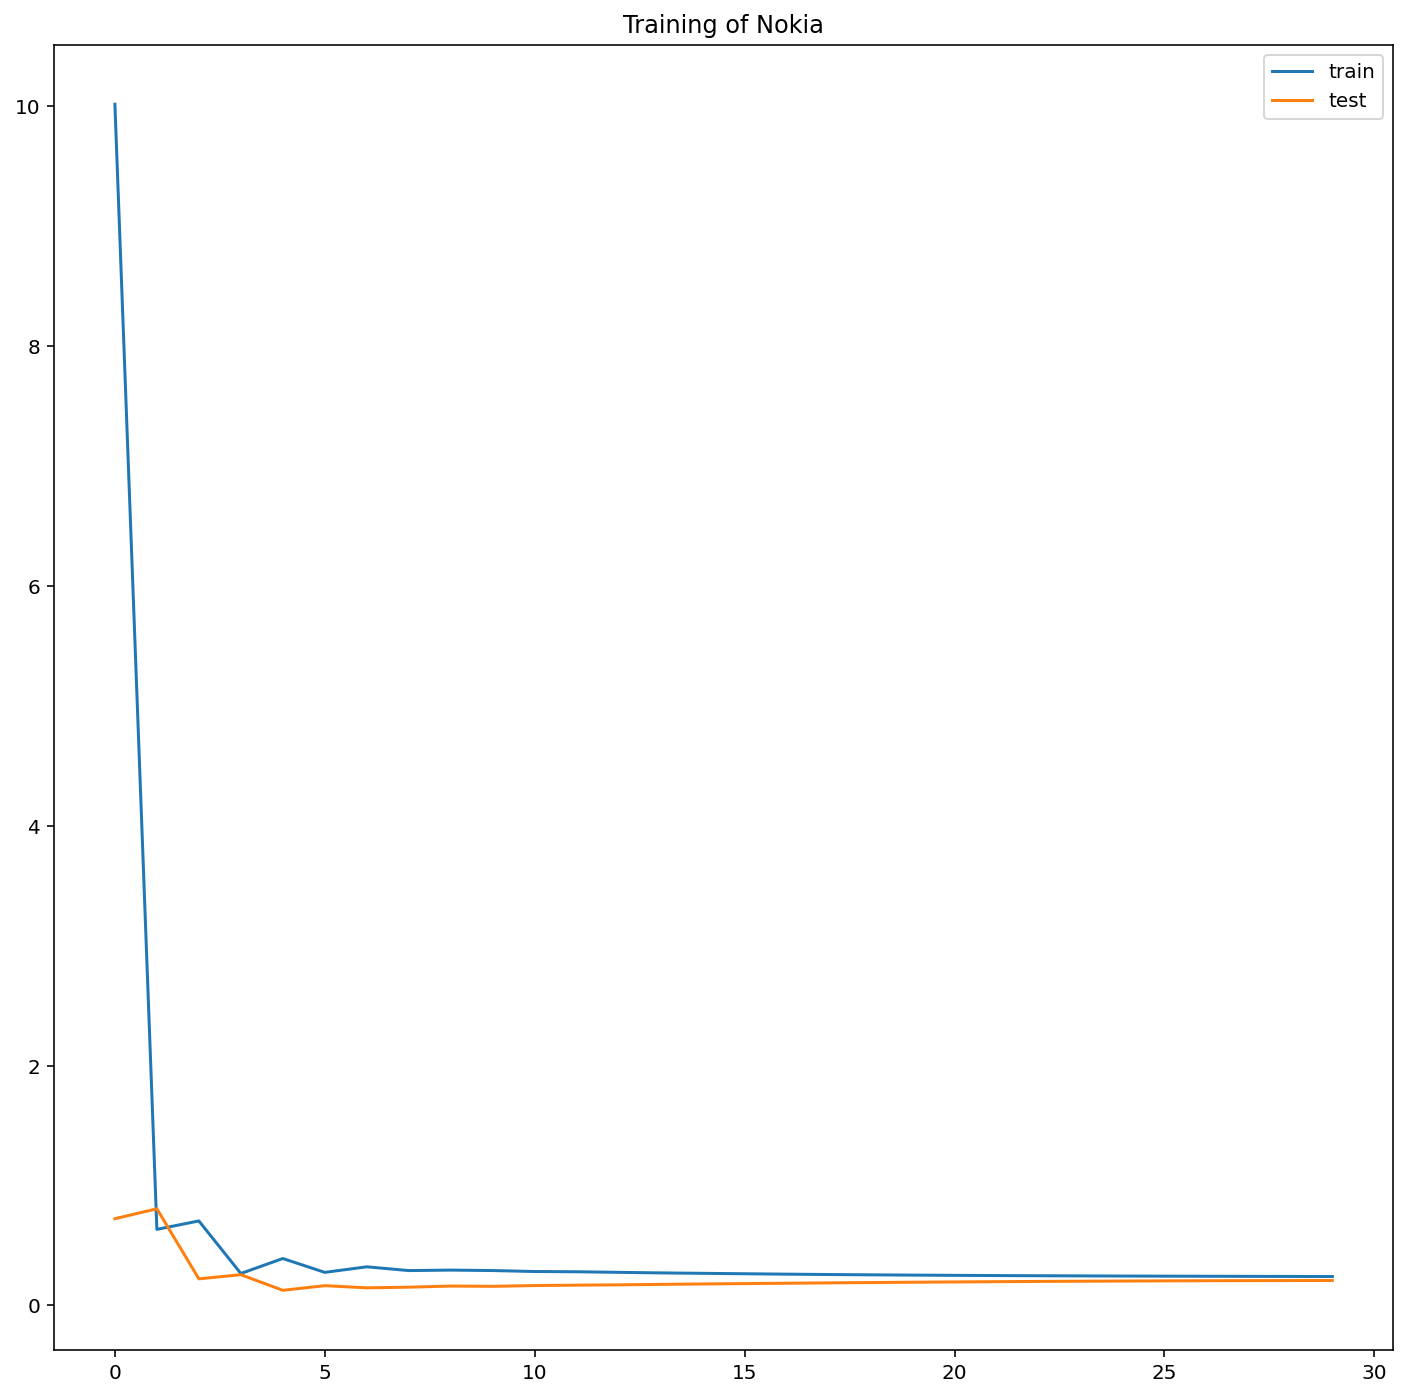

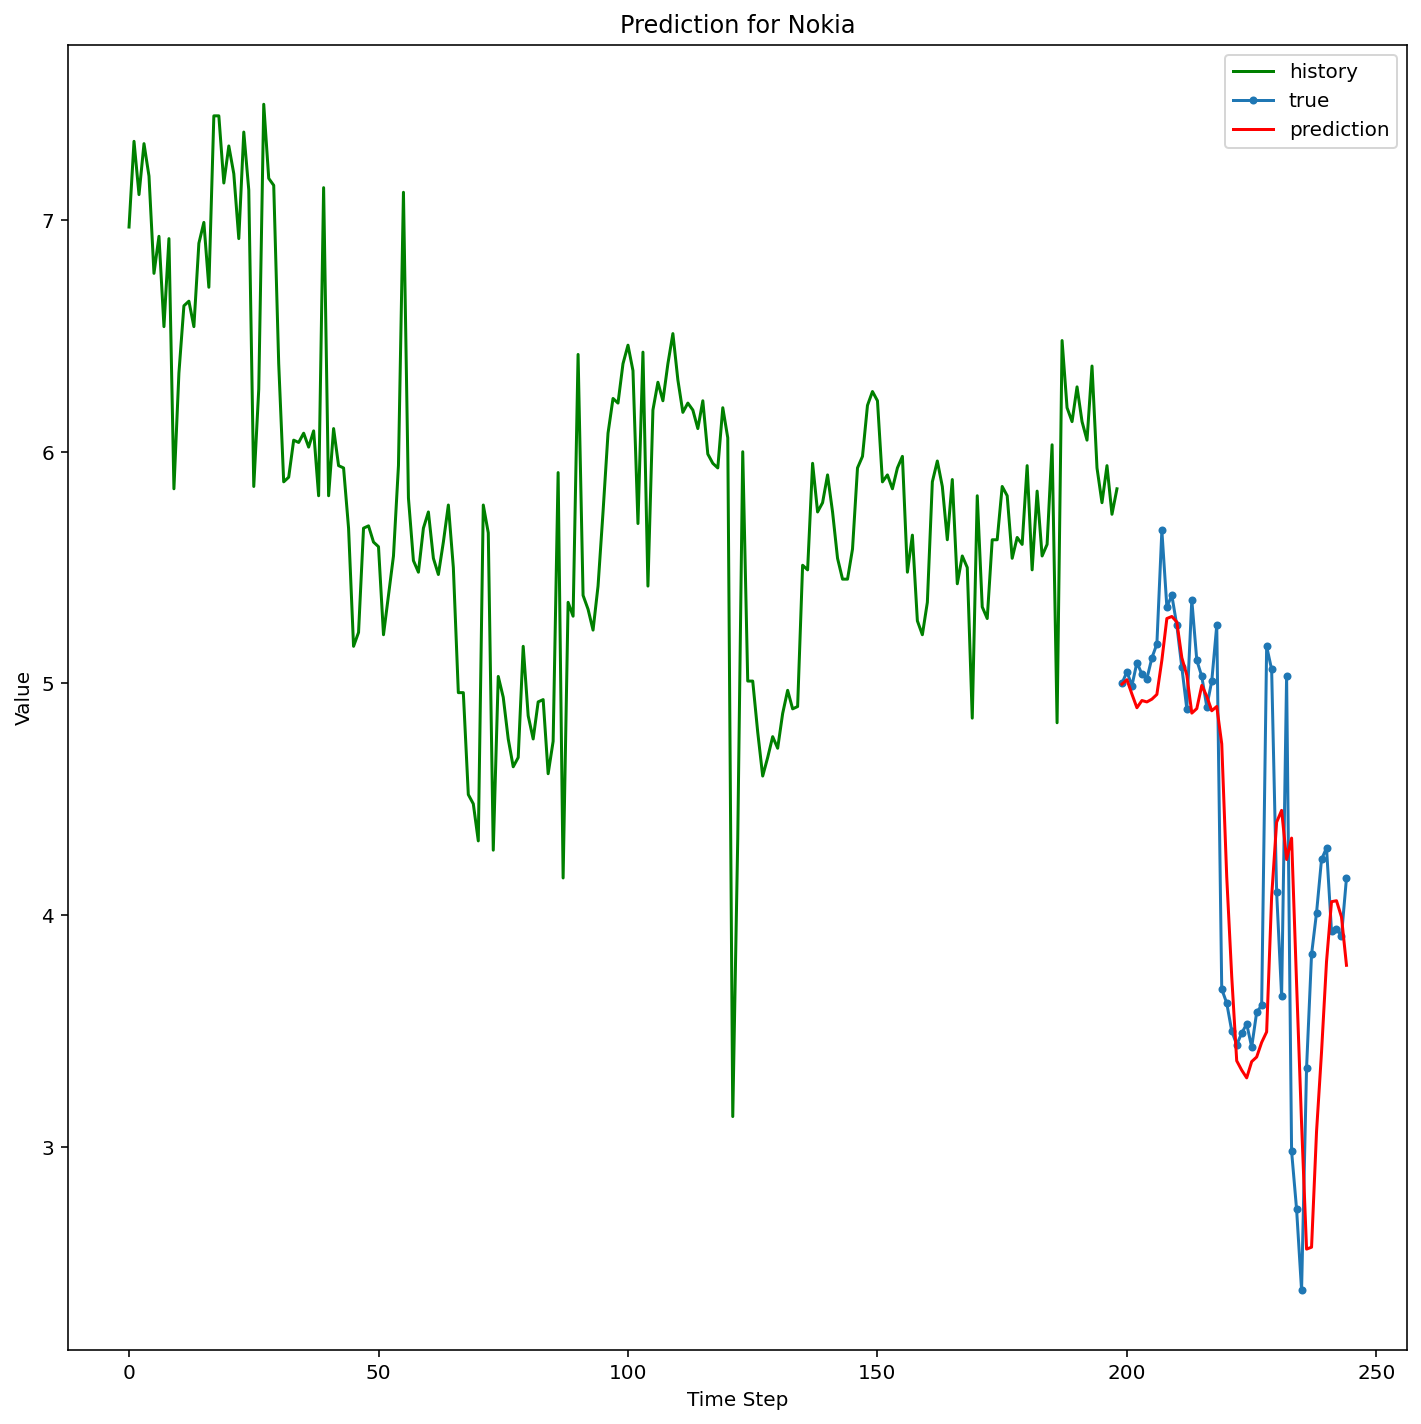

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 9ms/sample - loss: 1032.9573 - val_loss: 217.5339
Epoch 2/30
179/179 [==============================] - 0s 682us/sample - loss: 294.4744 - val_loss: 195.3984
Epoch 3/30
179/179 [==============================] - 0s 525us/sample - loss: 128.6041 - val_loss: 3.3097
Epoch 4/30
179/179 [==============================] - 0s 488us/sample - loss: 117.4355 - val_loss: 11.9982
Epoch 5/30
179/179 [==============================] - 0s 465us/sample - loss: 84.9160 - val_loss: 24.4368
Epoch 6/30
179/179 [==============================] - 0s 456us/sample - loss: 70.1253 - val_loss: 7.4957
Epoch 7/30
179/179 [==============================] - 0s 598us/sample - loss: 54.2396 - val_loss: 8.1110
Epoch 8/30
179/179 [==============================] - 0s 506us/sample - loss: 34.2668 - val_loss: 3.4636
Epoch 9/30
179/179 [==============================] - 0s 569us/sample - loss: 20.6006 -

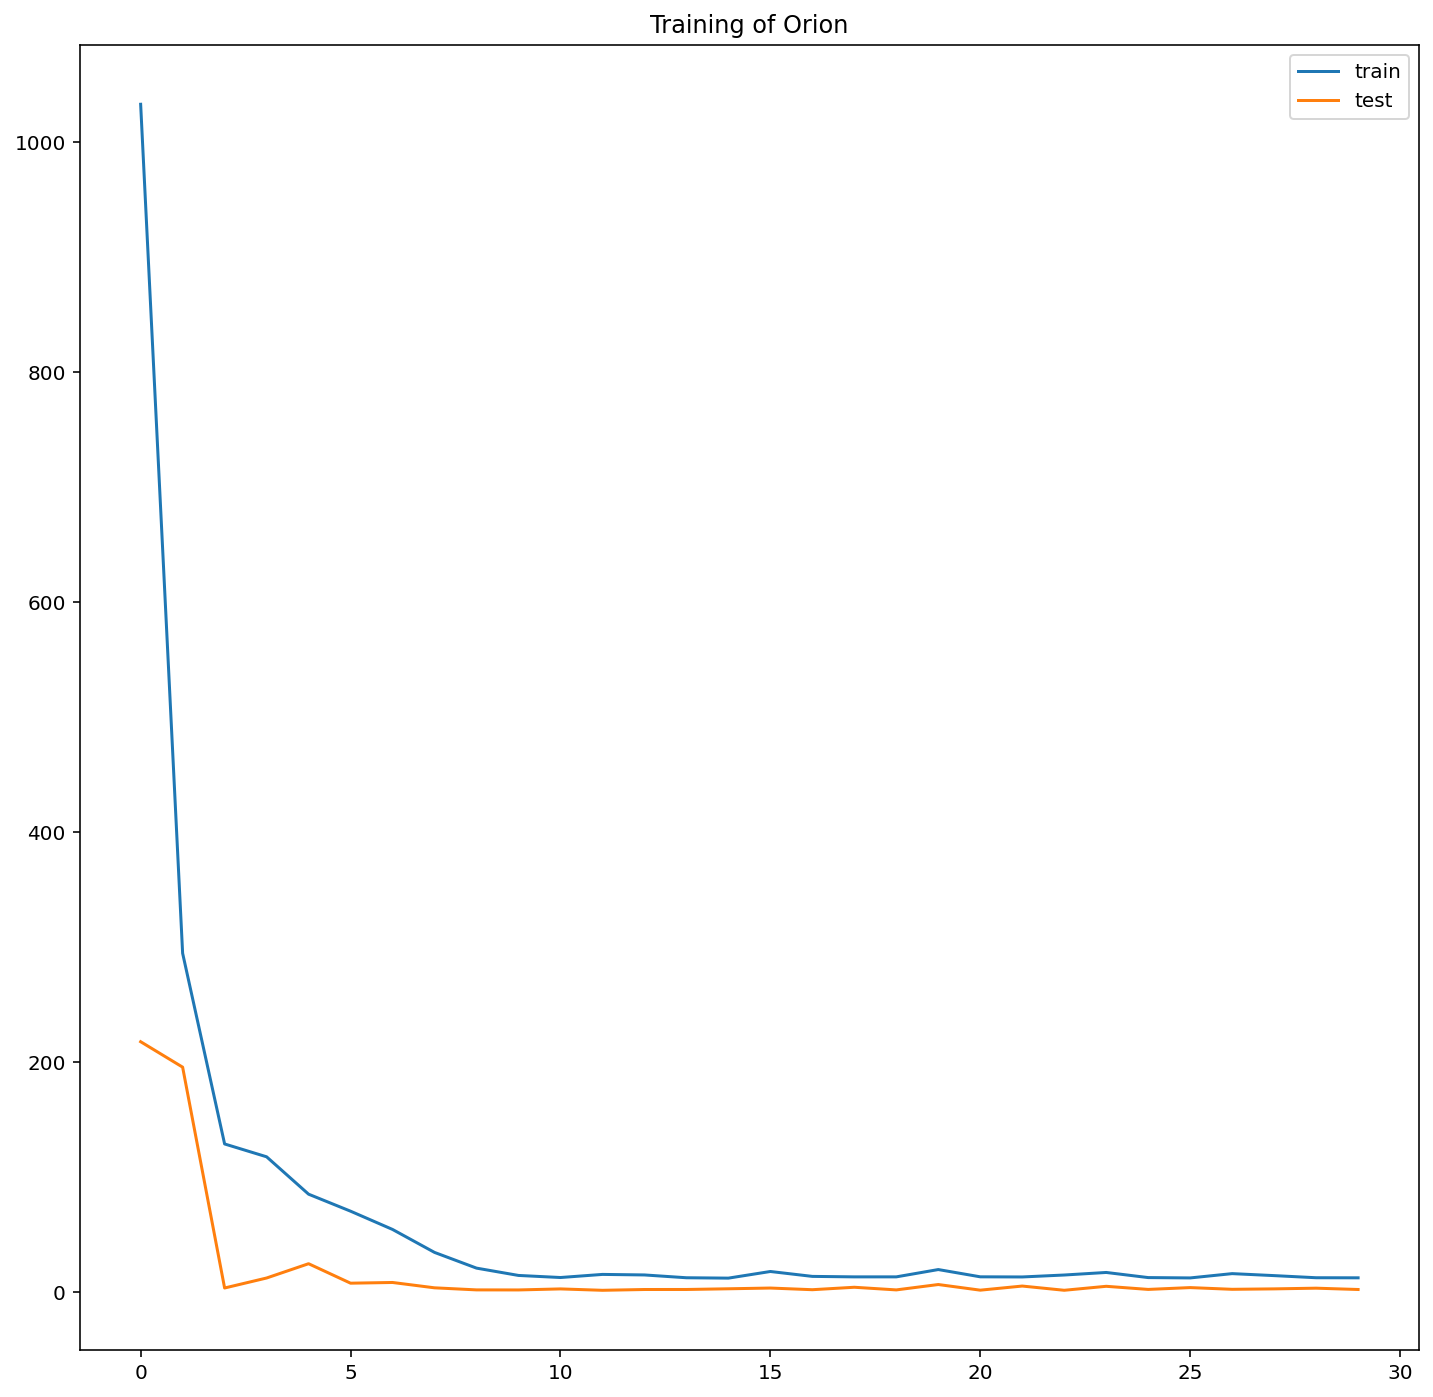

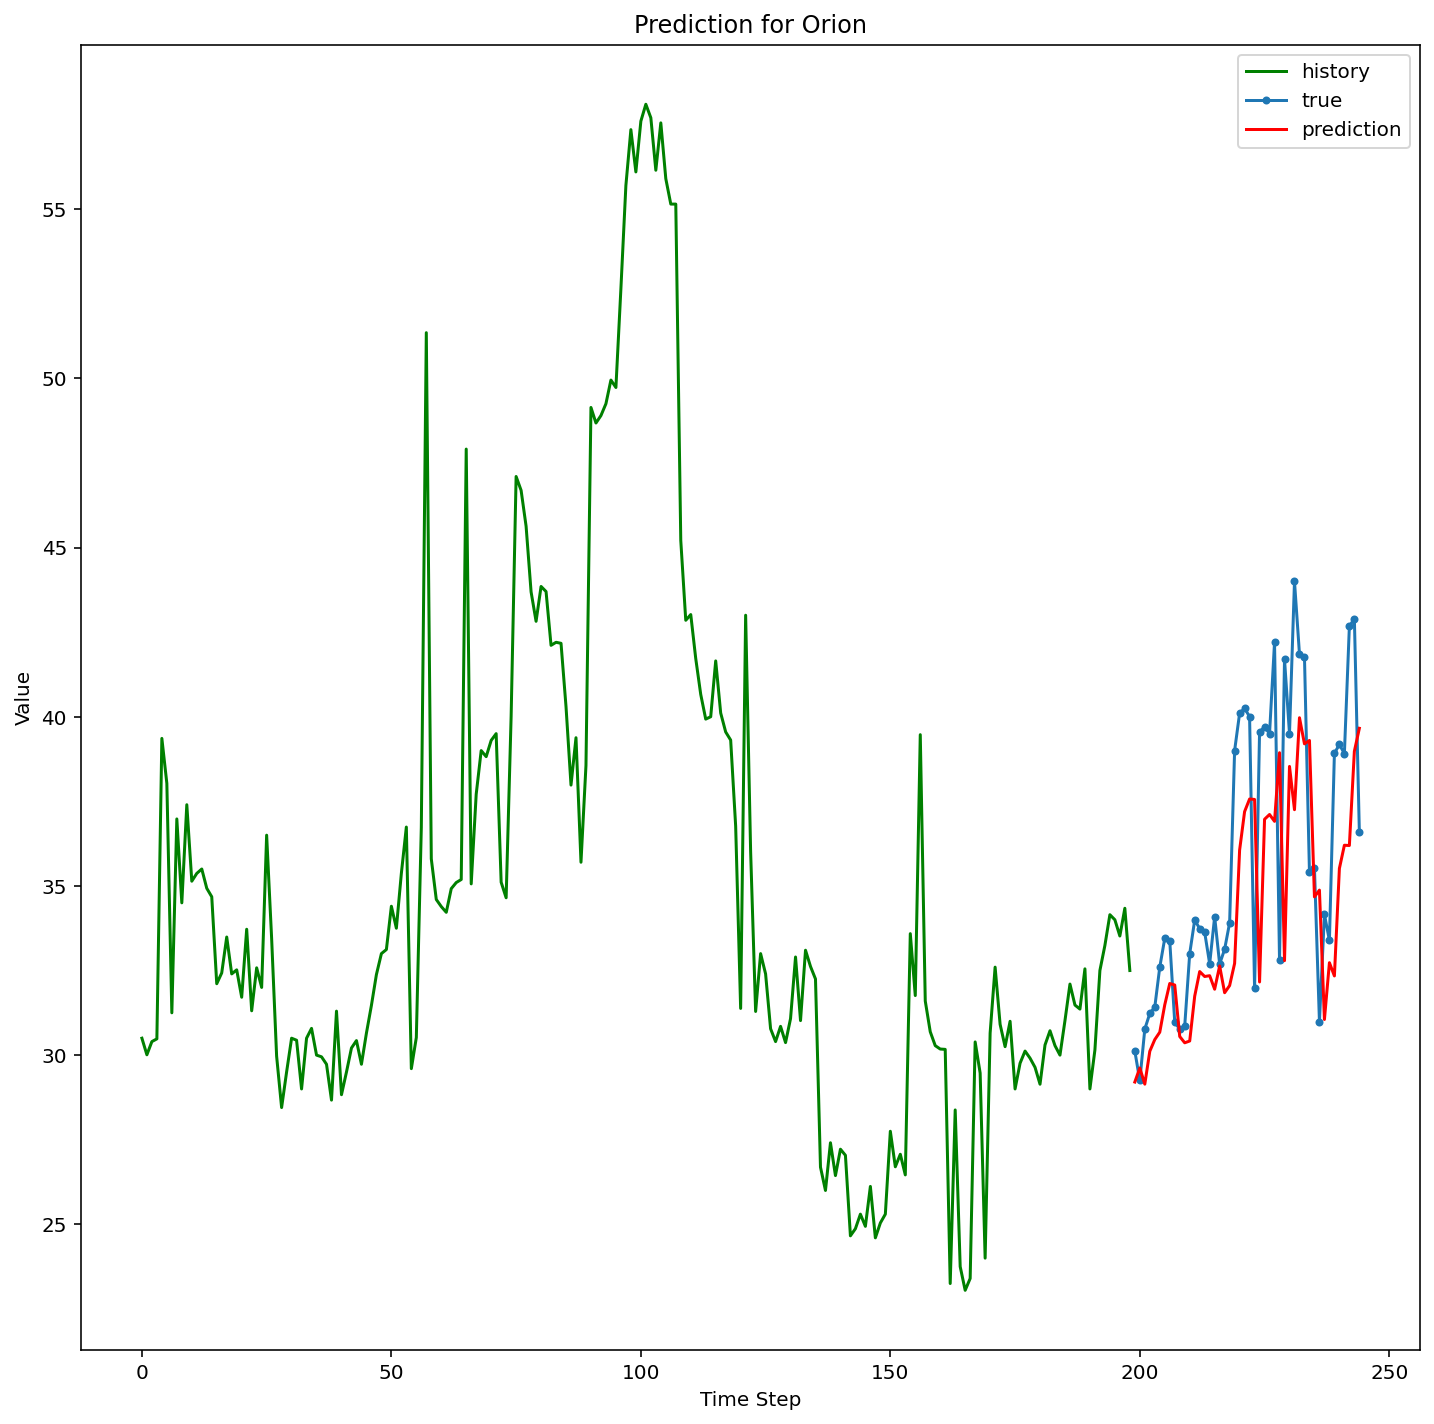

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 10ms/sample - loss: 4.2611 - val_loss: 1.8232
Epoch 2/30
179/179 [==============================] - 0s 530us/sample - loss: 3.0233 - val_loss: 1.4278
Epoch 3/30
179/179 [==============================] - 0s 513us/sample - loss: 1.0681 - val_loss: 1.4961
Epoch 4/30
179/179 [==============================] - 0s 491us/sample - loss: 1.1835 - val_loss: 1.4925
Epoch 5/30
179/179 [==============================] - 0s 542us/sample - loss: 0.8402 - val_loss: 1.3786
Epoch 6/30
179/179 [==============================] - 0s 476us/sample - loss: 0.7528 - val_loss: 1.4637
Epoch 7/30
179/179 [==============================] - 0s 459us/sample - loss: 0.7044 - val_loss: 1.3570
Epoch 8/30
179/179 [==============================] - 0s 558us/sample - loss: 0.6072 - val_loss: 1.3895
Epoch 9/30
179/179 [==============================] - 0s 467us/sample - loss: 0.6021 - val_loss: 1.3754
E

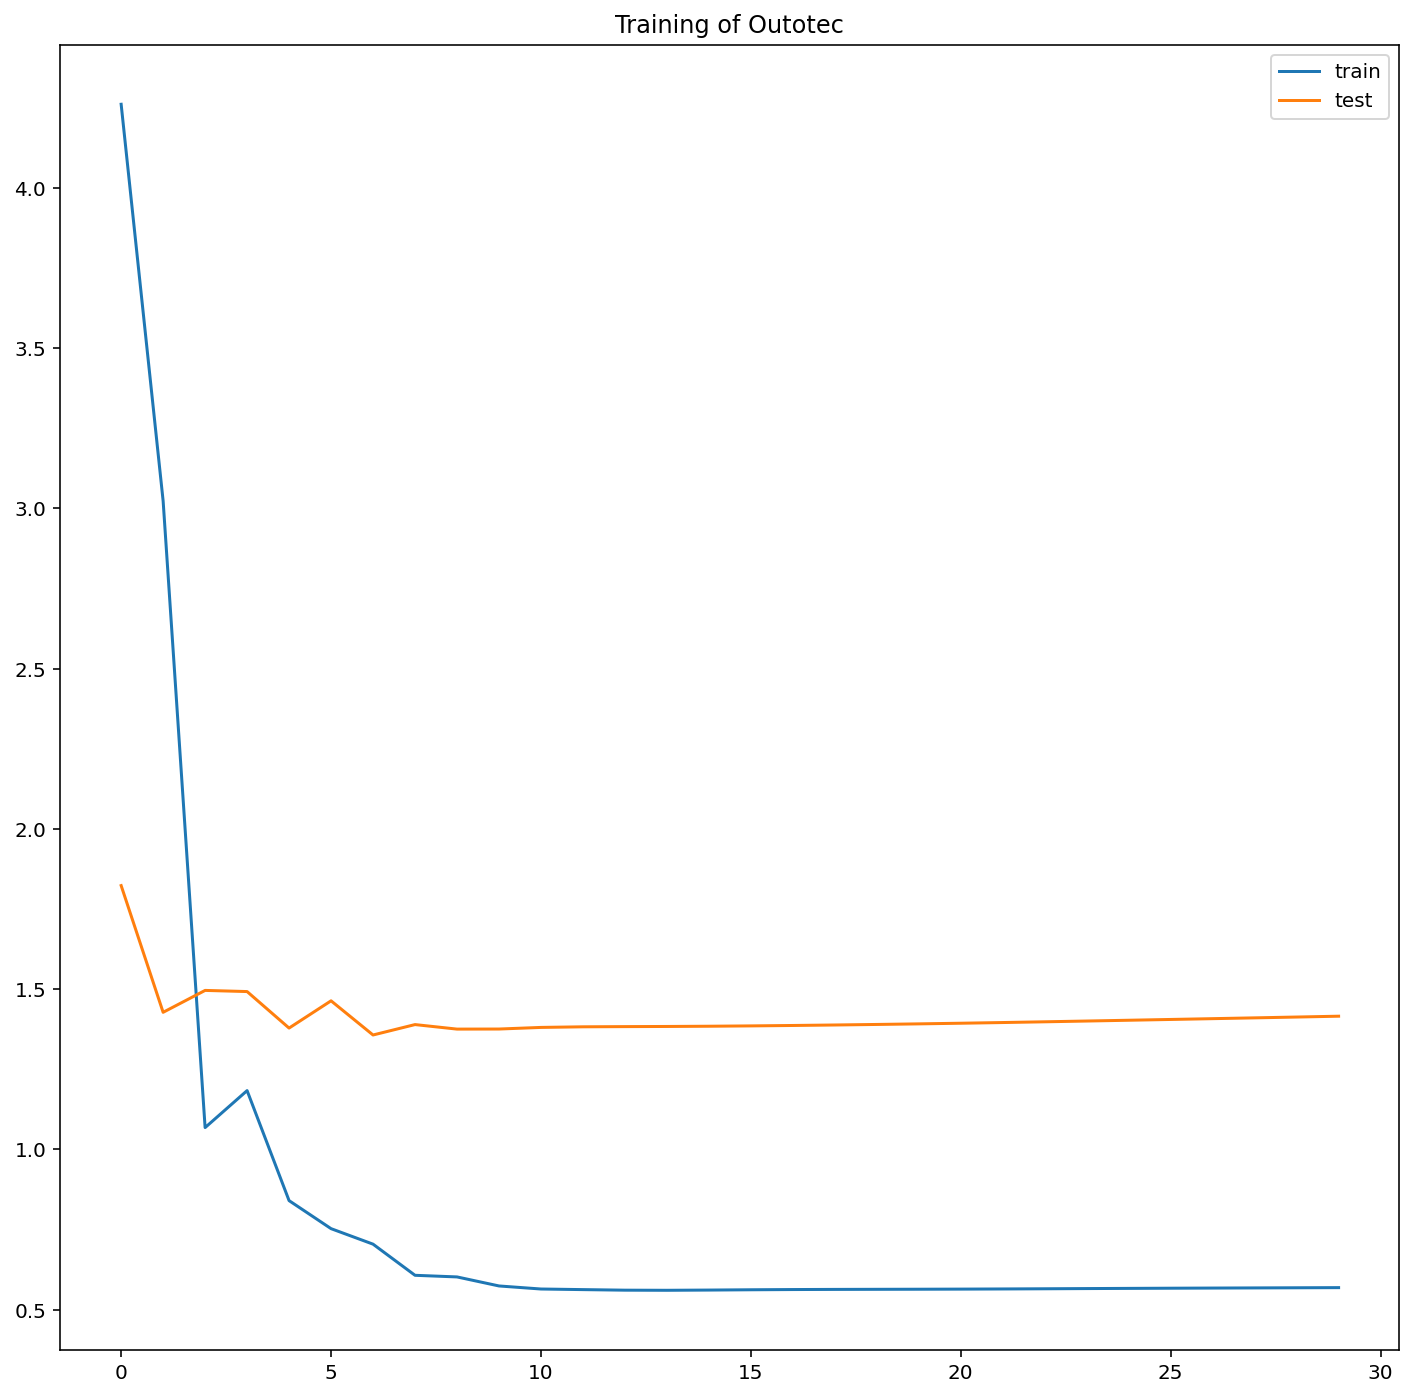

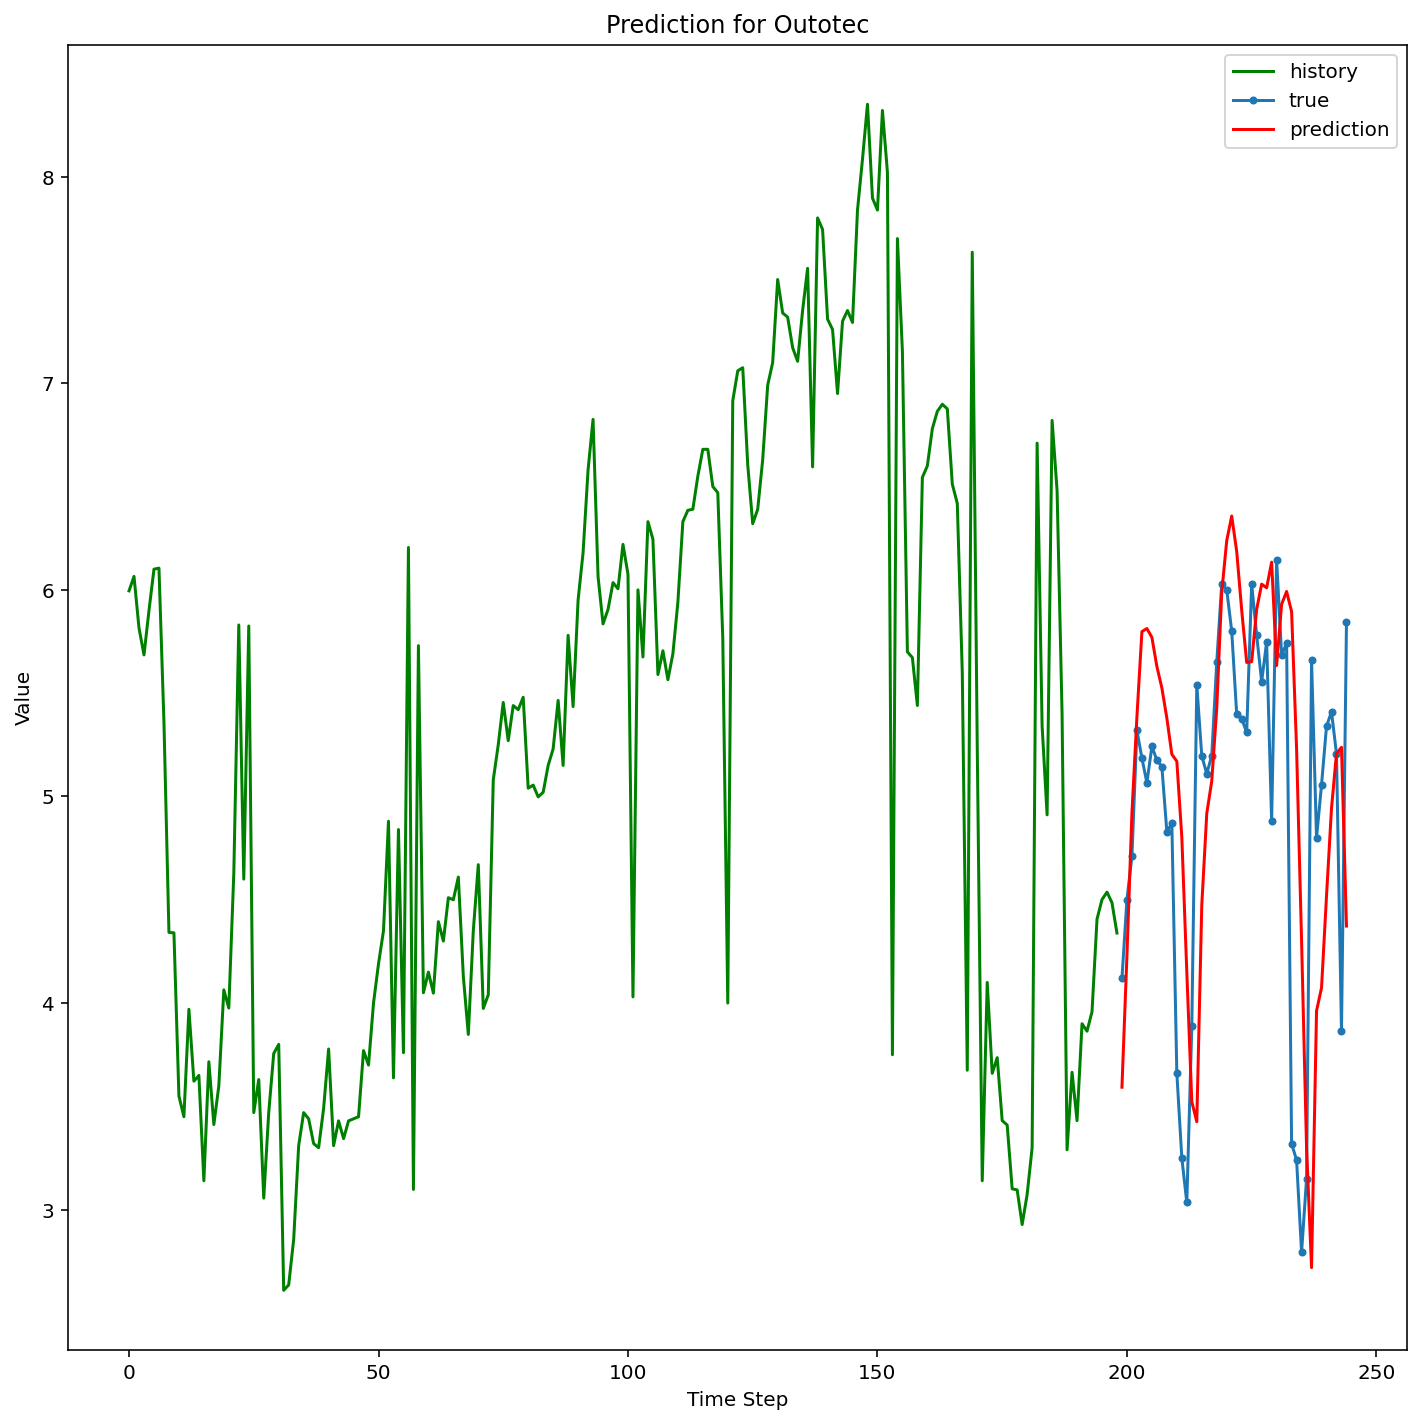

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 9ms/sample - loss: 8.4955 - val_loss: 5.7742
Epoch 2/30
179/179 [==============================] - 0s 512us/sample - loss: 3.3488 - val_loss: 1.3705
Epoch 3/30
179/179 [==============================] - 0s 481us/sample - loss: 1.6031 - val_loss: 2.4214
Epoch 4/30
179/179 [==============================] - 0s 499us/sample - loss: 1.4881 - val_loss: 1.5415
Epoch 5/30
179/179 [==============================] - 0s 505us/sample - loss: 1.3464 - val_loss: 1.6565
Epoch 6/30
179/179 [==============================] - 0s 525us/sample - loss: 1.1924 - val_loss: 1.4463
Epoch 7/30
179/179 [==============================] - 0s 465us/sample - loss: 1.1771 - val_loss: 1.4756
Epoch 8/30
179/179 [==============================] - 0s 467us/sample - loss: 1.1054 - val_loss: 1.4078
Epoch 9/30
179/179 [==============================] - 0s 493us/sample - loss: 1.1134 - val_loss: 1.4211
Ep

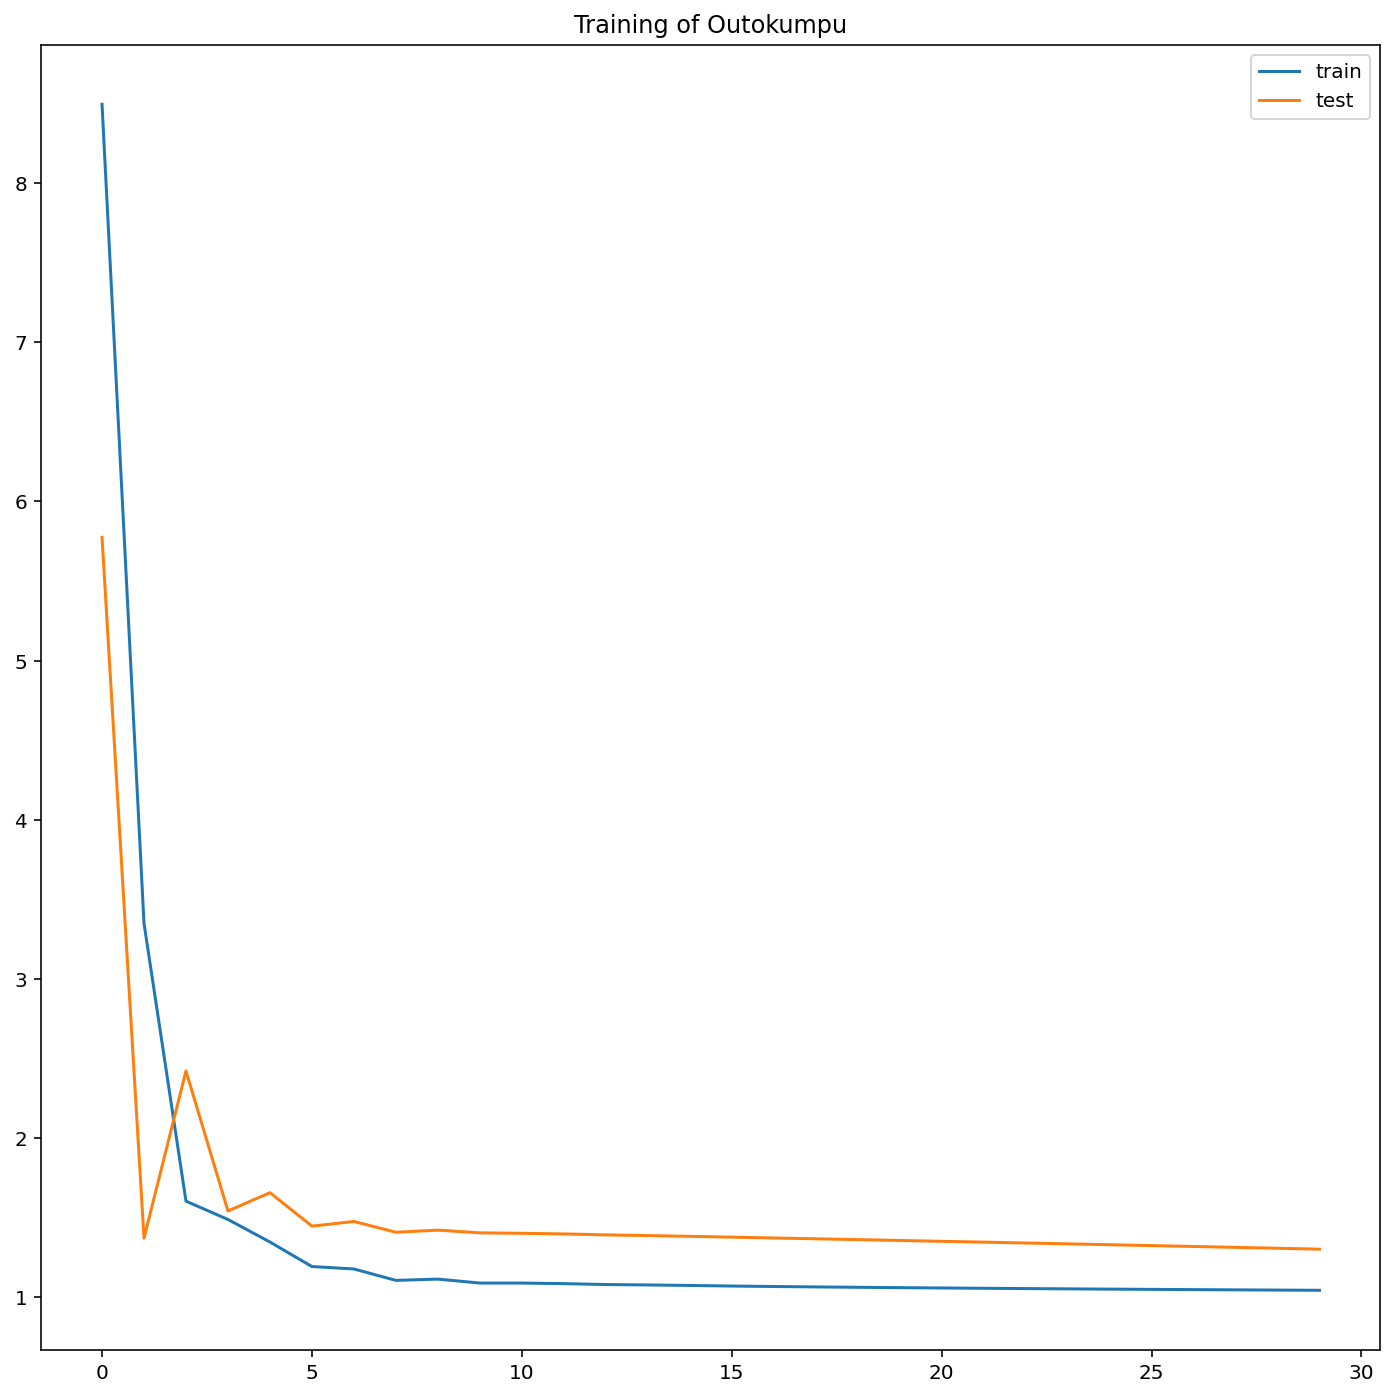

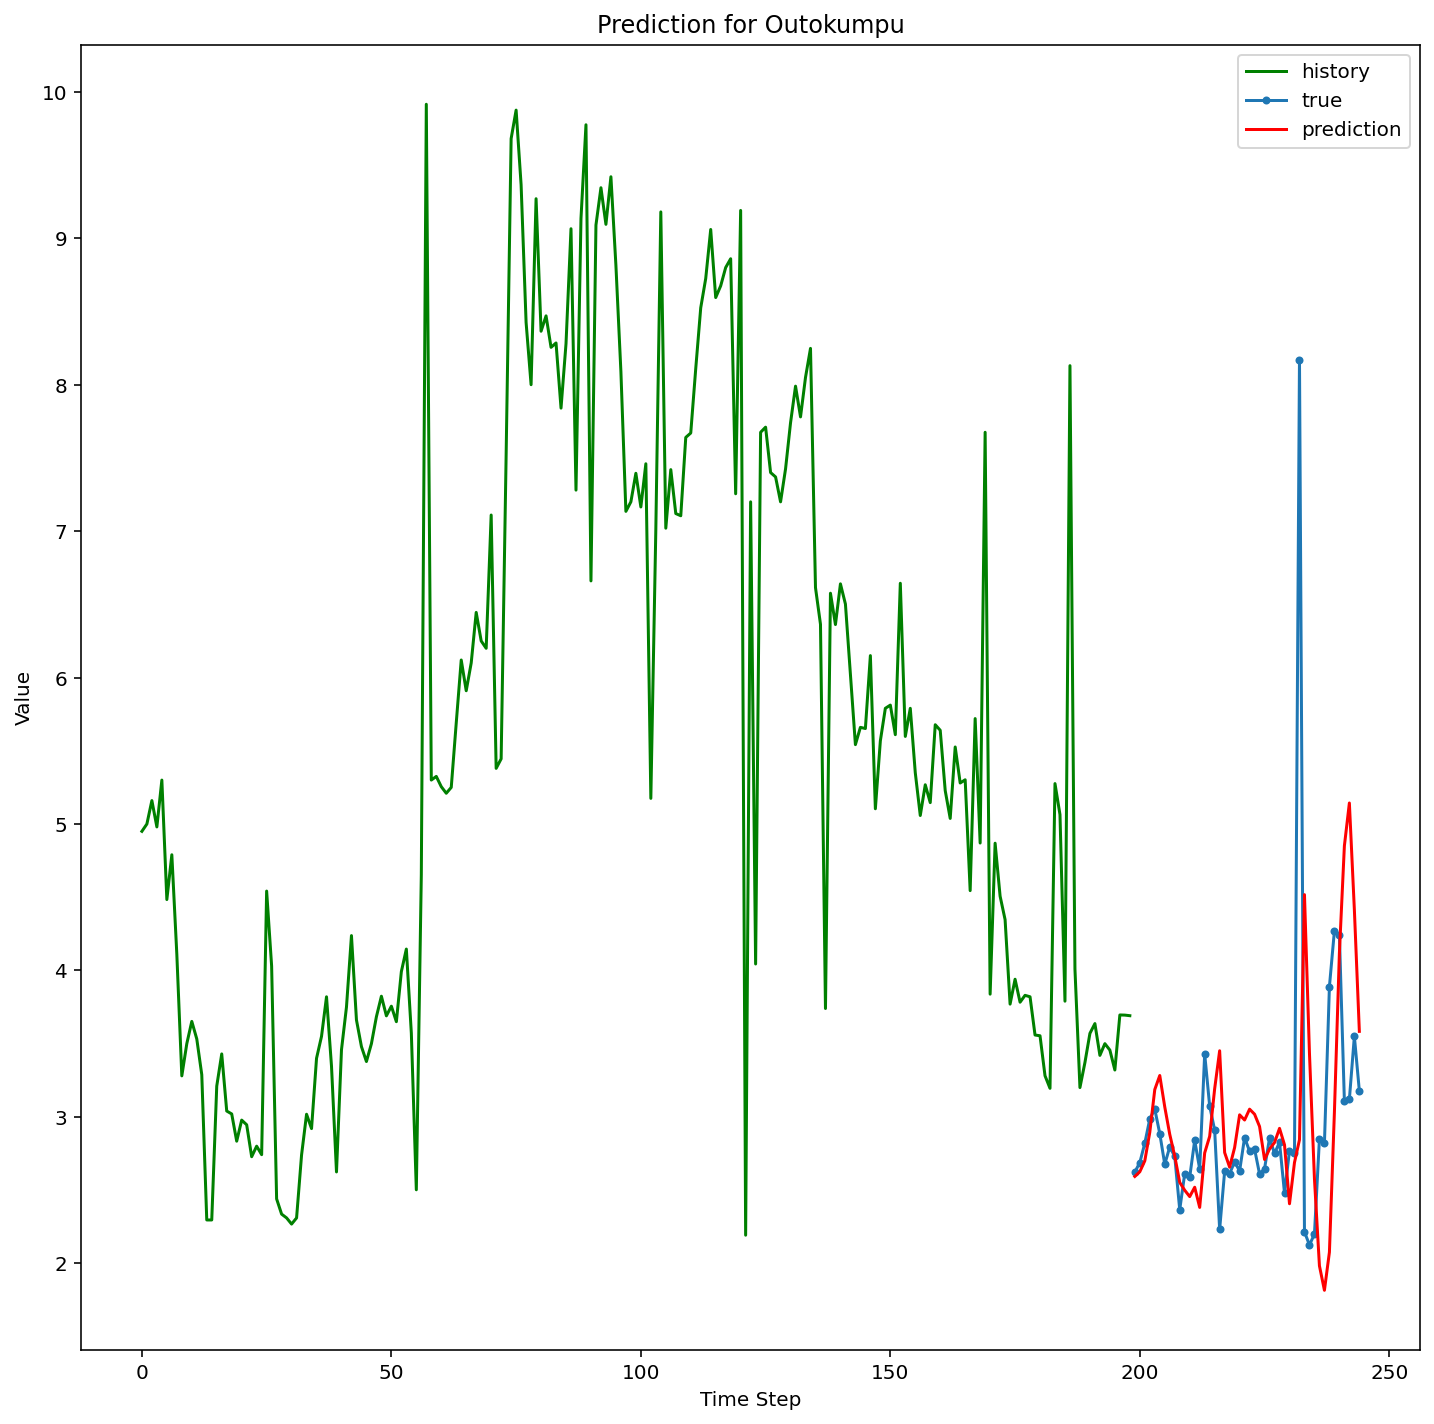

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 10ms/sample - loss: 1194.8325 - val_loss: 288.0272
Epoch 2/30
179/179 [==============================] - 0s 530us/sample - loss: 128.0218 - val_loss: 224.2833
Epoch 3/30
179/179 [==============================] - 0s 546us/sample - loss: 54.2220 - val_loss: 16.2913
Epoch 4/30
179/179 [==============================] - 0s 553us/sample - loss: 27.5634 - val_loss: 25.6573
Epoch 5/30
179/179 [==============================] - 0s 512us/sample - loss: 15.5119 - val_loss: 10.4439
Epoch 6/30
179/179 [==============================] - 0s 504us/sample - loss: 12.5138 - val_loss: 8.6643
Epoch 7/30
179/179 [==============================] - 0s 459us/sample - loss: 10.2986 - val_loss: 13.5126
Epoch 8/30
179/179 [==============================] - 0s 556us/sample - loss: 11.1910 - val_loss: 9.3111
Epoch 9/30
179/179 [==============================] - 0s 481us/sample - loss: 10.4109 

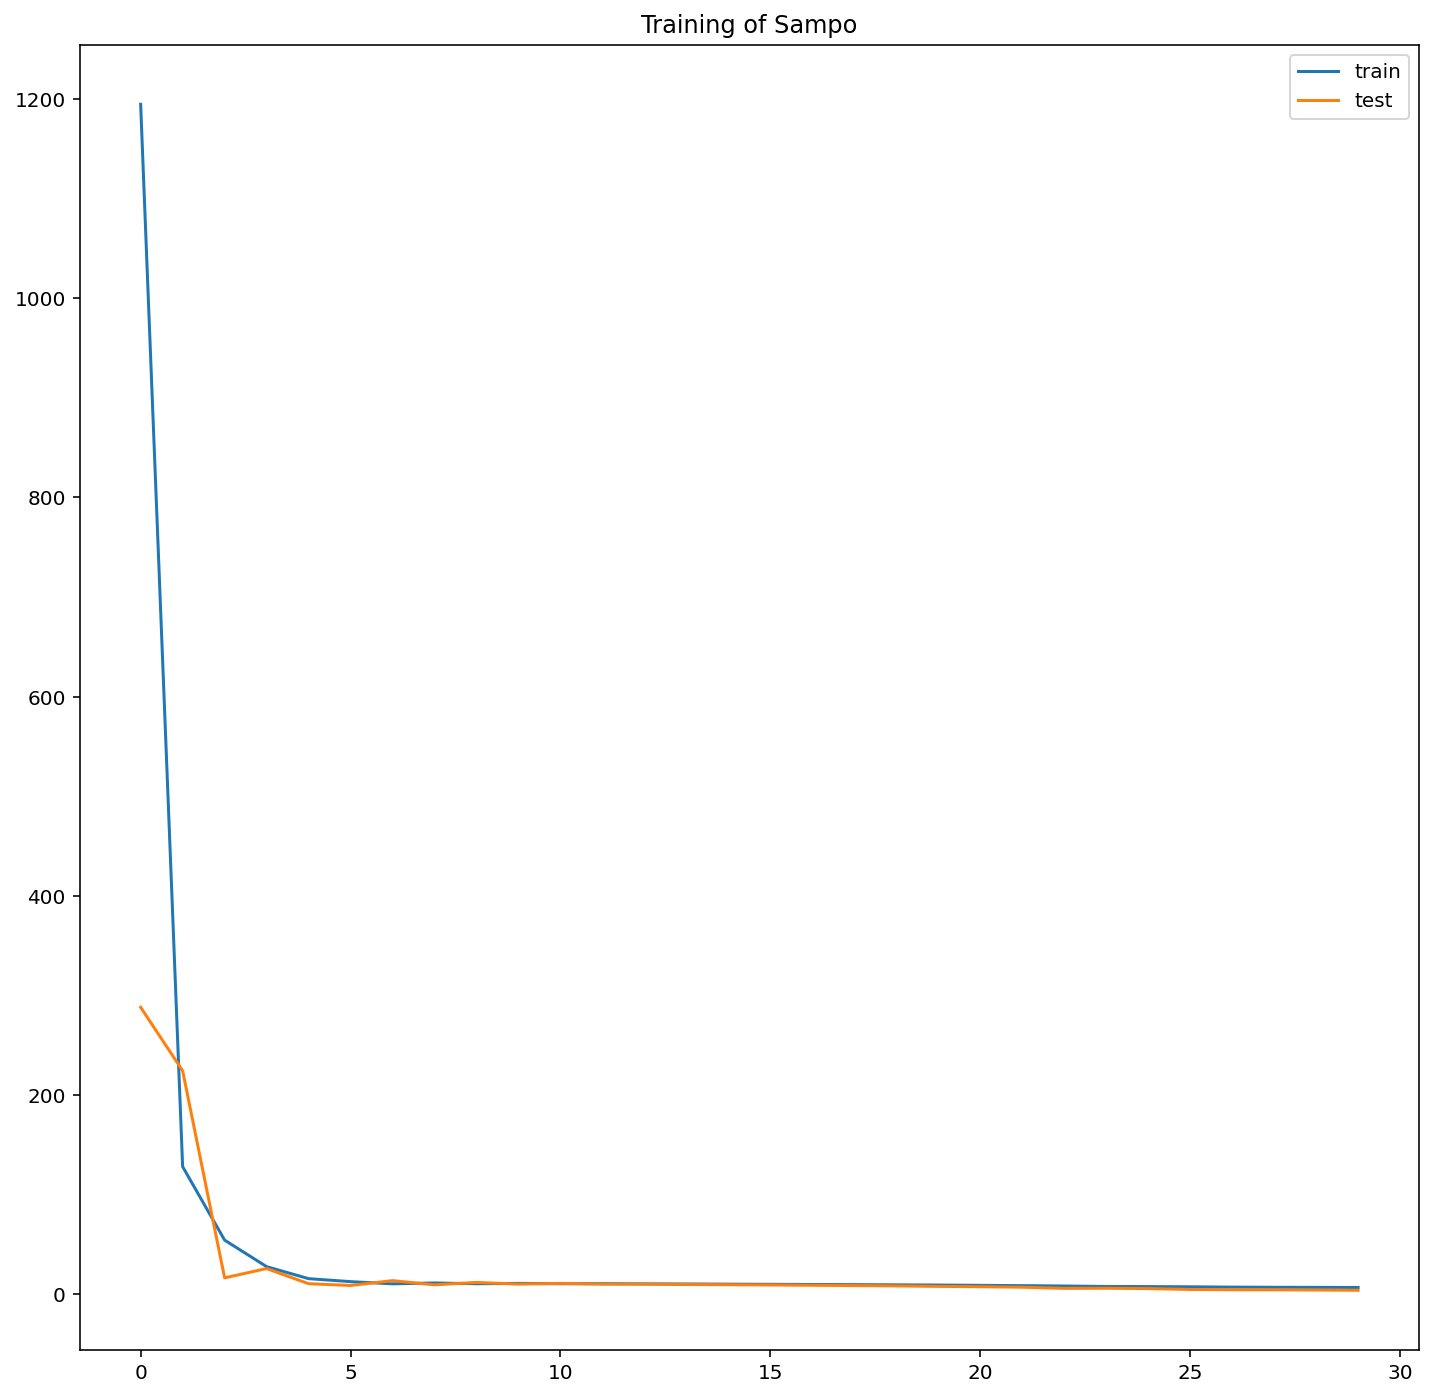

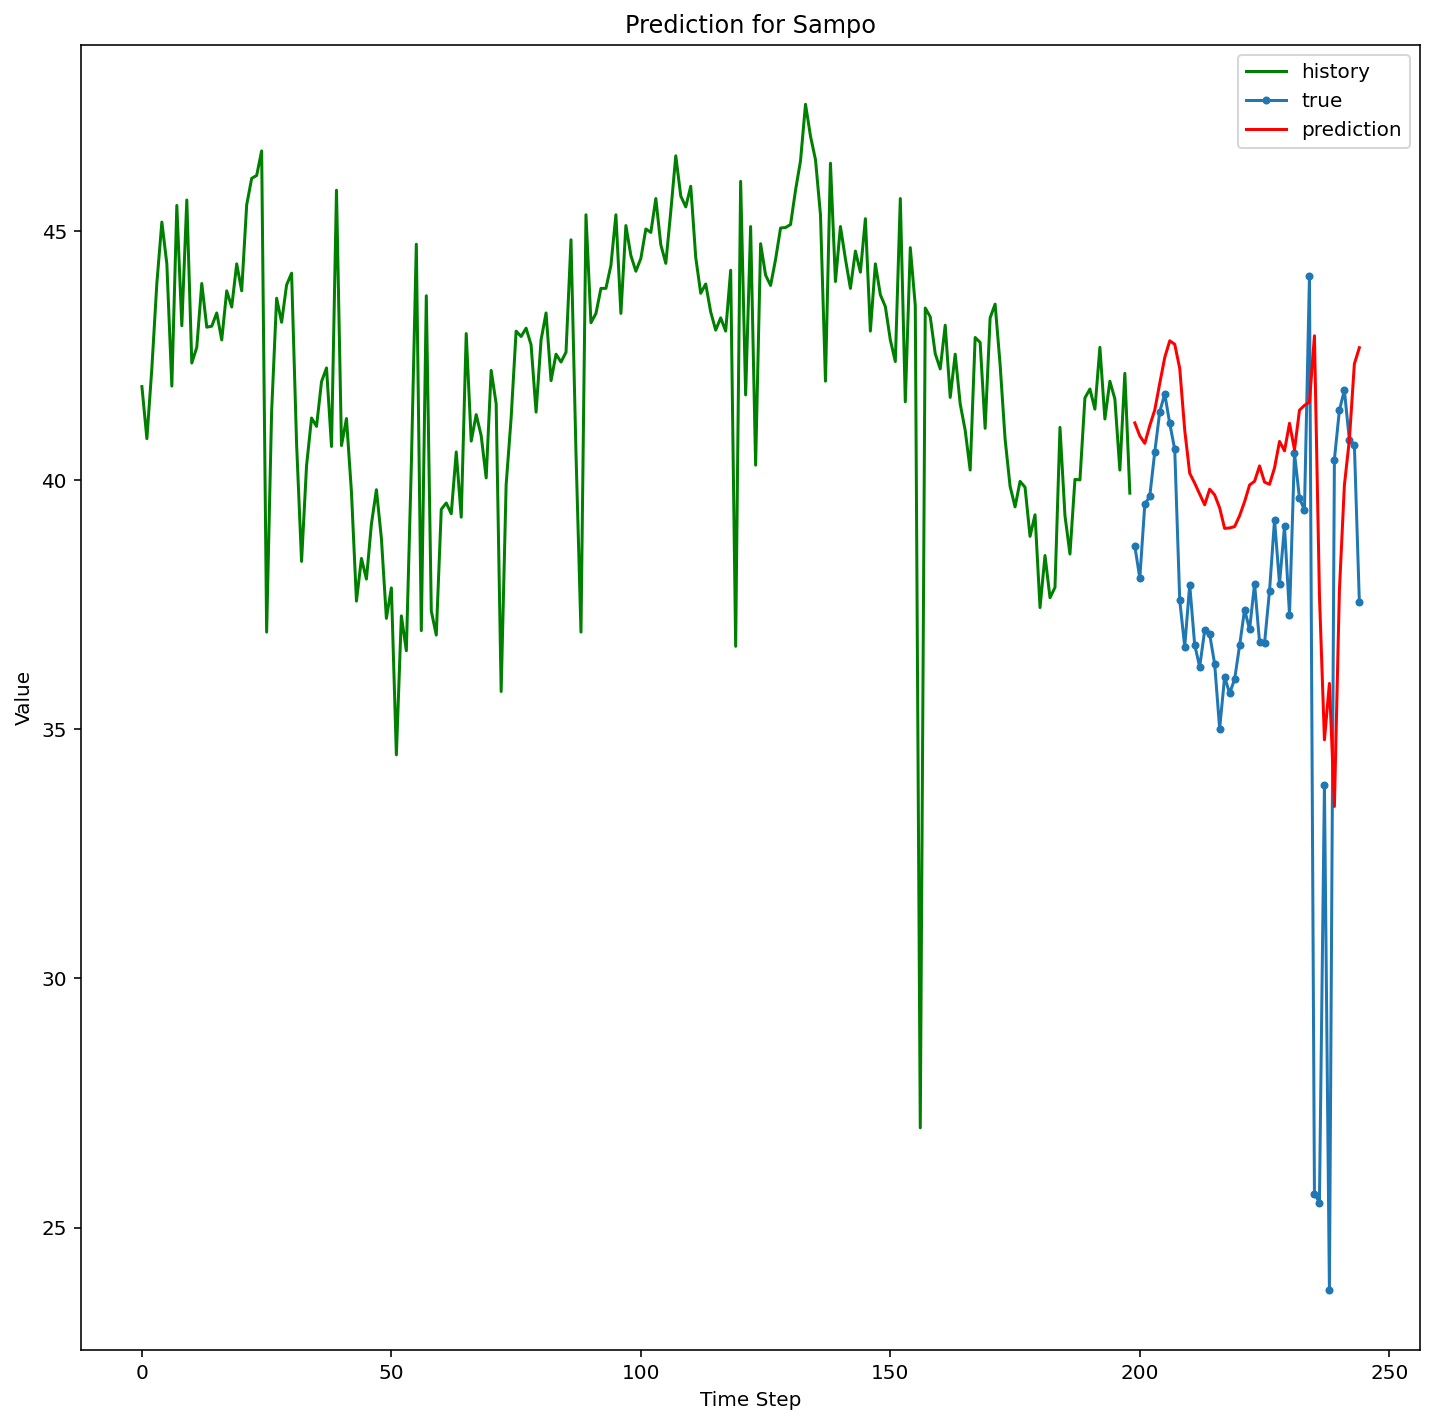

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 10ms/sample - loss: 27.7454 - val_loss: 31.1409
Epoch 2/30
179/179 [==============================] - 0s 520us/sample - loss: 27.6263 - val_loss: 10.1824
Epoch 3/30
179/179 [==============================] - 0s 470us/sample - loss: 7.1219 - val_loss: 2.9203
Epoch 4/30
179/179 [==============================] - 0s 488us/sample - loss: 5.1595 - val_loss: 3.0976
Epoch 5/30
179/179 [==============================] - 0s 495us/sample - loss: 5.1742 - val_loss: 3.1180
Epoch 6/30
179/179 [==============================] - 0s 484us/sample - loss: 2.4781 - val_loss: 3.2869
Epoch 7/30
179/179 [==============================] - 0s 489us/sample - loss: 2.2757 - val_loss: 3.2795
Epoch 8/30
179/179 [==============================] - 0s 446us/sample - loss: 1.4264 - val_loss: 3.4746
Epoch 9/30
179/179 [==============================] - 0s 479us/sample - loss: 1.2380 - val_loss: 3.58

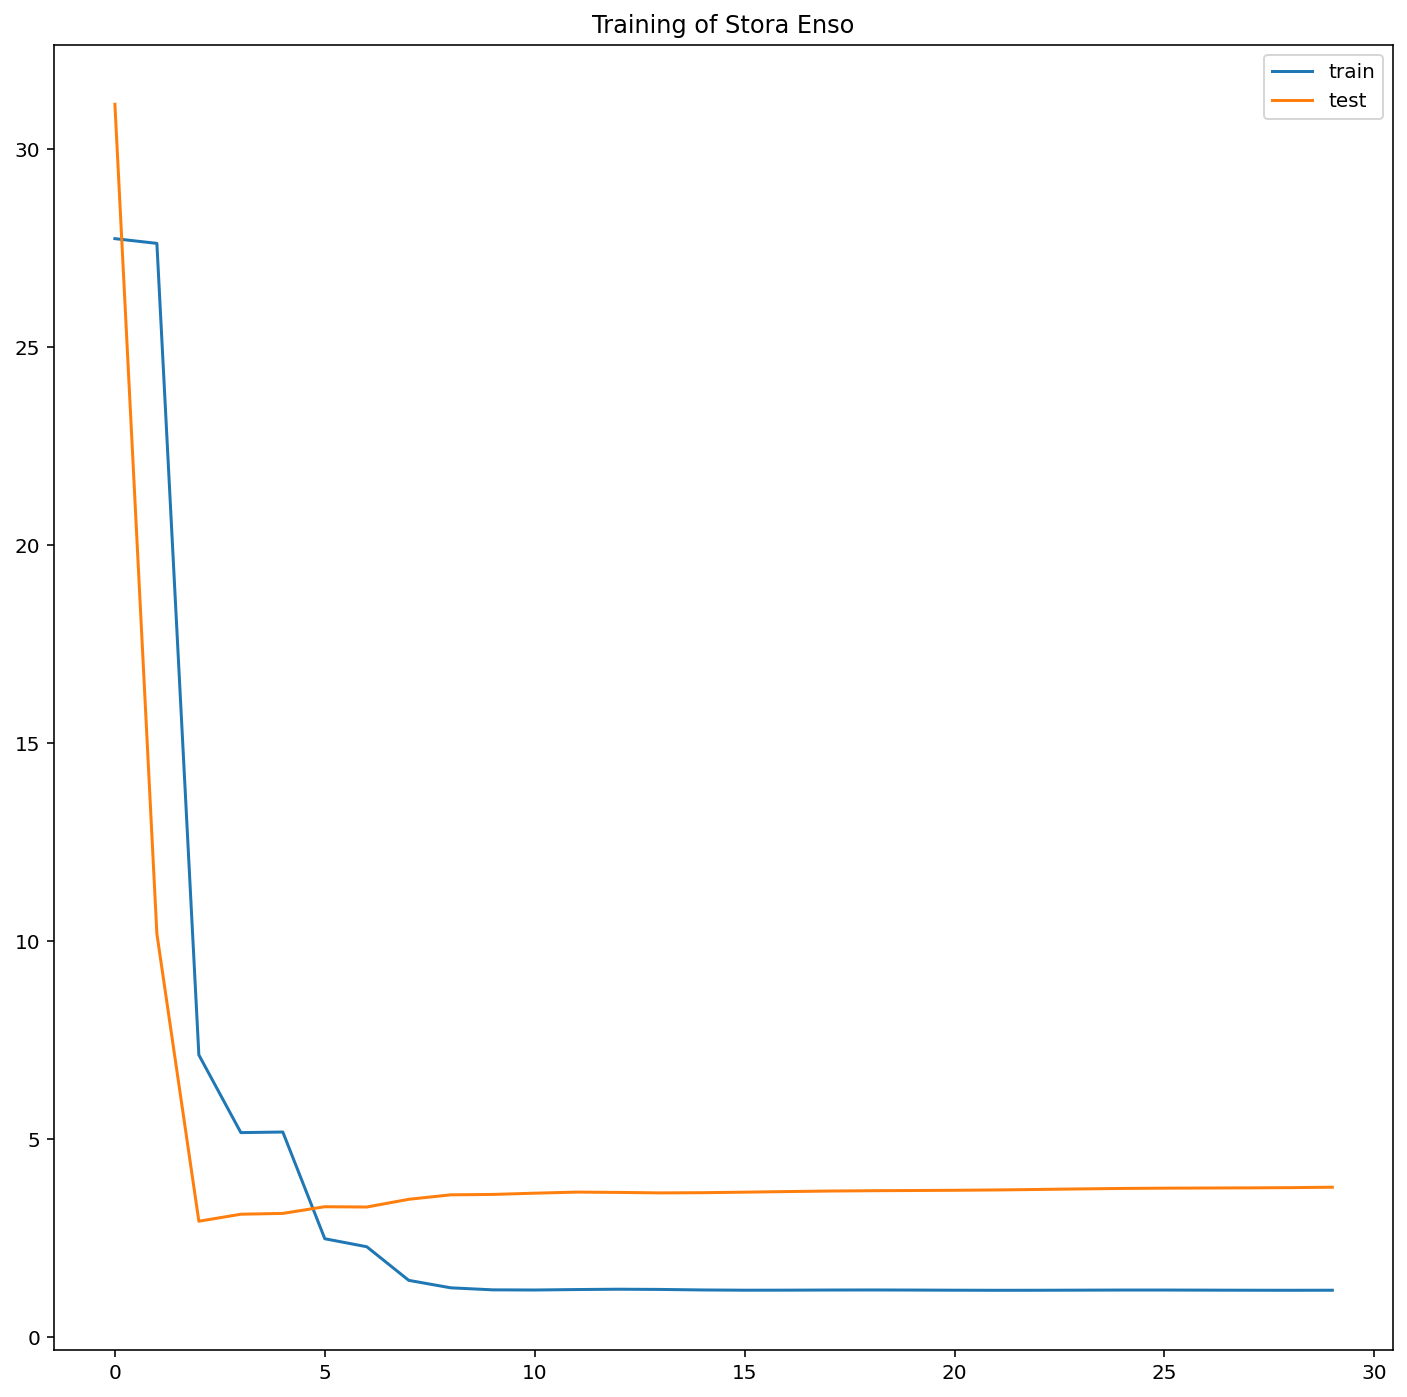

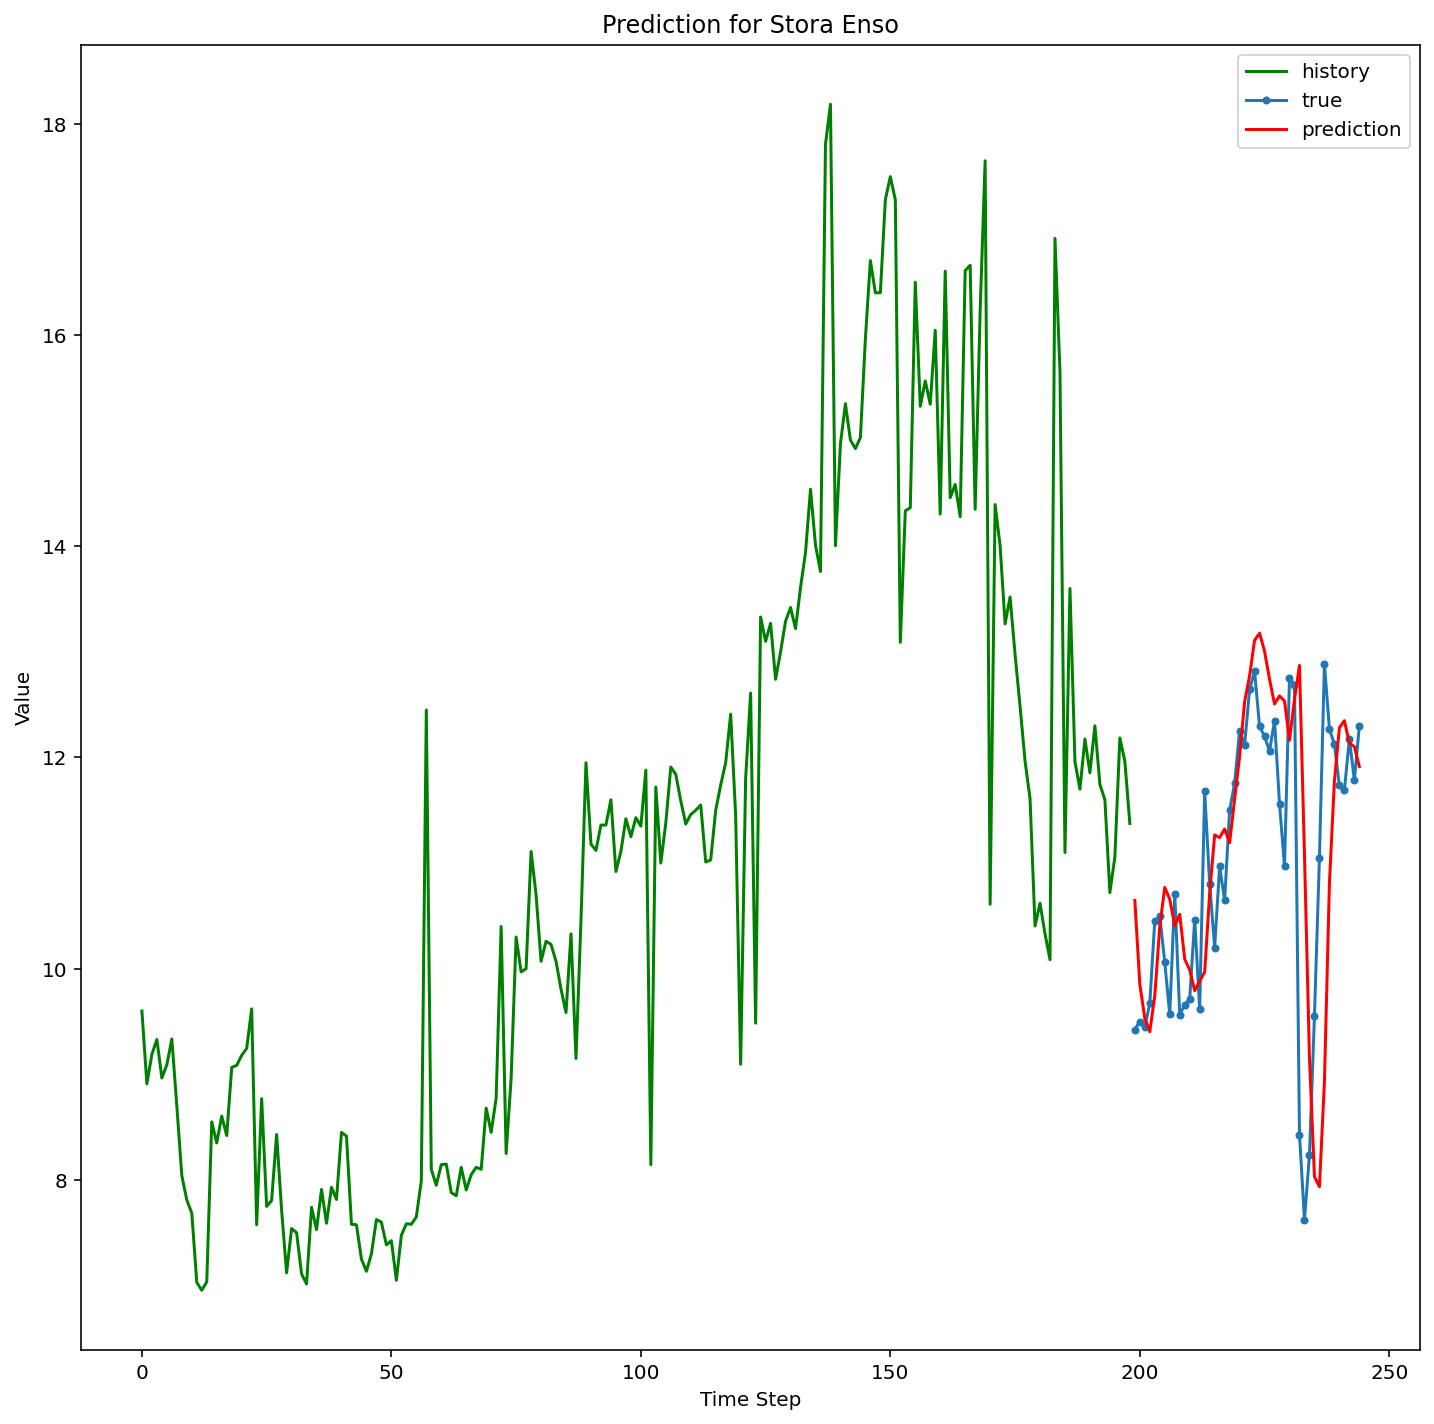

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 9ms/sample - loss: 6.1758 - val_loss: 0.8707
Epoch 2/30
179/179 [==============================] - 0s 491us/sample - loss: 0.4169 - val_loss: 0.4092
Epoch 3/30
179/179 [==============================] - 0s 482us/sample - loss: 0.3190 - val_loss: 0.1232
Epoch 4/30
179/179 [==============================] - 0s 471us/sample - loss: 0.0539 - val_loss: 0.0502
Epoch 5/30
179/179 [==============================] - 0s 445us/sample - loss: 0.1046 - val_loss: 0.0189
Epoch 6/30
179/179 [==============================] - 0s 492us/sample - loss: 0.0424 - val_loss: 0.0160
Epoch 7/30
179/179 [==============================] - 0s 467us/sample - loss: 0.0632 - val_loss: 0.0163
Epoch 8/30
179/179 [==============================] - 0s 559us/sample - loss: 0.0544 - val_loss: 0.0148
Epoch 9/30
179/179 [==============================] - 0s 549us/sample - loss: 0.0529 - val_loss: 0.0169
Ep

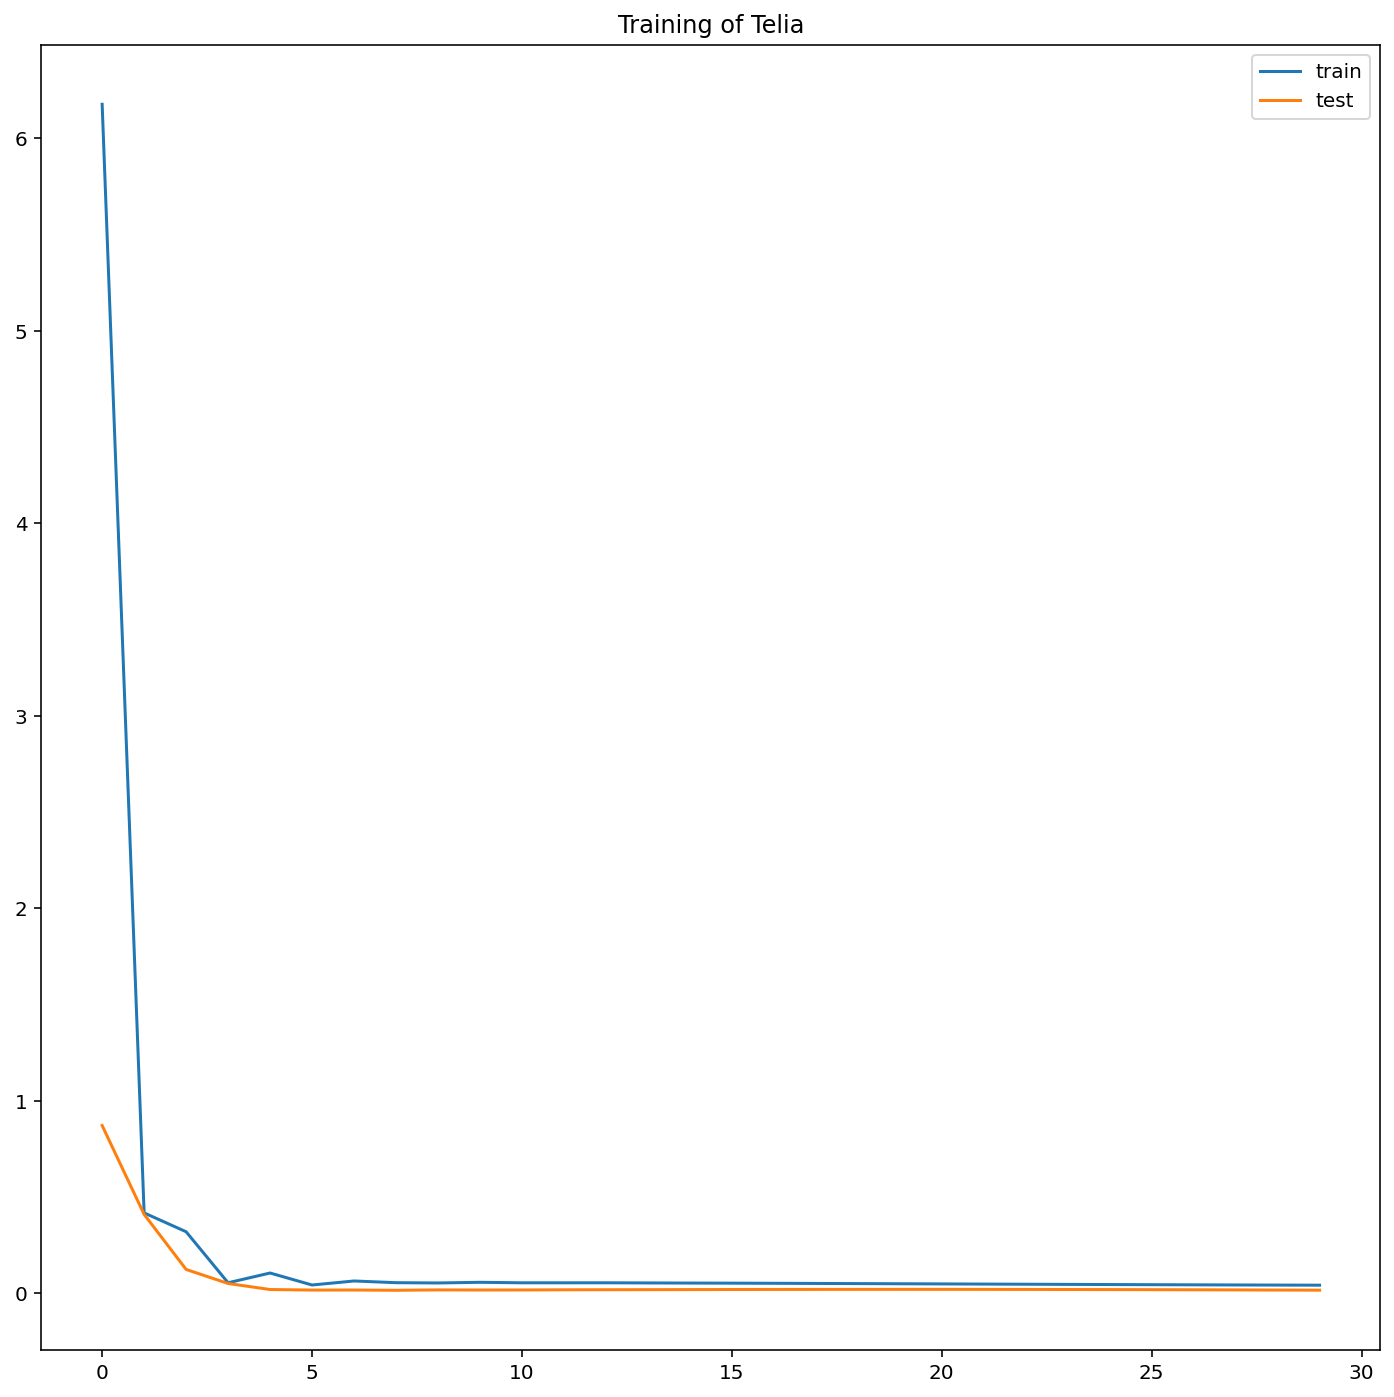

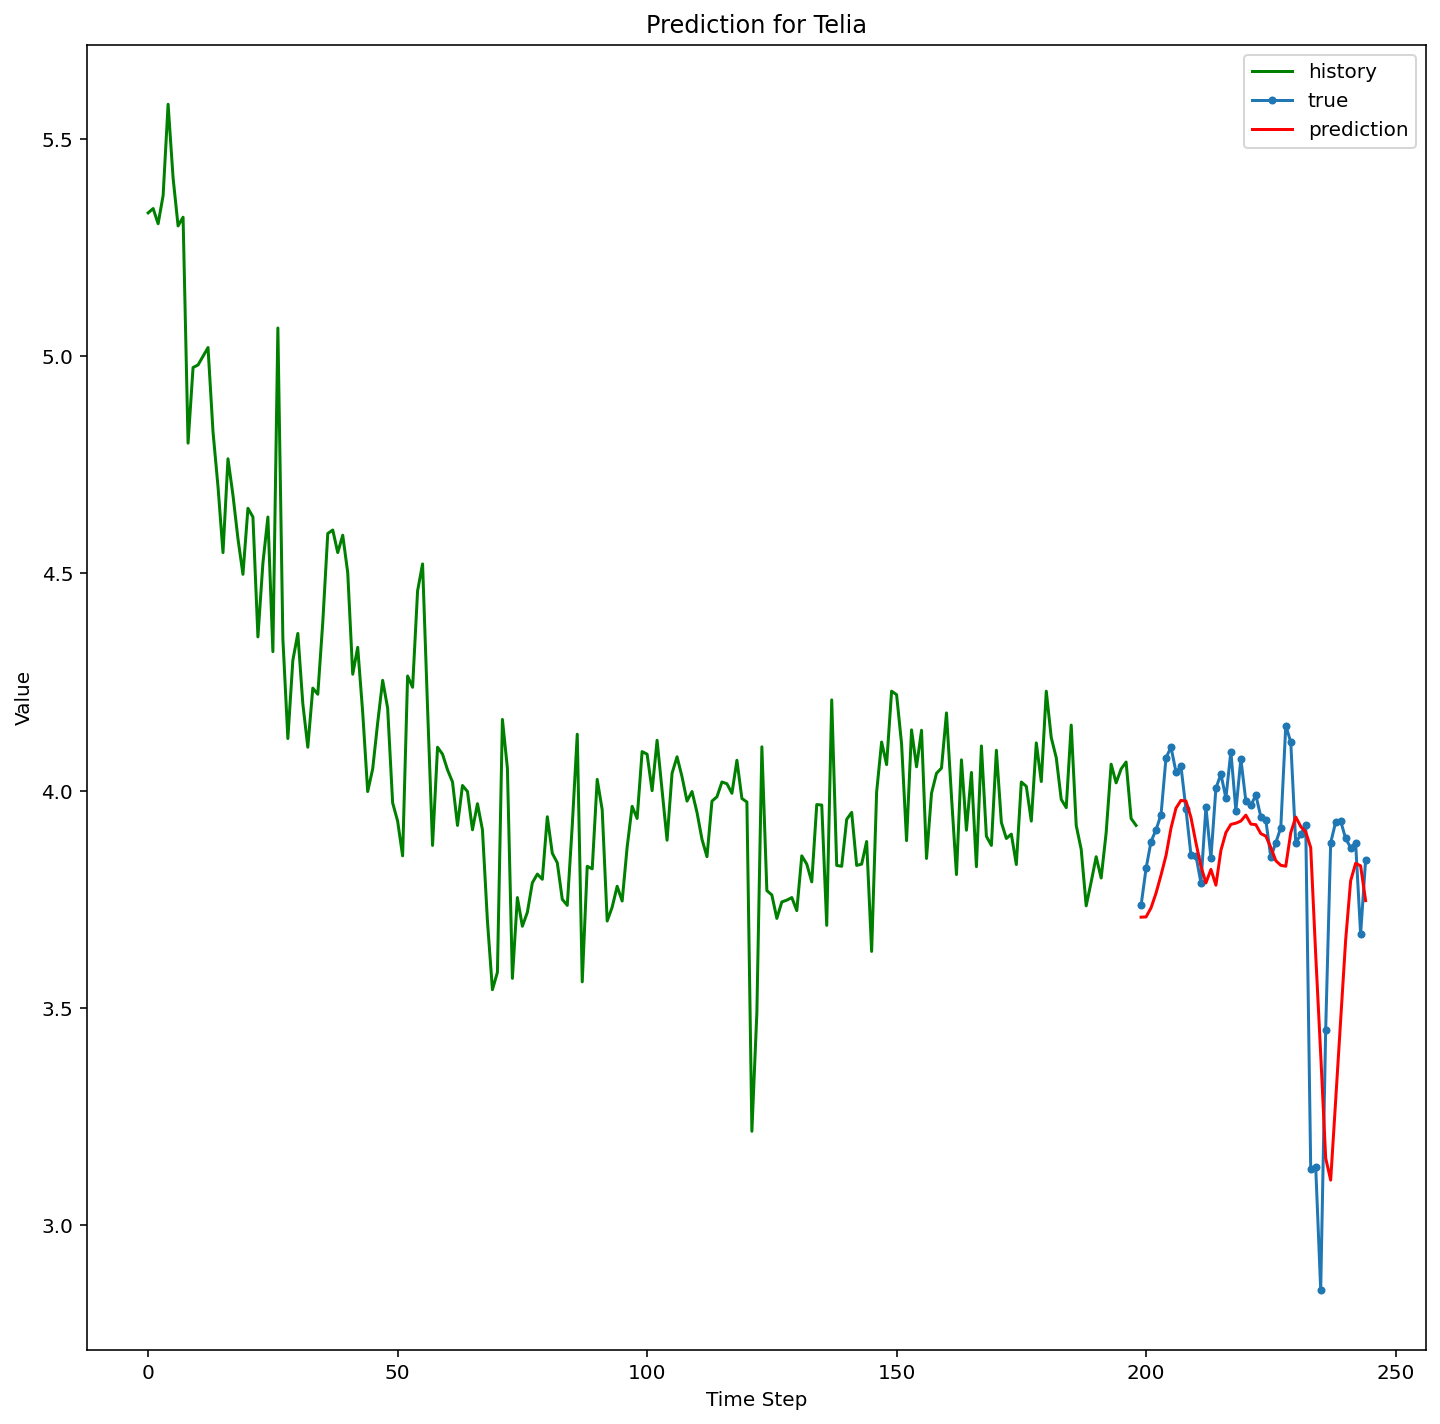

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 10ms/sample - loss: 351.0120 - val_loss: 30.9487
Epoch 2/30
179/179 [==============================] - 0s 530us/sample - loss: 14.0565 - val_loss: 13.0665
Epoch 3/30
179/179 [==============================] - 0s 471us/sample - loss: 24.5620 - val_loss: 6.6464
Epoch 4/30
179/179 [==============================] - 0s 530us/sample - loss: 3.1489 - val_loss: 9.8609
Epoch 5/30
179/179 [==============================] - 0s 518us/sample - loss: 13.9214 - val_loss: 2.6516
Epoch 6/30
179/179 [==============================] - 0s 516us/sample - loss: 5.3439 - val_loss: 4.8718
Epoch 7/30
179/179 [==============================] - 0s 455us/sample - loss: 9.4474 - val_loss: 2.5608
Epoch 8/30
179/179 [==============================] - 0s 493us/sample - loss: 6.3844 - val_loss: 3.6102
Epoch 9/30
179/179 [==============================] - 0s 503us/sample - loss: 7.7776 - val_loss: 2

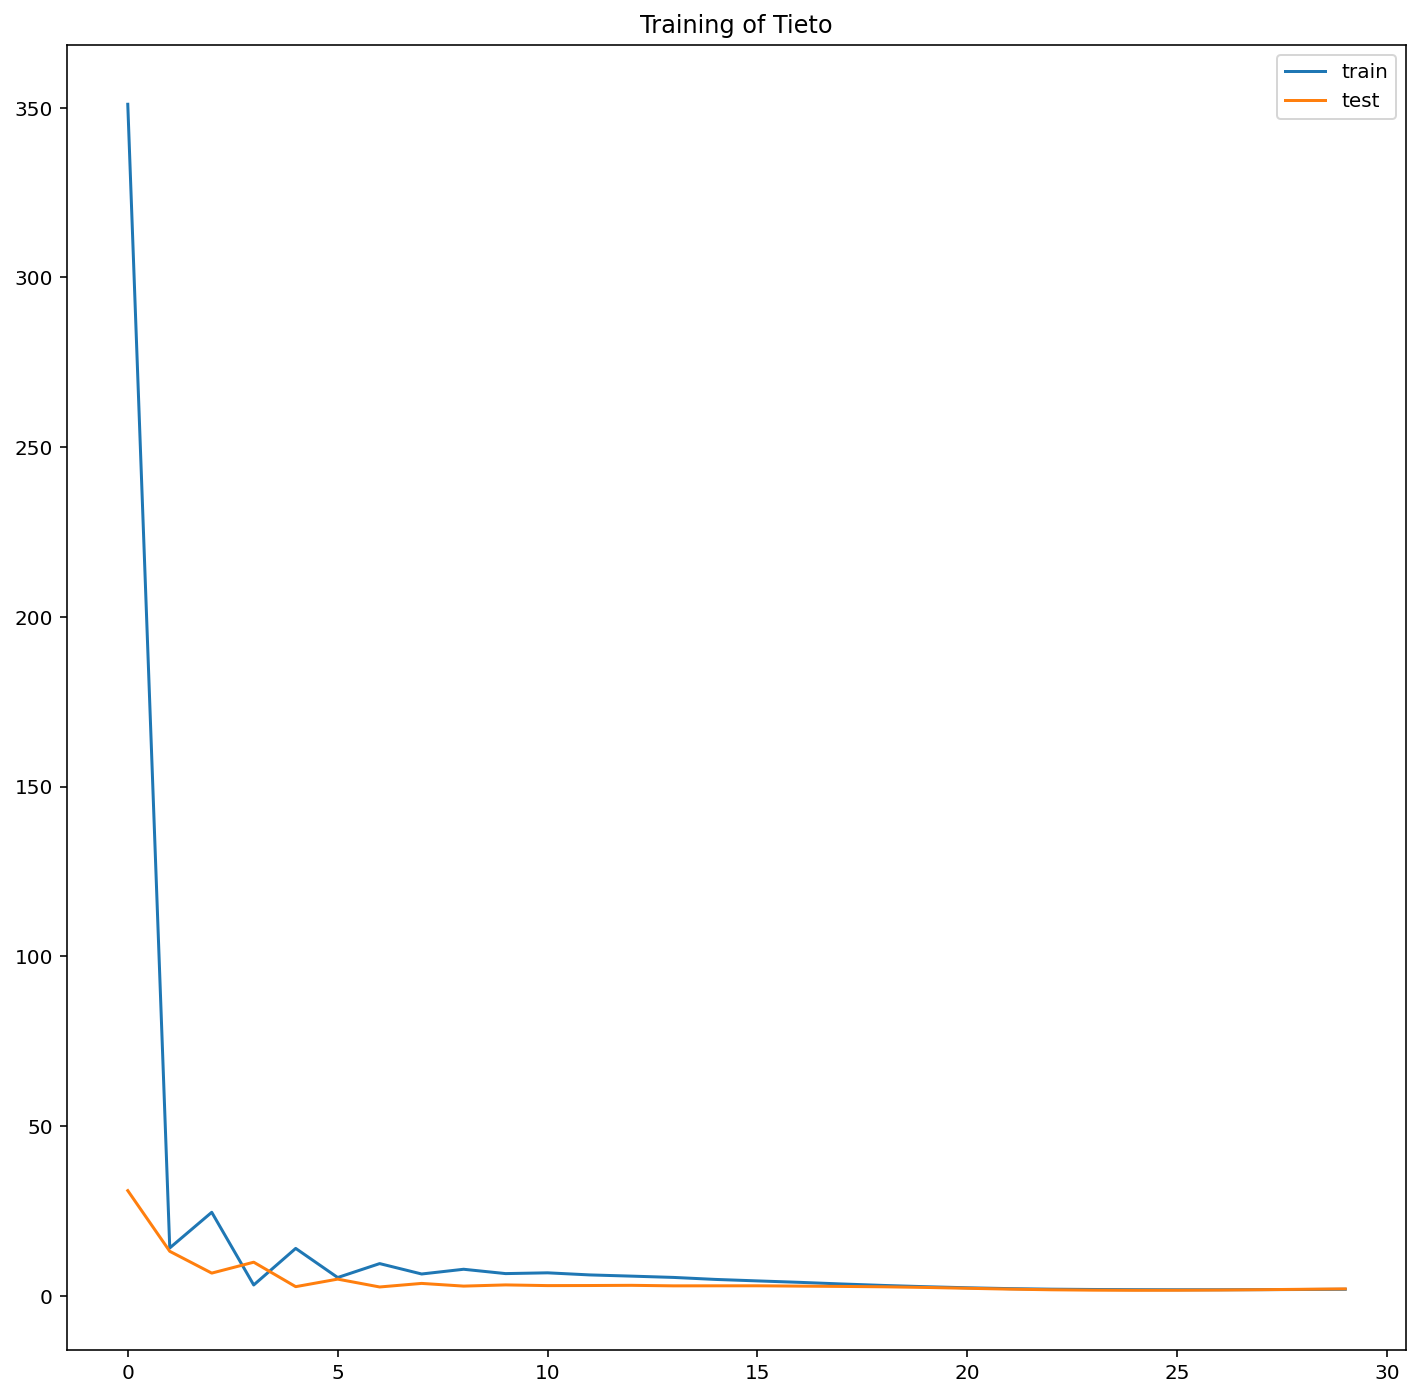

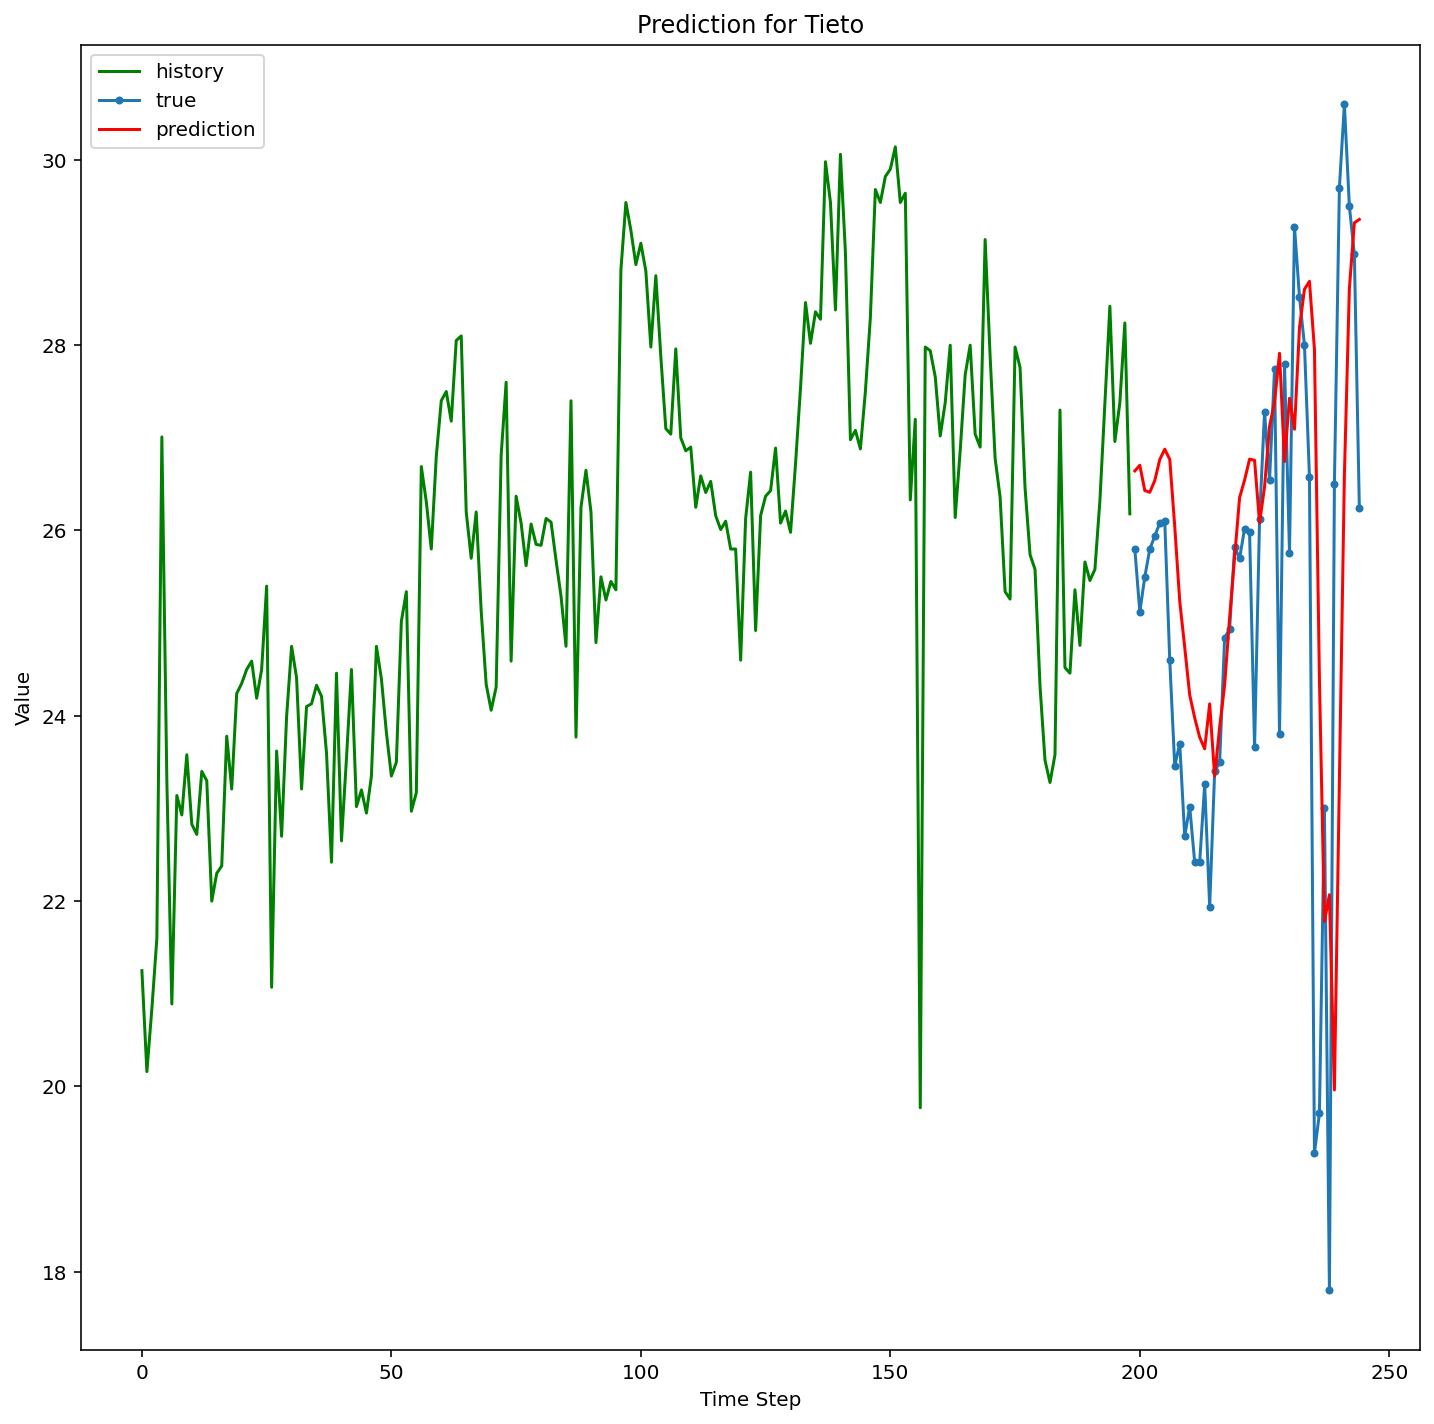

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 12ms/sample - loss: 851.7899 - val_loss: 294.7532
Epoch 2/30
179/179 [==============================] - 0s 499us/sample - loss: 132.6466 - val_loss: 301.0074
Epoch 3/30
179/179 [==============================] - 0s 458us/sample - loss: 94.7427 - val_loss: 11.8112
Epoch 4/30
179/179 [==============================] - 0s 472us/sample - loss: 41.3155 - val_loss: 23.6219
Epoch 5/30
179/179 [==============================] - 0s 694us/sample - loss: 17.7041 - val_loss: 39.5571
Epoch 6/30
179/179 [==============================] - 0s 501us/sample - loss: 26.4555 - val_loss: 17.3866
Epoch 7/30
179/179 [==============================] - 0s 532us/sample - loss: 19.4268 - val_loss: 28.2745
Epoch 8/30
179/179 [==============================] - 0s 532us/sample - loss: 20.3359 - val_loss: 23.1196
Epoch 9/30
179/179 [==============================] - 0s 515us/sample - loss: 19.8141

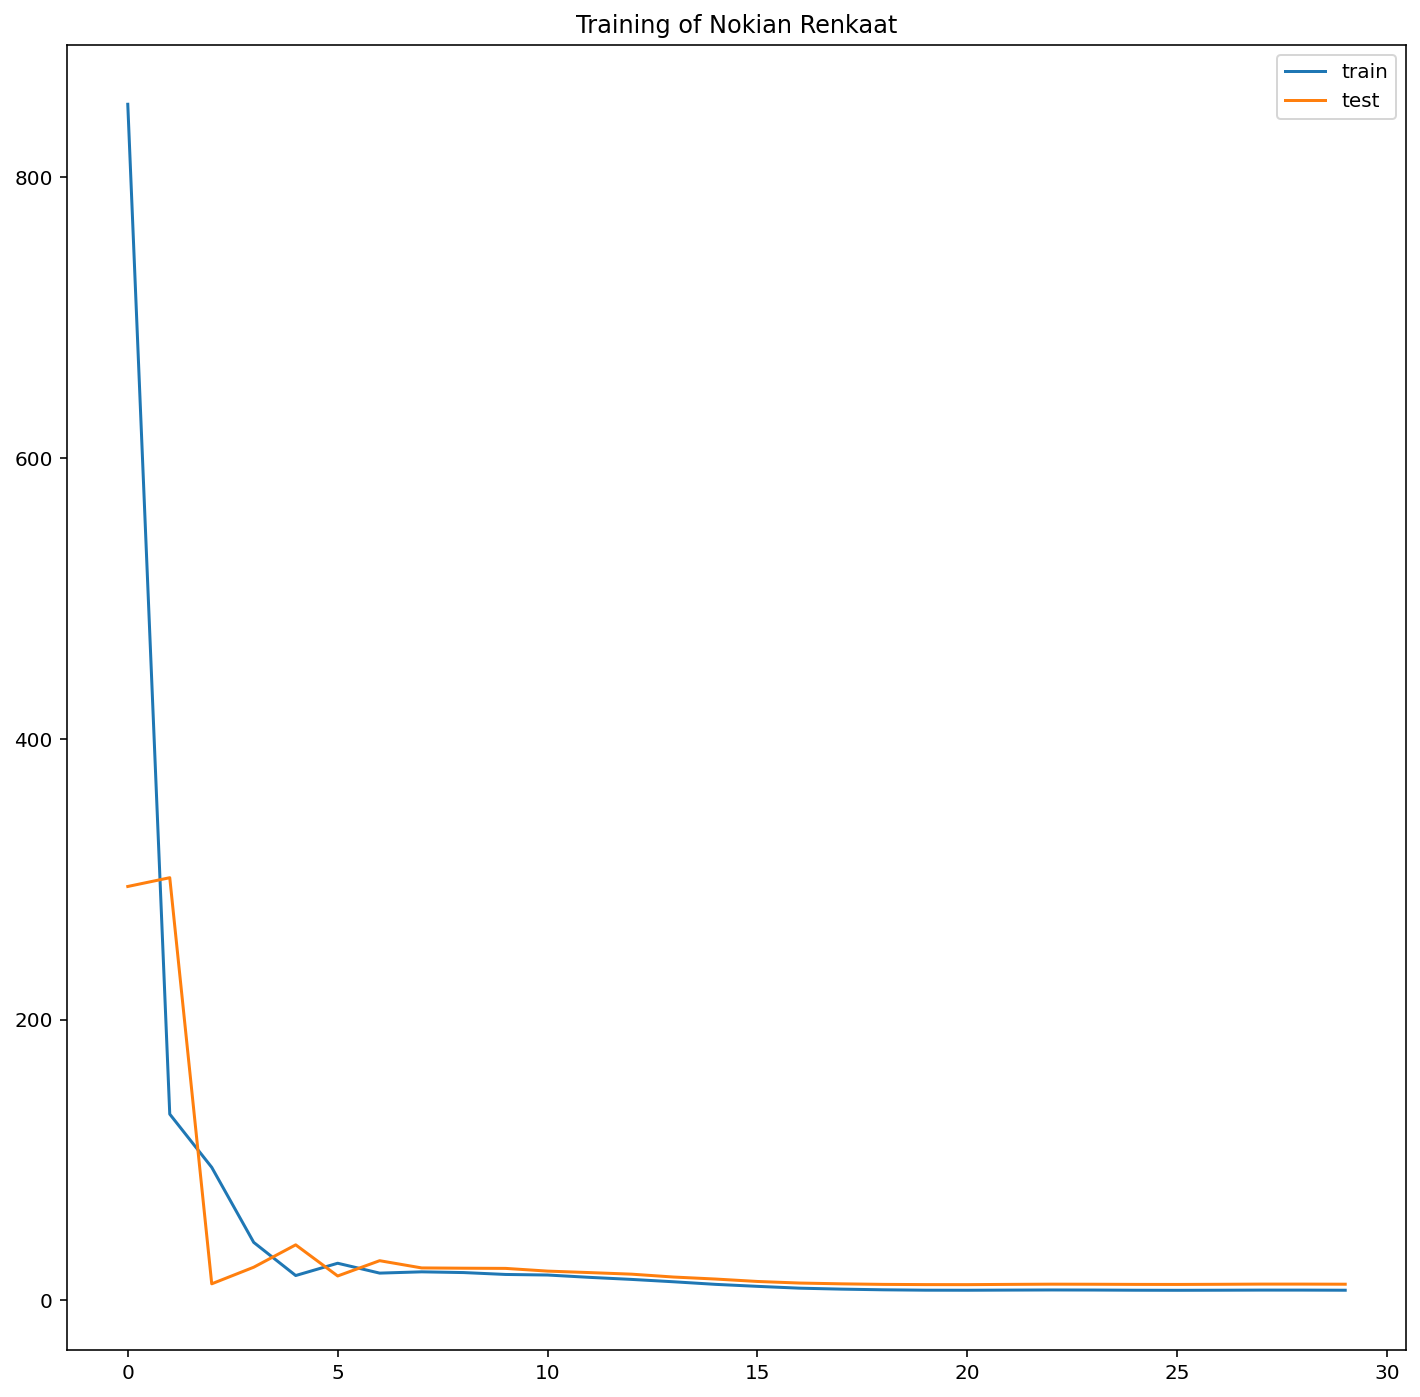

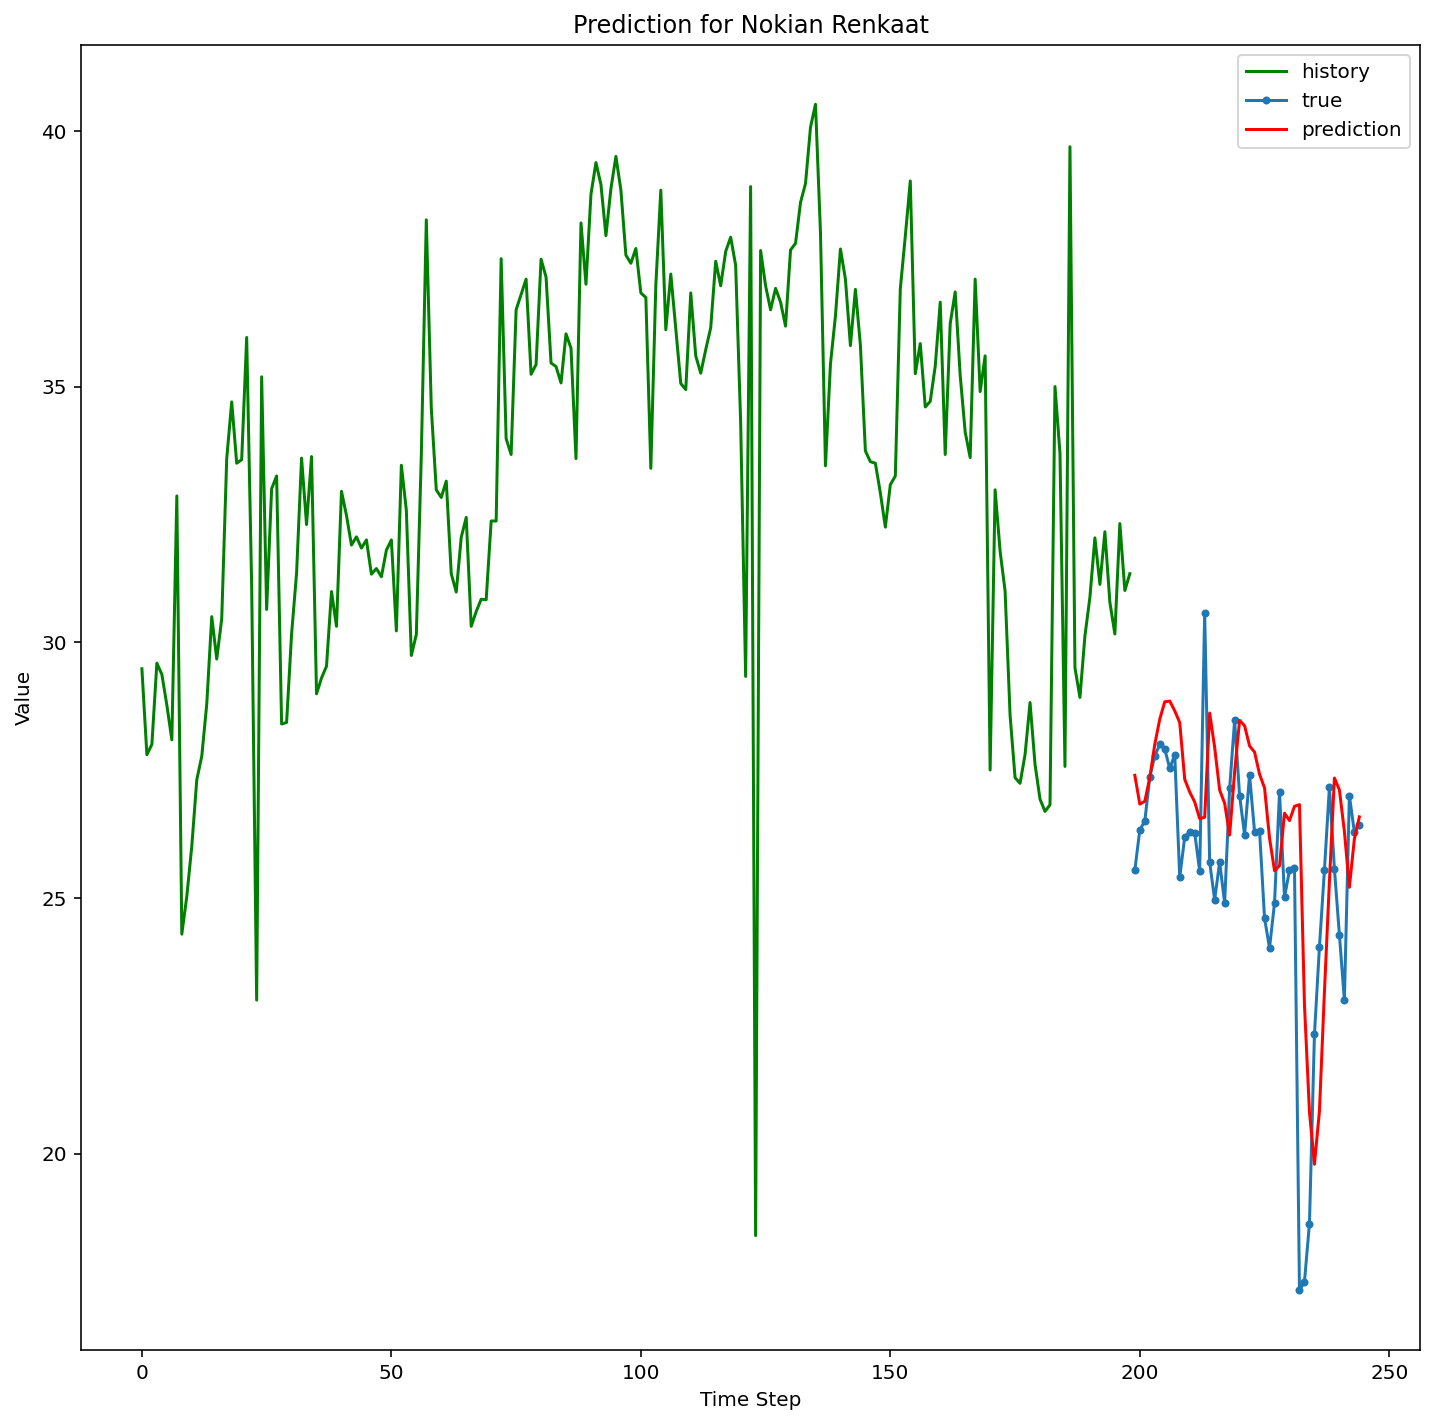

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 10ms/sample - loss: 256.2708 - val_loss: 66.7273
Epoch 2/30
179/179 [==============================] - 0s 504us/sample - loss: 29.7917 - val_loss: 10.6900
Epoch 3/30
179/179 [==============================] - 0s 480us/sample - loss: 51.3862 - val_loss: 35.5726
Epoch 4/30
179/179 [==============================] - 0s 526us/sample - loss: 18.3999 - val_loss: 11.3576
Epoch 5/30
179/179 [==============================] - 0s 451us/sample - loss: 20.9131 - val_loss: 13.1817
Epoch 6/30
179/179 [==============================] - 0s 466us/sample - loss: 9.5499 - val_loss: 9.0065
Epoch 7/30
179/179 [==============================] - 0s 508us/sample - loss: 6.1543 - val_loss: 9.9106
Epoch 8/30
179/179 [==============================] - 0s 458us/sample - loss: 4.0919 - val_loss: 11.1256
Epoch 9/30
179/179 [==============================] - 0s 473us/sample - loss: 4.3951 - val_lo

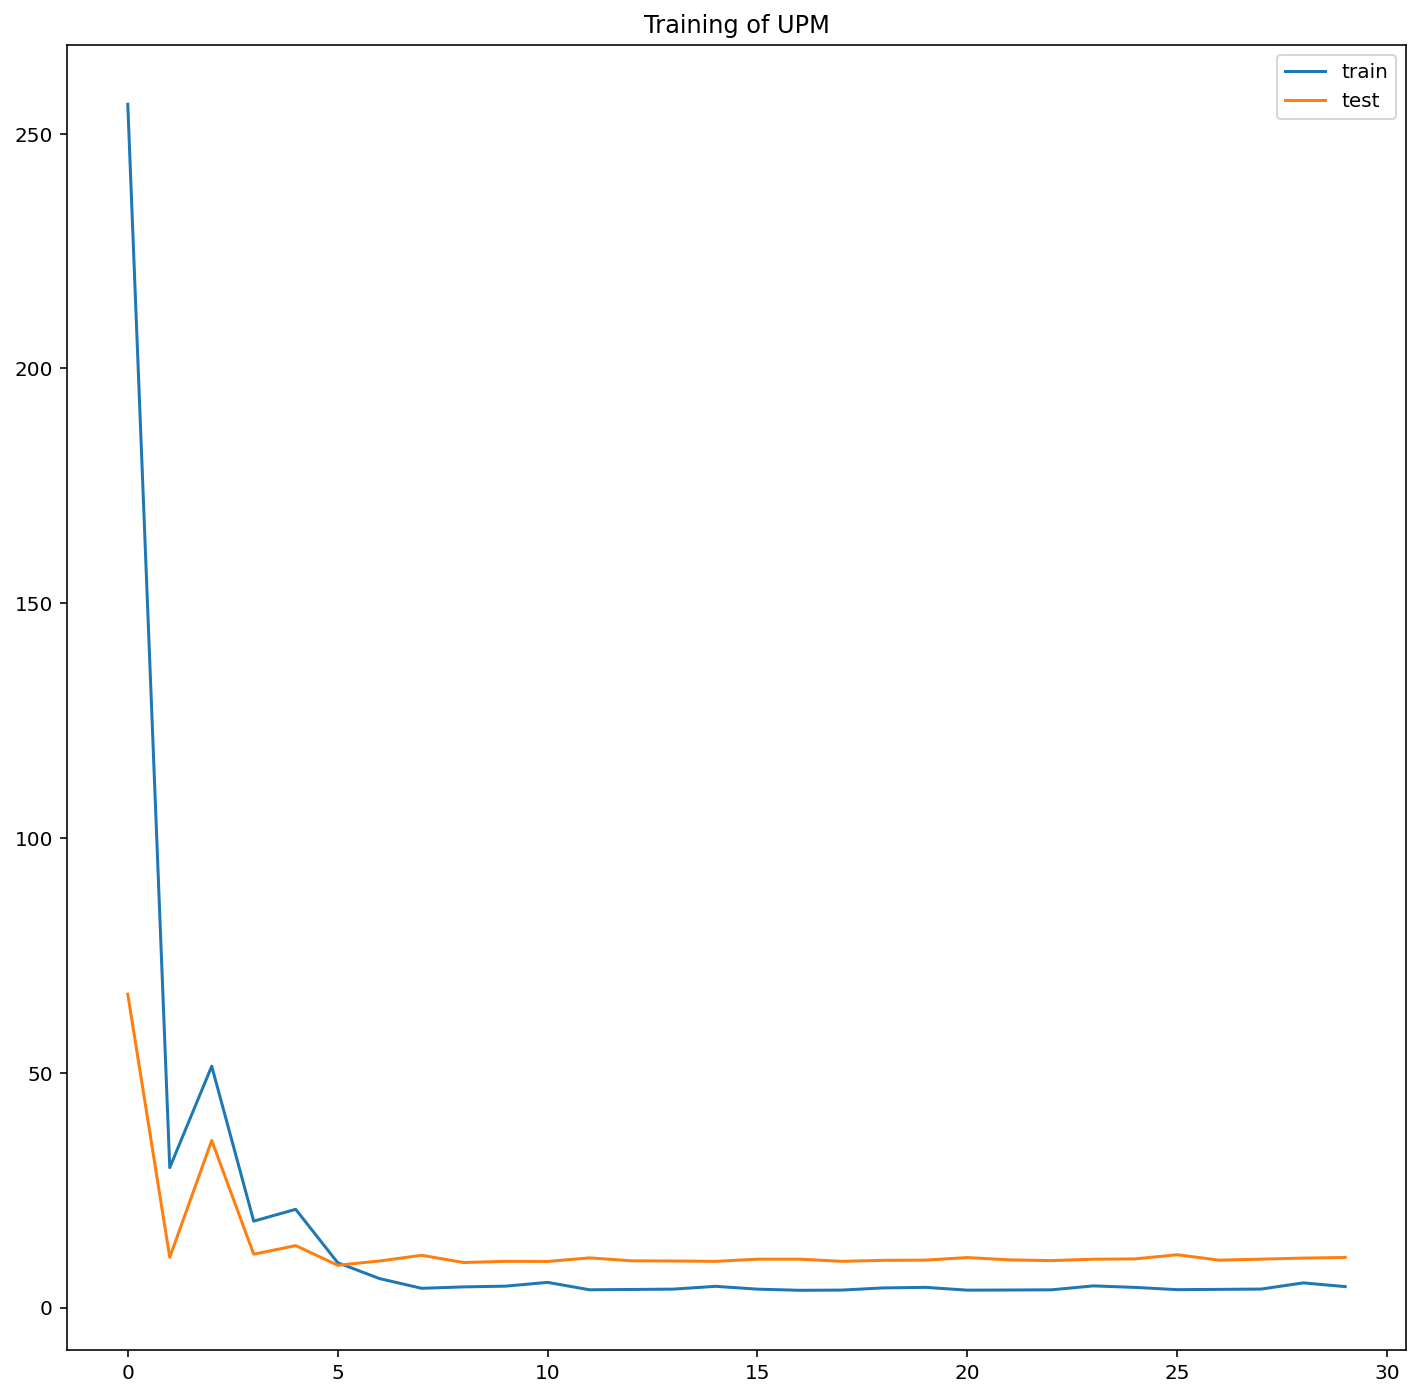

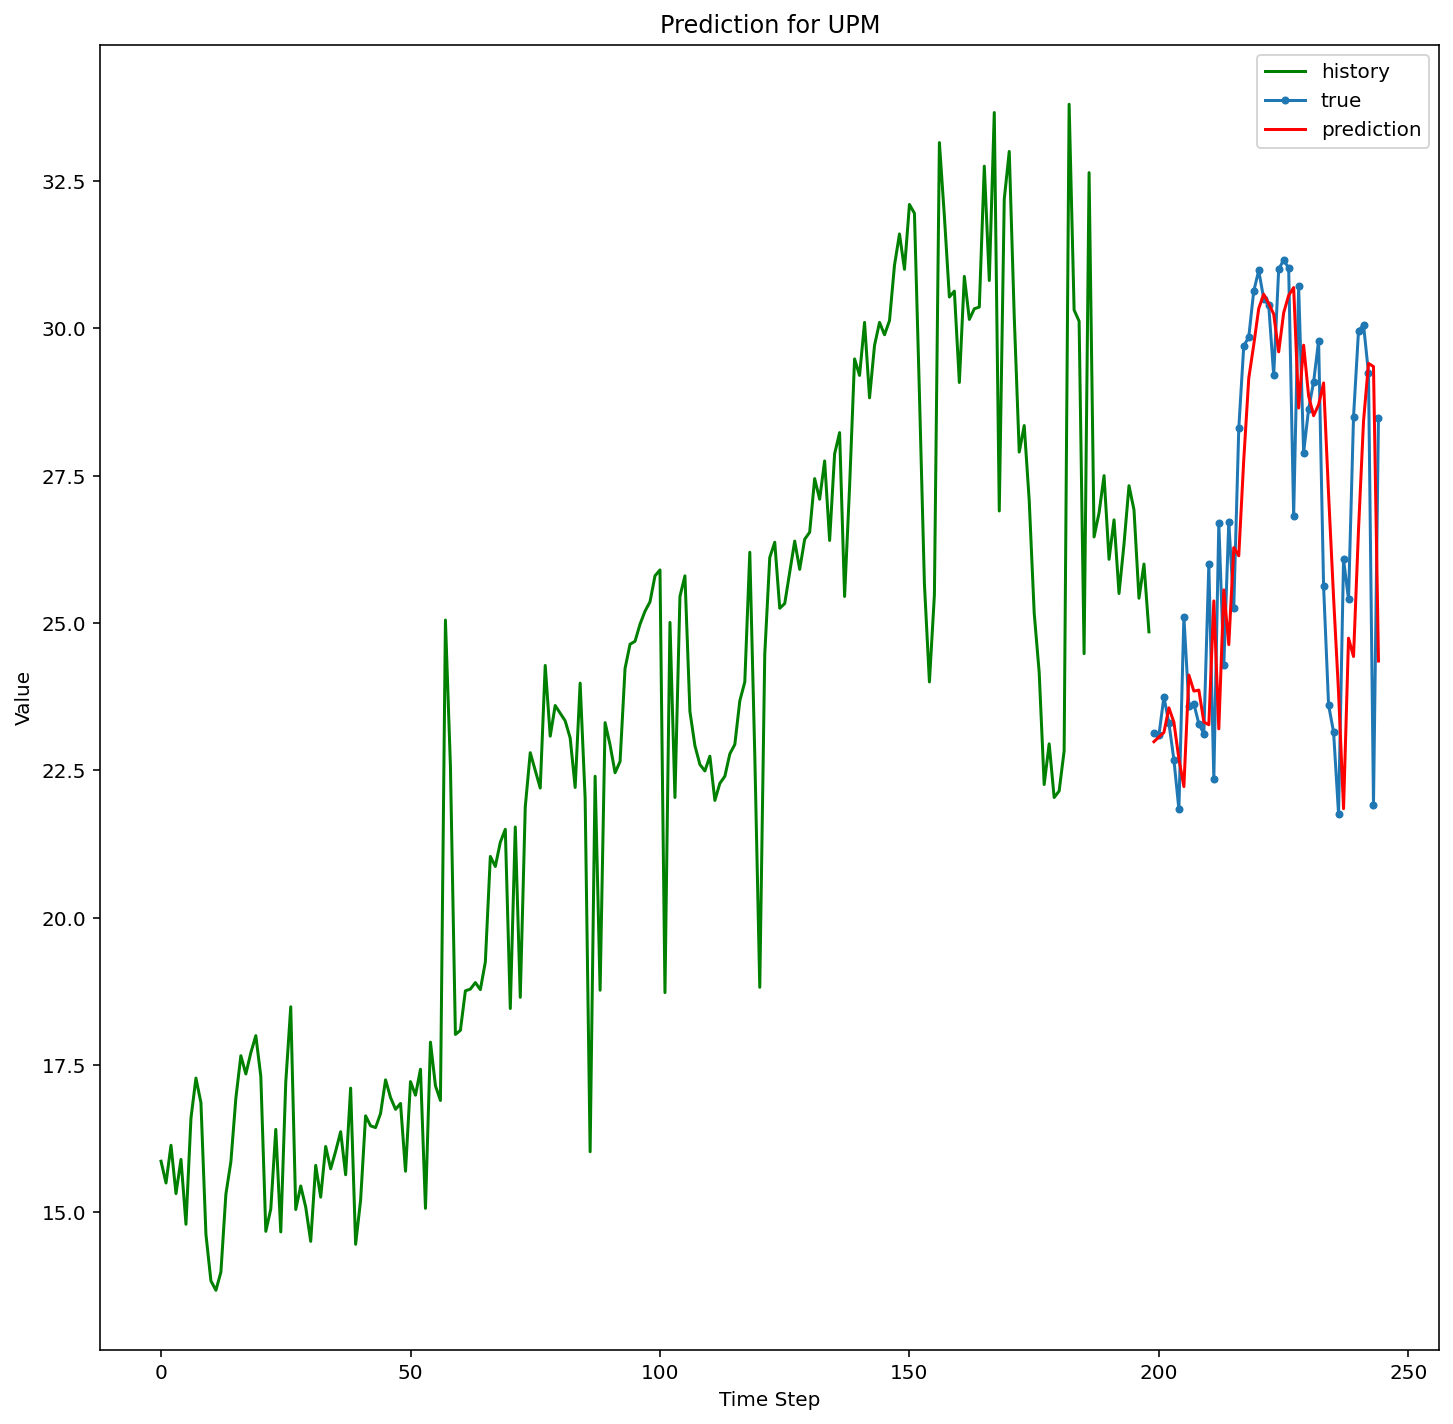

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 9ms/sample - loss: 52.5334 - val_loss: 8.3061
Epoch 2/30
179/179 [==============================] - 0s 478us/sample - loss: 41.8350 - val_loss: 64.7830
Epoch 3/30
179/179 [==============================] - 0s 463us/sample - loss: 9.8262 - val_loss: 31.0849
Epoch 4/30
179/179 [==============================] - 0s 461us/sample - loss: 6.4180 - val_loss: 17.9255
Epoch 5/30
179/179 [==============================] - 0s 487us/sample - loss: 6.5964 - val_loss: 20.2141
Epoch 6/30
179/179 [==============================] - 0s 507us/sample - loss: 2.8561 - val_loss: 10.6432
Epoch 7/30
179/179 [==============================] - 0s 493us/sample - loss: 2.3935 - val_loss: 7.8161
Epoch 8/30
179/179 [==============================] - 0s 489us/sample - loss: 1.8959 - val_loss: 6.8102
Epoch 9/30
179/179 [==============================] - 0s 495us/sample - loss: 1.8158 - val_loss: 6.

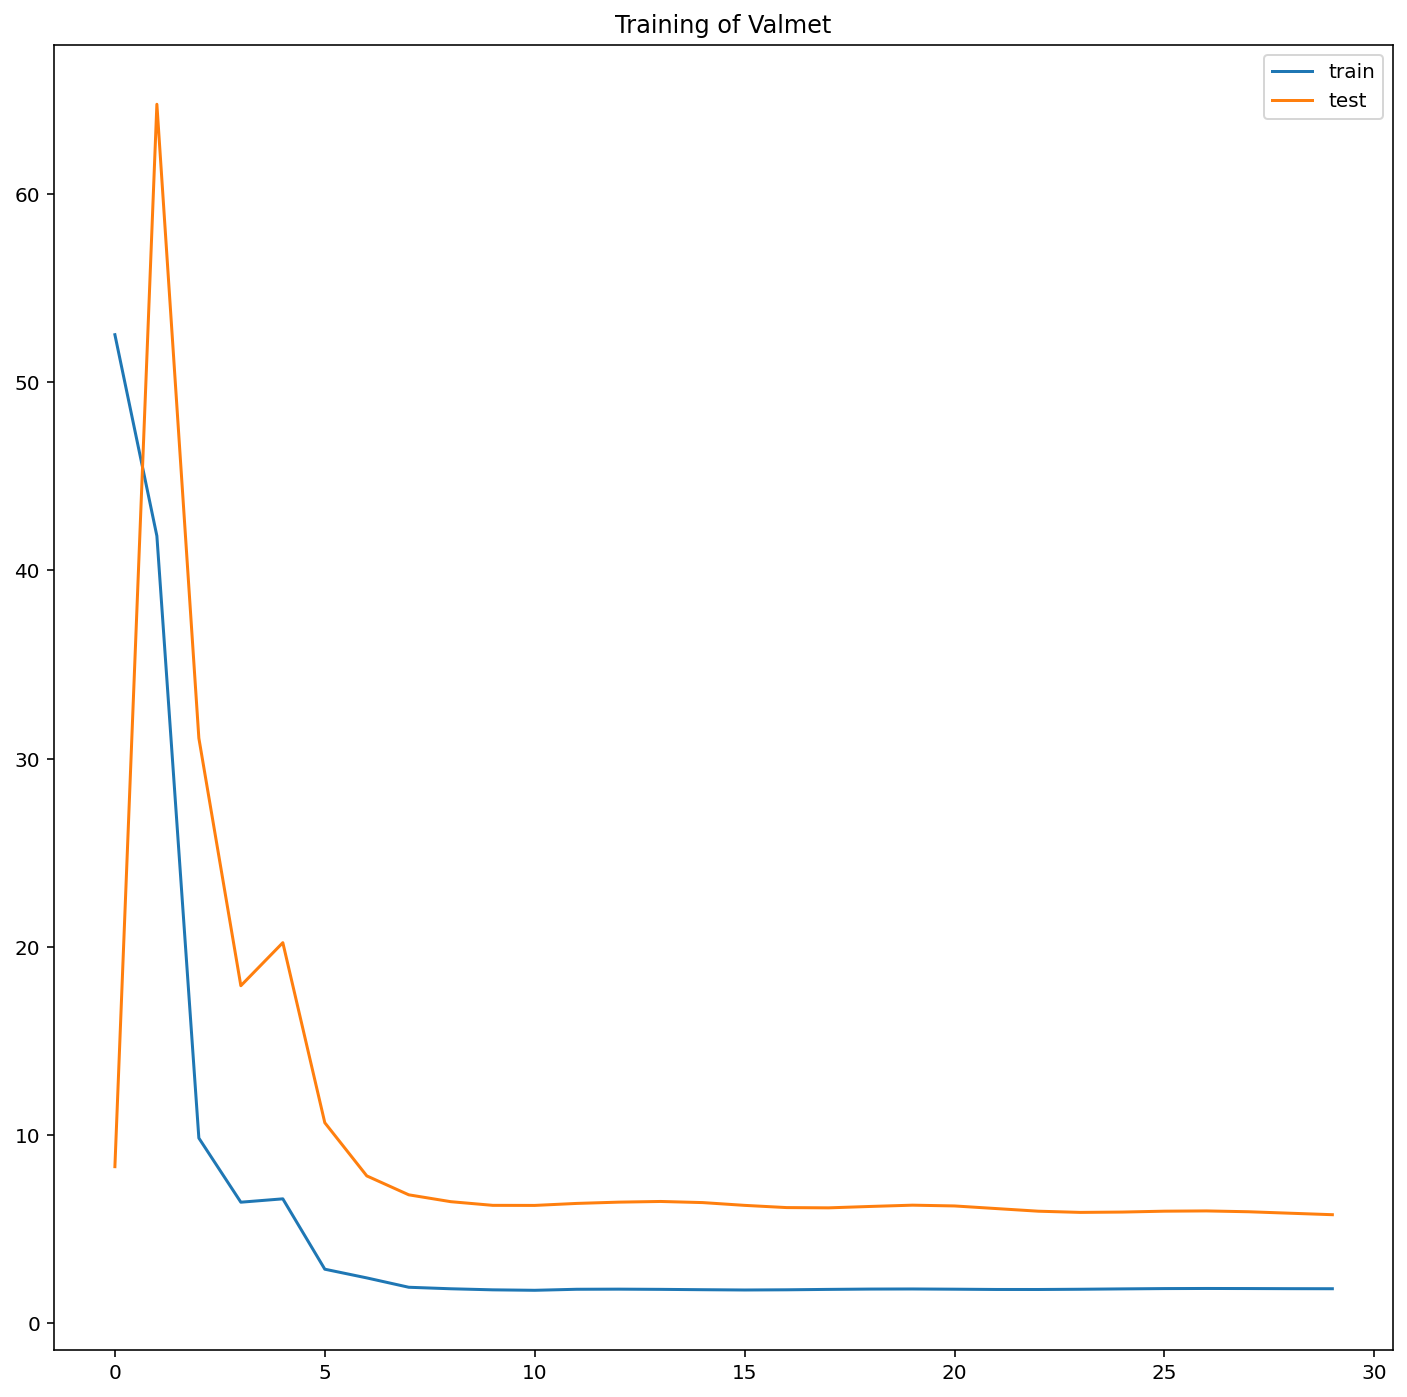

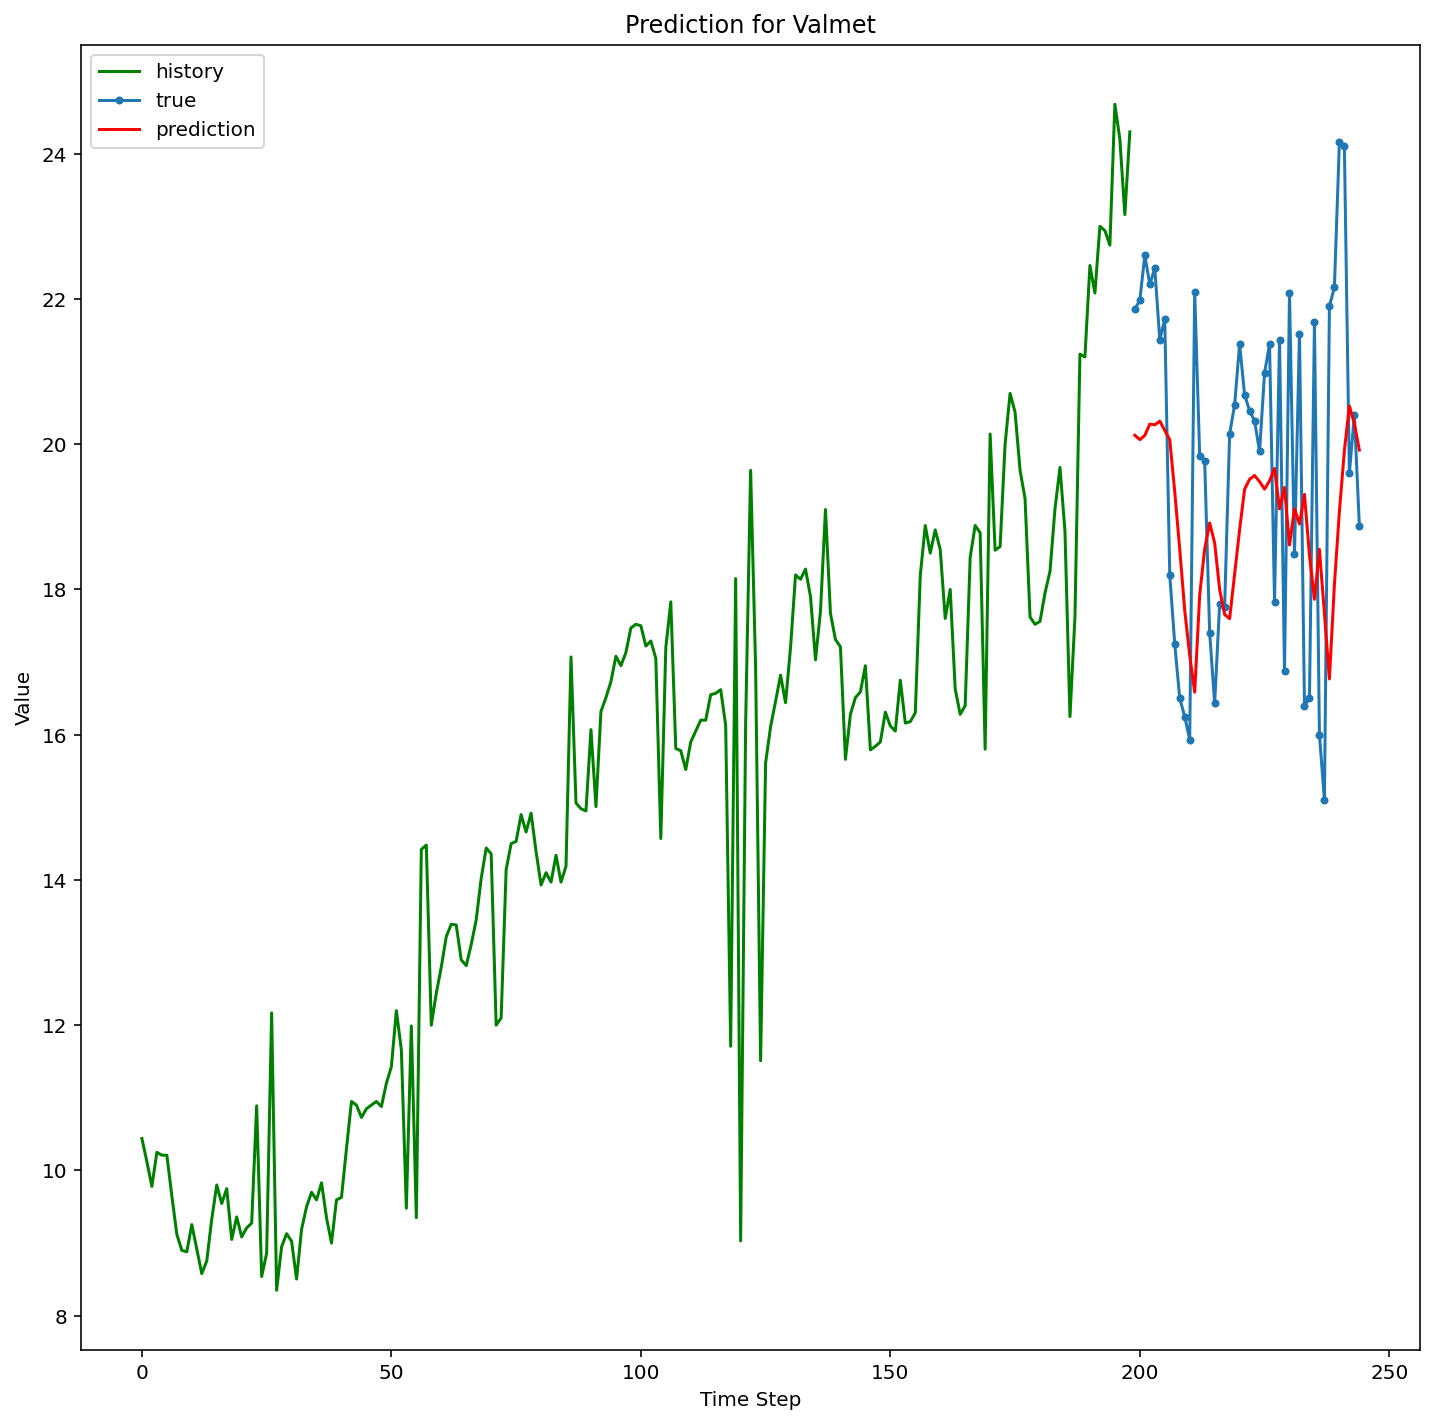

(199, 5, 3) (199,)
Train on 179 samples, validate on 20 samples
Epoch 1/30
179/179 [==============================] - 2s 10ms/sample - loss: 68.8557 - val_loss: 55.3131
Epoch 2/30
179/179 [==============================] - 0s 510us/sample - loss: 29.6684 - val_loss: 4.9478
Epoch 3/30
179/179 [==============================] - 0s 530us/sample - loss: 9.1434 - val_loss: 7.5018
Epoch 4/30
179/179 [==============================] - 0s 576us/sample - loss: 6.9347 - val_loss: 8.0527
Epoch 5/30
179/179 [==============================] - 0s 500us/sample - loss: 7.8402 - val_loss: 5.9172
Epoch 6/30
179/179 [==============================] - 0s 620us/sample - loss: 5.0354 - val_loss: 7.3576
Epoch 7/30
179/179 [==============================] - 0s 538us/sample - loss: 5.0527 - val_loss: 6.4975
Epoch 8/30
179/179 [==============================] - 0s 610us/sample - loss: 3.3264 - val_loss: 6.7269
Epoch 9/30
179/179 [==============================] - 0s 636us/sample - loss: 2.6604 - val_loss: 6.732

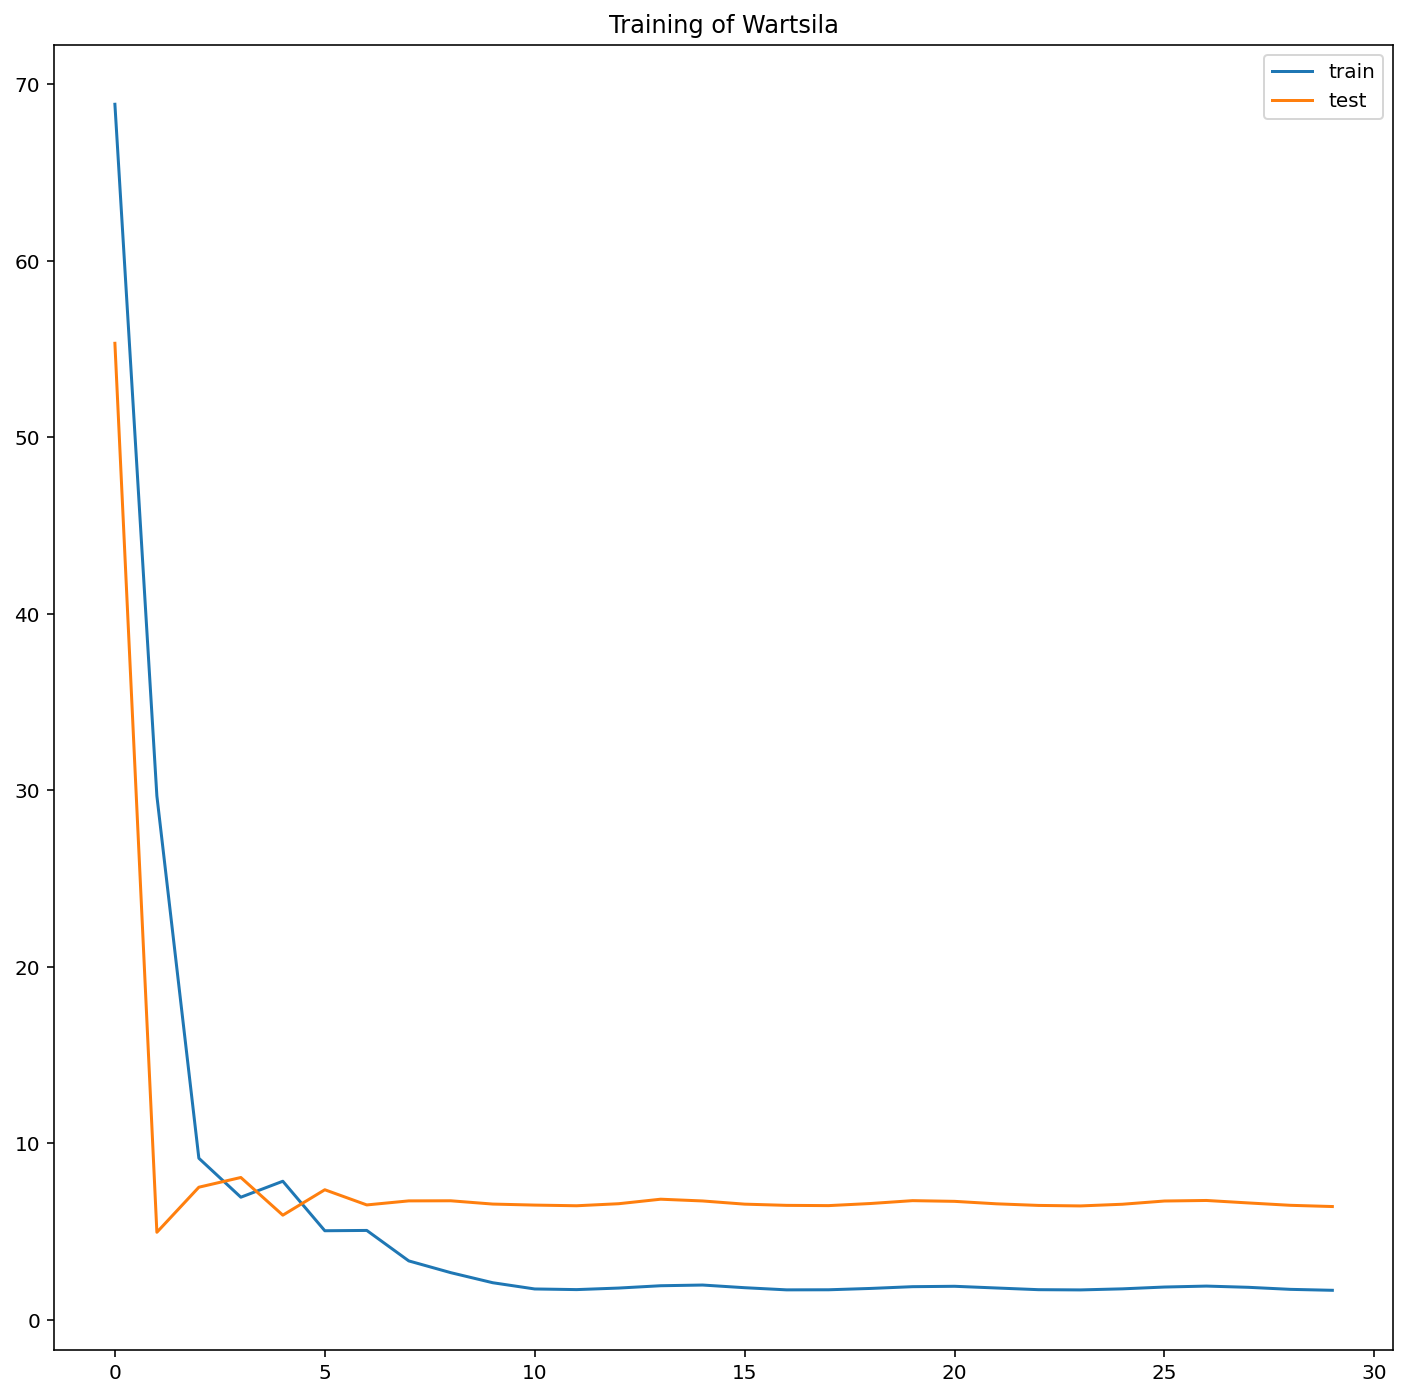

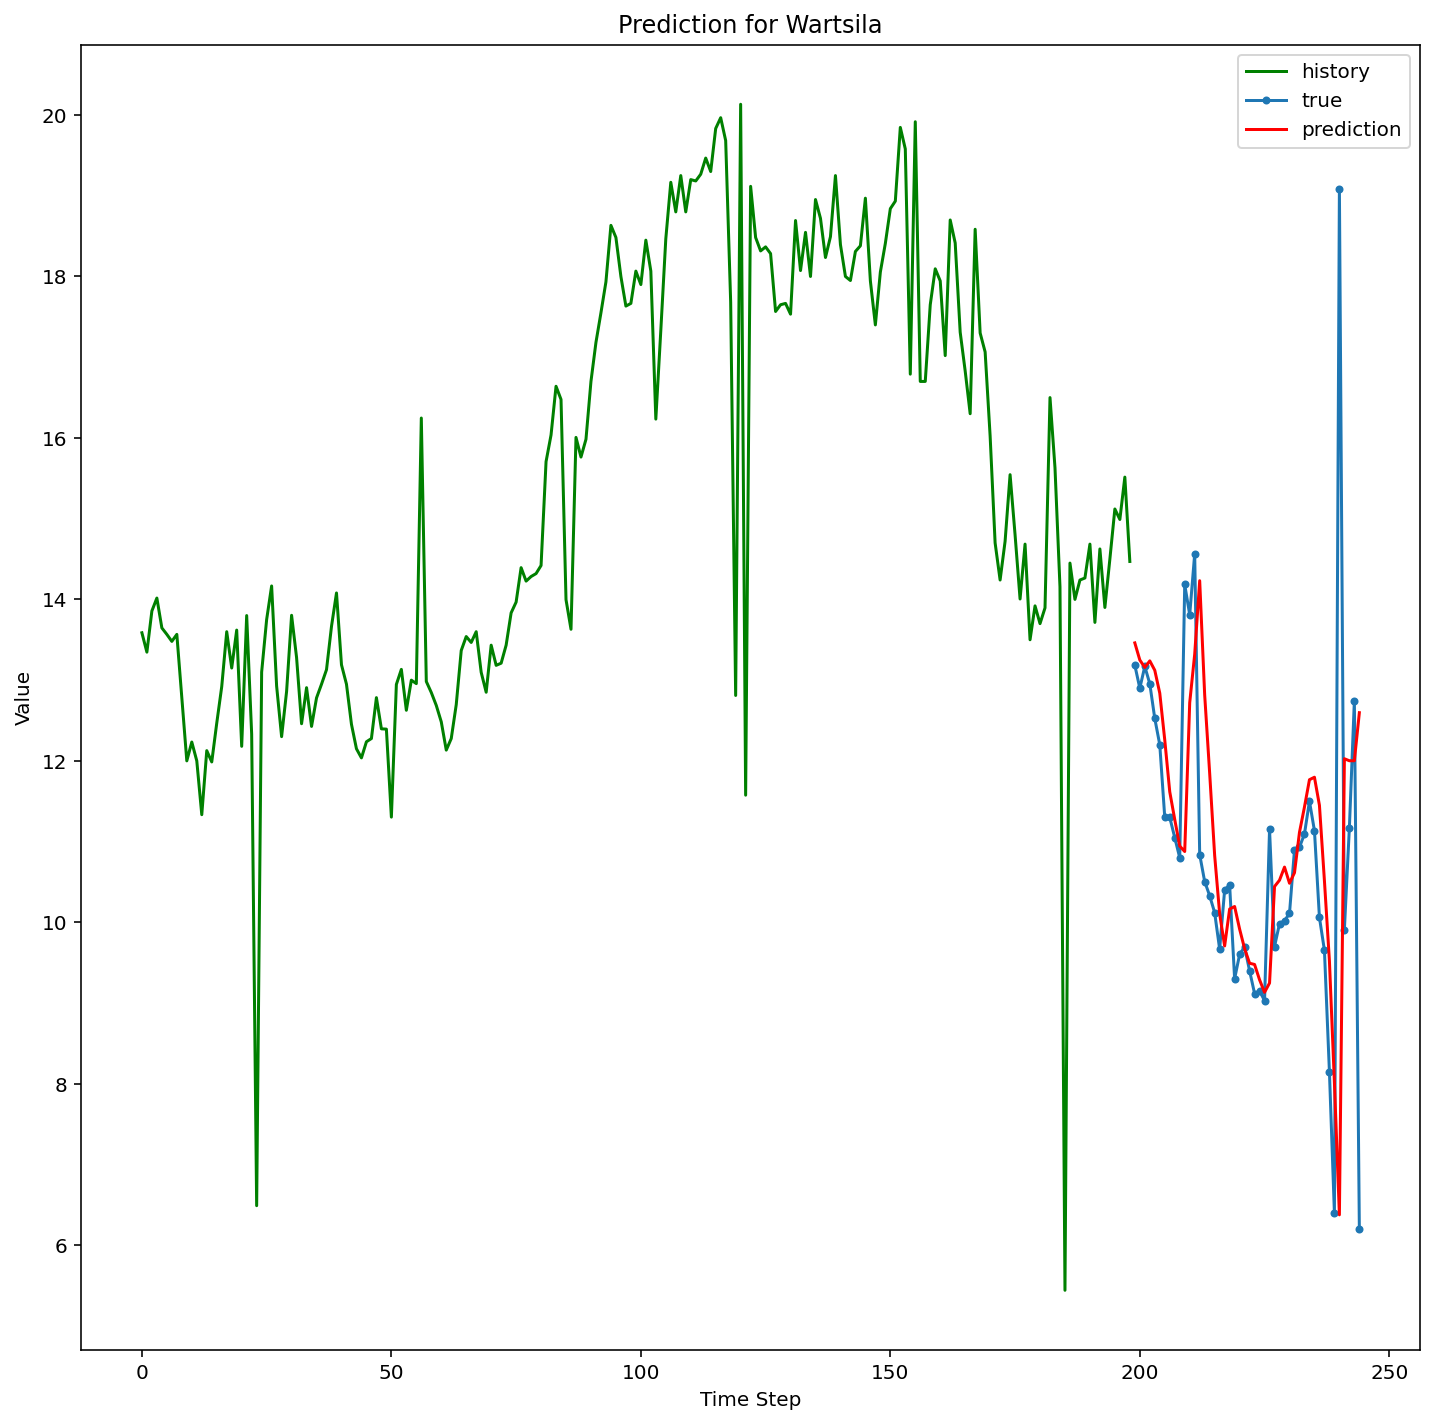

In [10]:
for company in data.Company.unique(): 
  cur = data.loc[data.Company==company]

  cur = pd.DataFrame(np.transpose(np.asarray([cur.Open, cur.VolumeChange4, cur.PriceChange4])), index=cur['Date'], columns=['open', 'price', 'vol'])

  train_size = int(len(cur) * 0.8)
  test_size = len(cur) - train_size
  train, test = cur.iloc[0:train_size], cur.iloc[train_size:len(cur)]

  time_steps = 5

  # reshape to [samples, time_steps, n_features]

  X_train, y_train = create_dataset(train, train.open, time_steps)
  X_test, y_test = create_dataset(test, test.open, time_steps)

  print(X_train.shape, y_train.shape)

  model = keras.Sequential()
  model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(keras.layers.Dense(64))
  model.add(keras.layers.Dense(32))
  model.add(keras.layers.Dense(16))
  model.add(keras.layers.Dense(8))
  model.add(keras.layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

  history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
  )

  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  plt.title("Training of " + companies[str(company)])
  plt.show()

  y_pred = model.predict(X_test)

  plt.figure()
  plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
  plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
  plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
  plt.ylabel('Value')
  plt.xlabel('Time Step')
  plt.legend()
  plt.title("Prediction for " + companies[str(company)])
  plt.show()

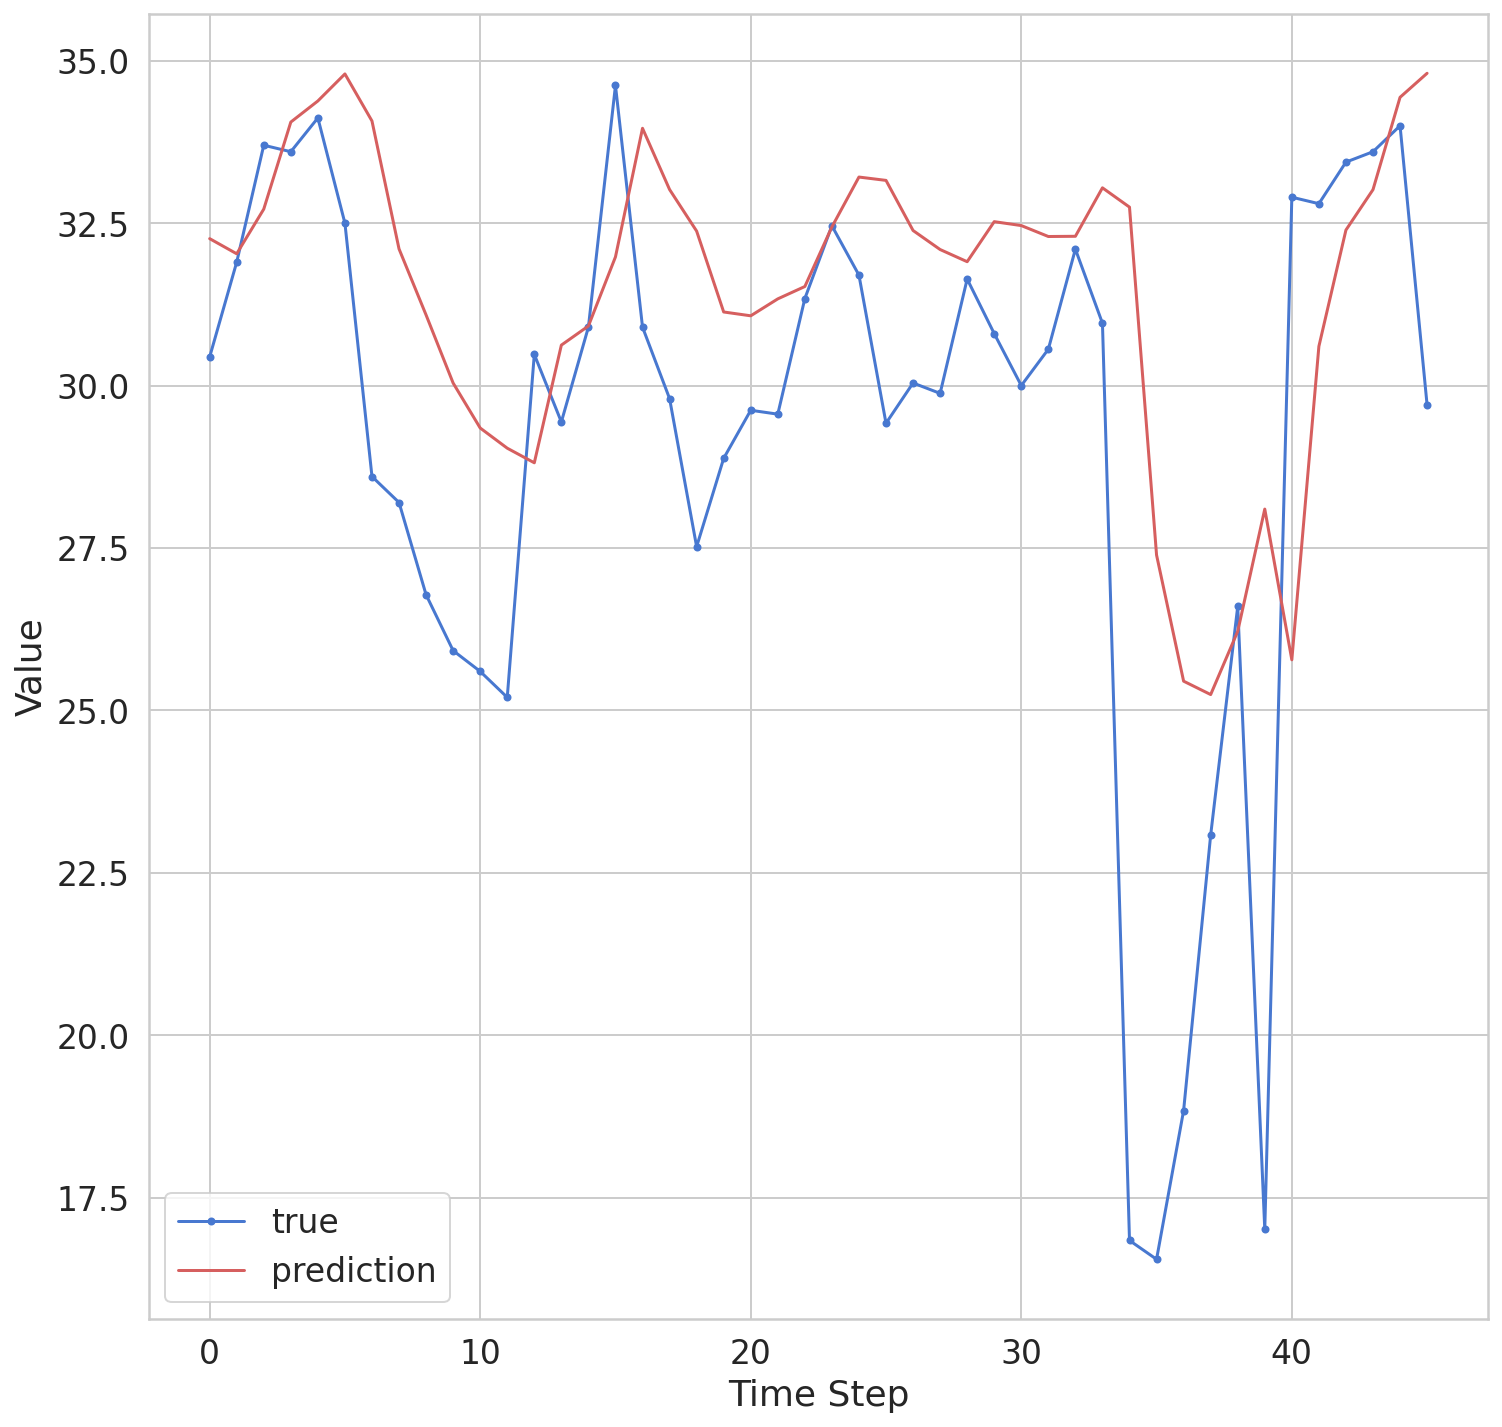

In [322]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();